In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 30 10:11:44 2022

@author: roy.369
"""


import numpy as np
import pickle

import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
mpl.rcParams['axes.linewidth'] = 3
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')
from matplotlib.pyplot import cm
from numpy.polynomial.polynomial import polyfit
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter
from scipy.interpolate import CubicSpline

In [4]:
def arr_loc(val,X):
   ind = 0
   for i in range(len(X)):
      if(round(X[i],2) == round(val,2)):
         ind = i
         break
   return ind


def power_fit(x,a1,m):
    return a1*x**m
  
def linear_fit(x,a,b):
    return a+b*x
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx],idx

In [5]:
def r_point_upper_half_grid(N):

    r_lab = []
    r_rel_x = []
    r_rel_y = []
    x_span = int((int(N))/2)+1
    r_pair_1 = 0
    for i in range(x_span):
        for j in range(x_span):
            if(i<=j):
              r_lab.append(r_pair_1)  
              r_rel_x.append(i)
              r_rel_y.append(j)
              r_pair_1 = r_pair_1+1

    R_relative_1 = np.stack((r_rel_x,r_rel_y),axis = 1)
    return R_relative_1,r_pair_1

In [6]:
def r_point_full_grid(N):

    r_lab = []
    r_rel_x = []
    r_rel_y = []
    x_span = int((int(N))/2)+1
    r_pair_2 = 0
    for i in range(x_span):
        for j in range(x_span):
              r_lab.append(r_pair_2)
              r_rel_x.append(i)
              r_rel_y.append(j)
              r_pair_2 = r_pair_2+1

    R_relative_2 = np.stack((r_rel_x,r_rel_y),axis = 1)
    return R_relative_2,r_pair_2

In [7]:
def k_point_grid_upper_half_bz(N):

    K_lab = []
    Kx = []
    Ky = []
    x_span = int((int(N))/2)+1
    k_pair = 0
    for i in range(x_span):
        for j in range(x_span):
            if(i<=j):
              K_lab.append(k_pair)  
              Kx.append(i)
              Ky.append(j)
              k_pair = k_pair+1
    BZ = np.stack((K_lab,Kx,Ky),axis = 1)
    
    return BZ,k_pair


def k_point_grid_full_bz(N):

    K_lab = []
    Kx = []
    Ky = []
    x_span = int((int(N))/2)+1
    k_pair = 0
    for i in range(x_span):
        for j in range(x_span):
              K_lab.append(k_pair)
              Kx.append(i)
              Ky.append(j)
              k_pair = k_pair+1
    BZ = np.stack((K_lab,Kx,Ky),axis = 1)
    
    return BZ,k_pair


In [8]:
def adj_mat_calc(N):

    r_grid, r_rel_grid_size = r_point_upper_half_grid(int(N))
    r_rel_x = r_grid[:,0]
    r_rel_y = r_grid[:,1]

    r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
    r_2_unq = np.sort(np.unique(r_2))

    rx_cord = []
    ry_cord = []
    r2 = []
    rx = np.arange(int(int(N)/2),-1*int(int(N)/2),-1)
    ry = np.arange(int(int(N)/2),-1*int(int(N)/2),-1)
    for i in range(len(rx)):
        for j in range(len(ry)):
            rx_cord.append(rx[i])
            ry_cord.append(ry[j])
            r2.append(rx[i]*rx[i]+ry[j]*ry[j])

    #plt.figure()
    #plt.scatter(rx_cord,ry_cord,c=r2)

    adj_mat = np.zeros(len(r_2_unq))
    for i in range(len(r_2_unq)):
        count = 0
        for i2 in range(len(r2)):
            if round(r2[i2],2) == round(r_2_unq[i],2):
               count = count+1
        adj_mat[i] = count
    
    return np.stack((r_2_unq,np.asarray(adj_mat)),axis = 1)  

In [9]:
def plot_func_multiple_beta_hf(N,u_val,mu,dtau,trot,plot_title,plot_x_label,plot_y_label,x_val,y_val,y_val_err,plot_name):

   color_1 = iter(["red","orange","goldenrod","blue","purple"]) #(cm.gnuplot(np.linspace(0, 1, len(trot)+1)))
   plt.figure(figsize = (25,20))
   #plt.title(plot_title,fontsize = 60)
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80)
   #plt.xscale('log')
   #plt.yscale('log') 
   #plt.ylabel(plot_y_label,fontsize = 60)
   #plt.xlabel(plot_x_label,fontsize = 60)
   for jj in range(len(trot)):
       c_1 = next(color_1)
       beta = (float(dtau))*(float(trot[jj]))
       T = round(1/beta,2)
       plt.errorbar(x_val,y_val[:,jj],yerr = y_val_err[:,jj],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
   plt.grid(True,which='both')

   plt.axvspan(3.1, 4.3, facecolor='r', alpha=0.2)
   plt.legend(loc = 'best',nrow = 2,fontsize = 60)
   plt.tight_layout()
   plt.savefig(plot_name)
   plt.close()

In [10]:
def plot_func_multiple_beta_doping(N,u_val,mu,dtau,trot,plot_title,plot_x_label,plot_y_label,x_val,y_val,y_val_err,plot_name):

   color_1 = iter(['red','peru','darkorange','goldenrod','olive','darkgreen','dodgerblue','blue']) 
   plt.figure(figsize = (28,20))
   plt.xticks([1.0,1.25,1.5,1.75,2.0],fontsize = 80)
   plt.yticks(fontsize = 80)
   for k in range(len(trot)):
       c_1 = next(color_1)
       beta = (float(dtau))*(float(trot[k]))
       T = round(1/beta,2)
       plt.errorbar(x_val[:,k],y_val[:,k],yerr = y_val_err[:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
   plt.grid(True,which='both')
   plt.xlim(1,2) 
   plt.legend(loc = 'best',ncol = 3,fontsize = 60)
   plt.tight_layout()
   plt.savefig(plot_name)
   plt.close()

In [11]:
def plot_func_multiple_U_doping(N,u_val,mu,dtau,trot,plot_title,plot_x_label,plot_y_label,x_val,y_val,y_val_err,plot_name):

   color_1 = iter(['blue','darkgreen','olive','darkgoldenrod','orange','red'])
   plt.figure(figsize = (28,20))
   #plt.title(plot_title,fontsize = 60)
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80)
   #plt.xscale('log')
   #plt.yscale('log') 
   #plt.ylabel(plot_y_label,fontsize = 60)
   #plt.xlabel(plot_x_label,fontsize = 60)
   #plt.errorbar(x_val_met,y_val_met,yerr = y_val_err_met,c='blue',marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"U = 1.0")
   for i in range(len(u_val)):
       c_1 = next(color_1)
       plt.errorbar(x_val[i,:],y_val[i,:],yerr = y_val_err[i,:],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"U = %s"%str(u_val[i]))
   #plt.errorbar(x_val_ins,y_val_ins,yerr = y_val_err_ins,c='red',marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"U = 8.0")
      
   plt.grid(True,which='both')
   plt.legend(loc = 'best',fontsize = 60)
   plt.xlim(0,1)
   plt.tight_layout()
   plt.savefig(plot_name)
   plt.close()

In [12]:
def equal_time_density_density_correlation_function_half_filling(Text_dir_main_corr_hf,Text_dir_main_eqm,Graph_dir_hf,N,u,mu,dtau,L):

   r_grid, r_rel_grid_size = r_point_upper_half_grid(N)
   r_rel_x = r_grid[:,0]
   r_rel_y = r_grid[:,1]

   r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
   r_2_unq = np.sort(np.unique(r_2))

   Den_Den_corr_hf = np.zeros((len(u),len(L),len(r_2_unq)))
   Den_Den_corr_hf_std = np.zeros((len(u),len(L),len(r_2_unq)))
   
   Den_Den_conn_corr_hf = np.zeros((len(u),len(L),len(r_2_unq)))
   Den_Den_conn_corr_hf_std = np.zeros((len(u),len(L),len(r_2_unq)))

    
   Nden = np.zeros((len(u),len(L)))
   Nden_std = np.zeros((len(u),len(L)))
    
   U_val = np.zeros(len(u))
   for i in range(len(u)):
       U_val[i] = float(u[i])
       
       
   for i in range(len(u)):
       for k in range(len(L)):
                       
           Text_dir_eqm = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Thermodynamic_measurements"%(Text_dir_main_eqm,N,u[i],dtau,mu,dtau,L[k])

           filename_eqm_avg = '%s/Thermodynamic_measurements_normal_averaged_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],mu,dtau,L[k])
           with open(filename_eqm_avg, 'rb') as infile:
                sys_measure_avg = pickle.load(infile)

           filename_eqm_std = '%s/Thermodynamic_measurements_normal_standard_deviation_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],mu,dtau,L[k])
           with open(filename_eqm_std, 'rb') as infile:
                sys_measure_std = pickle.load(infile)

           Nden[i][k] = sys_measure_avg['Density averaged']
           Nden_std[i][k] = sys_measure_std['Density standard deviation']
           
           Text_dir_den_den_corr_hf = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_density_correlation_functions'%(Text_dir_main_corr_hf,N,u[i],dtau,mu,dtau,L[k])
           Text_dir_den_den_conn_corr_hf = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_density_connected_correlation_functions'%(Text_dir_main_corr_hf,N,u[i],dtau,mu,dtau,L[k])

           filename_den_den_corr = '%s/Equal_time_Density_Density_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_den_corr_hf,N,u[i],mu,dtau,L[k])
           Den_Den_corr_hf[i,k,:],Den_Den_corr_hf_std[i,k,:] = np.loadtxt(filename_den_den_corr,unpack = 'True', usecols = [1,2])

           filename_den_den_conn_corr = '%s/Equal_time_Density_Density_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_den_conn_corr_hf,N,u[i],mu,dtau,L[k])
           Den_Den_conn_corr_hf[i,k,:],Den_Den_conn_corr_hf_std[i,k,:] = np.loadtxt(filename_den_den_conn_corr,unpack = 'True', usecols = [1,2])


 
   Den_Den_corr_hf_n0 = np.zeros((len(u),len(L)))
   Den_Den_corr_hf_n1 = np.zeros((len(u),len(L)))
   Den_Den_corr_hf_n2 = np.zeros((len(u),len(L)))
   Den_Den_corr_hf_n3 = np.zeros((len(u),len(L)))

   Den_Den_corr_hf_n0_std = np.zeros((len(u),len(L)))
   Den_Den_corr_hf_n1_std = np.zeros((len(u),len(L)))
   Den_Den_corr_hf_n2_std = np.zeros((len(u),len(L)))
   Den_Den_corr_hf_n3_std = np.zeros((len(u),len(L)))

   Den_Den_conn_corr_hf_n0 = np.zeros((len(u),len(L)))
   Den_Den_conn_corr_hf_n1 = np.zeros((len(u),len(L)))
   Den_Den_conn_corr_hf_n2 = np.zeros((len(u),len(L)))
   Den_Den_conn_corr_hf_n3 = np.zeros((len(u),len(L)))
    
   Den_Den_conn_corr_hf_n0_std = np.zeros((len(u),len(L)))
   Den_Den_conn_corr_hf_n1_std = np.zeros((len(u),len(L)))
   Den_Den_conn_corr_hf_n2_std = np.zeros((len(u),len(L)))
   Den_Den_conn_corr_hf_n3_std = np.zeros((len(u),len(L)))


   for i in range(len(u)):
       for k in range(len(L)):

           Den_Den_corr_hf_n0[i][k] = Den_Den_corr_hf[i][k][0]
           Den_Den_corr_hf_n1[i][k] = Den_Den_corr_hf[i][k][1]
           Den_Den_corr_hf_n2[i][k] = Den_Den_corr_hf[i][k][2]
           Den_Den_corr_hf_n3[i][k] = Den_Den_corr_hf[i][k][3]

           Den_Den_corr_hf_n0_std[i][k] = Den_Den_corr_hf_std[i][k][0]
           Den_Den_corr_hf_n1_std[i][k] = Den_Den_corr_hf_std[i][k][1]
           Den_Den_corr_hf_n2_std[i][k] = Den_Den_corr_hf_std[i][k][2]
           Den_Den_corr_hf_n3_std[i][k] = Den_Den_corr_hf_std[i][k][3]

           Den_Den_conn_corr_hf_n0[i][k] = Den_Den_conn_corr_hf[i][k][0]
           Den_Den_conn_corr_hf_n1[i][k] = Den_Den_conn_corr_hf[i][k][1]
           Den_Den_conn_corr_hf_n2[i][k] = Den_Den_conn_corr_hf[i][k][2]
           Den_Den_conn_corr_hf_n3[i][k] = Den_Den_conn_corr_hf[i][k][3]
           
           Den_Den_conn_corr_hf_n0_std[i][k] = Den_Den_conn_corr_hf_std[i][k][0]
           Den_Den_conn_corr_hf_n1_std[i][k] = Den_Den_conn_corr_hf_std[i][k][1]
           Den_Den_conn_corr_hf_n2_std[i][k] = Den_Den_conn_corr_hf_std[i][k][2]
           Den_Den_conn_corr_hf_n3_std[i][k] = Den_Den_conn_corr_hf_std[i][k][3]
           
           
   Pl_title_n0 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=0.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n1 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n2 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.414, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n3 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=2.0, $N=%sx%s, n = 1$"%(N,N)

   Pl_y_lab = r"$\langle h_i d_j \rangle_{C}$"
   Pl_x_lab = r"$U$"

    
   Pl_name_n1 = "%s/Density_density_correlation_1st_nearest_neighbor_averaged_normal_averaged_half_filling_N_%s_dtau_%s.png"%(Graph_dir_hf,N,dtau)
   Pl_name_conn_n1 = "%s/Density_density_correlation_connected_1st_nearest_neighbor_averaged_normal_averaged_half_filling_N_%s_dtau_%s.png"%(Graph_dir_hf,N,dtau)

  
   plot_func_multiple_beta_hf(N,u,mu,dtau,L,Pl_title_n1,Pl_x_lab,Pl_y_lab,U_val,Den_Den_corr_hf_n1,Den_Den_corr_hf_n1_std,Pl_name_n1)
   plot_func_multiple_beta_hf(N,u,mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,U_val,Den_Den_conn_corr_hf_n1,Den_Den_conn_corr_hf_n1_std,Pl_name_conn_n1)
    



In [13]:
def equal_time_density_density_correlation_function_doping(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,u,Mu,dtau,L):


   Adj_list = adj_mat_calc(N)
    
   r_grid, r_rel_grid_size = r_point_upper_half_grid(N)
   r_rel_x = r_grid[:,0]
   r_rel_y = r_grid[:,1]

   r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
   r_2_unq = np.sort(np.unique(r_2))

   Den_Den_corr = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   Den_Den_corr_std = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   
   Den_Den_conn_corr = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   Den_Den_conn_corr_std = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
    
   Nrm_Den_Den_conn_corr = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
   Nrm_Den_Den_conn_corr_std = np.zeros((len(u),len(Mu),len(L),len(r_2_unq)))
    
   Nden = np.zeros((len(u),len(Mu),len(L)))
   Nden_std = np.zeros((len(u),len(Mu),len(L)))


    
   U_val = np.zeros(len(u))
   for i in range(len(u)):
       U_val[i] = float(u[i])
       

   Mu_val = np.zeros(len(Mu))
    
   for j in range(len(Mu)):
       Mu_val[j] = float(Mu[j])

   Beta_val = np.zeros(len(L))
   for k in range(len(L)):
       Beta_val[k] = float(dtau)*float(L[k])
       
   for i in range(len(u)):
       for j in range(len(Mu)):
           for k in range(len(L)):
                       
               Text_dir_eqm = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Thermodynamic_measurements"%(Text_dir_main_eqm,N,u[i],dtau,Mu[j],dtau,L[k])

               filename_eqm_avg = '%s/Thermodynamic_measurements_normal_averaged_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],Mu[j],dtau,L[k])
               with open(filename_eqm_avg, 'rb') as infile:
                    sys_measure_avg = pickle.load(infile)

               filename_eqm_std = '%s/Thermodynamic_measurements_normal_standard_deviation_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],Mu[j],dtau,L[k])
               with open(filename_eqm_std, 'rb') as infile:
                    sys_measure_std = pickle.load(infile)

               Nden[i][j][k] = sys_measure_avg['Density averaged']
               Nden_std[i][j][k] = sys_measure_std['Density standard deviation']
           
               Text_dir_den_den_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_density_correlation_functions'%(Text_dir_main_corr,N,u[i],dtau,Mu[j],dtau,L[k])
               Text_dir_den_den_conn_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_density_connected_correlation_functions'%(Text_dir_main_corr,N,u[i],dtau,Mu[j],dtau,L[k])

               filename_den_den_corr = '%s/Equal_time_Density_Density_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_den_corr,N,u[i],Mu[j],dtau,L[k])
               Den_Den_corr[i,j,k,:],Den_Den_corr_std[i,j,k,:] = np.loadtxt(filename_den_den_corr,unpack = 'True', usecols = [1,2])

               filename_den_den_conn_corr = '%s/Equal_time_Density_Density_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_den_conn_corr,N,u[i],Mu[j],dtau,L[k])
               Den_Den_conn_corr[i,j,k,:],Den_Den_conn_corr_std[i,j,k,:] = np.loadtxt(filename_den_den_conn_corr,unpack = 'True', usecols = [1,2])
    
 
   Den_Den_corr_n0 = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_corr_n1 = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_corr_n2 = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_corr_n3 = np.zeros((len(u),len(Mu),len(L)))

   Den_Den_corr_n0_std = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_corr_n1_std = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_corr_n2_std = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_corr_n3_std = np.zeros((len(u),len(Mu),len(L)))

   Den_Den_conn_corr_n0 = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_n1 = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_n2 = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_n3 = np.zeros((len(u),len(Mu),len(L)))
    
   Den_Den_conn_corr_n0_std = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_n1_std = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_n2_std = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_n3_std = np.zeros((len(u),len(Mu),len(L)))

   Den_Den_conn_corr_tot = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_nl = np.zeros((len(u),len(Mu),len(L))) 
   Den_Den_conn_corr_tot_std = np.zeros((len(u),len(Mu),len(L)))
   Den_Den_conn_corr_nl_std = np.zeros((len(u),len(Mu),len(L))) 

    
   for i in range(len(u)):
       for j in range(len(Mu)):
           for k in range(len(L)):

               Den_Den_corr_n0[i][j][k] = Den_Den_corr[i][j][k][0]
               Den_Den_corr_n1[i][j][k] = Den_Den_corr[i][j][k][1]
               Den_Den_corr_n2[i][j][k] = Den_Den_corr[i][j][k][2]
               Den_Den_corr_n3[i][j][k] = Den_Den_corr[i][j][k][3]

               Den_Den_corr_n0_std[i][j][k] = Den_Den_corr_std[i][j][k][0]
               Den_Den_corr_n1_std[i][j][k] = Den_Den_corr_std[i][j][k][1]
               Den_Den_corr_n2_std[i][j][k] = Den_Den_corr_std[i][j][k][2]
               Den_Den_corr_n3_std[i][j][k] = Den_Den_corr_std[i][j][k][3]

               Den_Den_conn_corr_n0[i][j][k] = Den_Den_conn_corr[i][j][k][0]
               Den_Den_conn_corr_n1[i][j][k] = Den_Den_conn_corr[i][j][k][1]
               Den_Den_conn_corr_n2[i][j][k] = Den_Den_conn_corr[i][j][k][2]
               Den_Den_conn_corr_n3[i][j][k] = Den_Den_conn_corr[i][j][k][3]
           
               Den_Den_conn_corr_n0_std[i][j][k] = Den_Den_conn_corr_std[i][j][k][0]
               Den_Den_conn_corr_n1_std[i][j][k] = Den_Den_conn_corr_std[i][j][k][1]
               Den_Den_conn_corr_n2_std[i][j][k] = Den_Den_conn_corr_std[i][j][k][2]
               Den_Den_conn_corr_n3_std[i][j][k] = Den_Den_conn_corr_std[i][j][k][3]

               Den_Den_conn_corr_tot[i,j,k] = np.dot(Den_Den_conn_corr[i,j,k,:],Adj_list[:,1])
               Den_Den_conn_corr_tot_std[i,j,k] = np.sqrt(np.dot(np.power(Den_Den_conn_corr_std[i,j,k,:],2),Adj_list[:,1])) 
               Den_Den_conn_corr_nl[i,j,k] = np.dot(Den_Den_conn_corr[i,j,k,1:],Adj_list[1:,1])
               Den_Den_conn_corr_nl_std[i,j,k] = np.sqrt(np.dot(np.power(Den_Den_conn_corr_std[i,j,k,1:],2),Adj_list[1:,1])) 
           
   Pl_title_n0 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=0.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n1 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n2 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.414, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n3 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=2.0, $N=%sx%s, n = 1$"%(N,N)

   Pl_y_lab = r"$\langle h_i d_j \rangle_{C}$"
   Pl_x_lab = r"$U$"


   for i in range(len(u)):
       
       Pl_name_n1 = "%s/Density_density_correlation_1st_nearest_neighbor_averaged_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau)
       Pl_name_conn_n1 = "%s/Density_density_correlation_connected_1st_nearest_neighbor_averaged_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau)
       Pl_name_conn_nl = "%s/Density_density_correlation_connected_non_local_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau)
       Pl_name_conn_tot = "%s/Density_density_correlation_connected_total_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau)
       Pl_name_conn_n0 = "%s/Density_density_correlation_connected_onsite_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau)
                     
  
       plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n1,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Den_Den_corr_n1[i,:,:],Den_Den_corr_n1_std[i,:,:],Pl_name_n1)
       plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Den_Den_conn_corr_n1[i,:,:],Den_Den_conn_corr_n1_std[i,:,:],Pl_name_conn_n1)
       plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Den_Den_conn_corr_nl[i,:,:],Den_Den_conn_corr_nl_std[i,:,:],Pl_name_conn_nl)
       plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Den_Den_conn_corr_tot[i,:,:],Den_Den_conn_corr_tot_std[i,:,:],Pl_name_conn_tot)
       plot_func_multiple_beta_doping(N,u[i],Mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,Nden[i,:,:],Den_Den_conn_corr_n0[i,:,:],Den_Den_conn_corr_n0_std[i,:,:],Pl_name_conn_n0)


   Kappa_tot = np.zeros((len(u),len(Mu),len(L)))
   Kappa_nl = np.zeros((len(u),len(Mu),len(L))) 
   Kappa_n0 = np.zeros((len(u),len(Mu),len(L)))

   dDen_tot_dbeta = np.zeros((len(u),len(Mu),len(L)))
   dDen_nl_dbeta = np.zeros((len(u),len(Mu),len(L))) 
   dDen_n0_dbeta = np.zeros((len(u),len(Mu),len(L)))

    
   for k in range(len(L)):
       Kappa_tot[:,:,k] = Beta_val[k]*Den_Den_conn_corr_tot[:,:,k]
       Kappa_nl[:,:,k] = Beta_val[k]*Den_Den_conn_corr_nl[:,:,k]
       Kappa_n0[:,:,k] = Beta_val[k]*Den_Den_conn_corr_n0[:,:,k]
    
   dkappa_dbeta_onsite = np.gradient(Kappa_n0,Beta_val,axis = 2)
   dkappa_dbeta_nonlocal = np.gradient(Kappa_nl,Beta_val,axis = 2)
   dkappa_dbeta_total = np.gradient(Kappa_tot,Beta_val,axis = 2) 

   dDen_tot_dbeta = np.gradient(Den_Den_conn_corr_tot,Beta_val,axis = 2)
   dDen_nl_dbeta = np.gradient(Den_Den_conn_corr_nl,Beta_val,axis = 2)
   dDen_n0_dbeta = np.gradient(Den_Den_conn_corr_n0,Beta_val,axis = 2)   

   dkappa_dT_onsite = np.zeros(dkappa_dbeta_onsite.shape)
   dkappa_dT_nonlocal = np.zeros(dkappa_dbeta_nonlocal.shape)
   dkappa_dT_total = np.zeros(dkappa_dbeta_total.shape)

   dDen_dT_n0 = np.zeros((len(u),len(Mu),len(L)))
   dDen_dT_nl = np.zeros((len(u),len(Mu),len(L)))
   dDen_dT_tot = np.zeros((len(u),len(Mu),len(L))) 
    
   for k in range(len(L)):
       T = 1/Beta_val[k]
       dkappa_dT_onsite[:,:,k] = (-1/(T*T))*dkappa_dbeta_onsite[:,:,k]
       dkappa_dT_nonlocal[:,:,k] = (-1/(T*T))*dkappa_dbeta_nonlocal[:,:,k]
       dkappa_dT_total[:,:,k] = (-1/(T*T))*dkappa_dbeta_total[:,:,k]
       
       dDen_dT_n0[:,:,k] = (-1/(T*T))*dDen_n0_dbeta[:,:,k]
       dDen_dT_nl[:,:,k] = (-1/(T*T))*dDen_nl_dbeta[:,:,k]
       dDen_dT_tot[:,:,k] = (-1/(T*T))*dDen_tot_dbeta[:,:,k]

    
   for i in range(len(u)): 
       color_1 = iter(['red','peru','darkorange','goldenrod','olive','darkgreen','dodgerblue','blue'])                                           #cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (28,20))
       plt.xticks([0.0,0.5,1.0,1.5,2.0],fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],beta*Den_Den_conn_corr_n0[i,:,k],yerr = beta*Den_Den_conn_corr_n0_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 4,fontsize = 60)
       plt.tight_layout()
       plt.savefig("%s/Onsite_compressibility_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau))
       plt.close()

       color_1 = iter(['red','peru','darkorange','goldenrod','olive','darkgreen','dodgerblue','blue']) #iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (28,20))
       plt.xticks([0.0,0.5,1.0,1.5,2.0],fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],beta*Den_Den_conn_corr_nl[i,:,k],yerr = beta*Den_Den_conn_corr_nl_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 4,fontsize = 60)
       plt.tight_layout()
       plt.savefig("%s/Non_local_compressibility_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau))
       plt.close()

       color_1 = iter(['red','peru','darkorange','goldenrod','olive','darkgreen','dodgerblue','blue'])  #iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (28,20))
       plt.xticks([0.0,0.5,1.0,1.5,2.0],fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],beta*Den_Den_conn_corr_tot[i,:,k],yerr = beta*Den_Den_conn_corr_tot_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 4,fontsize = 60)
       plt.tight_layout()
       plt.savefig("%s/Total_compressibility_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau))
       plt.close()

    
   ##=================================================compressibility temp derivative==========================================

                     
       color_1 = iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (28,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],dkappa_dT_onsite[i,:,k],yerr = Den_Den_conn_corr_n0_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 4,fontsize = 50)
       plt.tight_layout()
       plt.savefig("%s/Temp_derivative_Onsite_compressibility_normal_averaged_N_%s_U_%s_dtau_%s_higher_T.png"%(Graph_dir,N,u[i],dtau))
       plt.close()

       color_1 = iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (28,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],dkappa_dT_nonlocal[i,:,k],yerr = Den_Den_conn_corr_nl_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 4,fontsize = 50)
       plt.tight_layout()
       plt.savefig("%s/Temp_derivative_Non_local_compressibility_normal_averaged_N_%s_U_%s_dtau_%s_higher_T.png"%(Graph_dir,N,u[i],dtau))
       plt.close()

       color_1 = iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (25,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)-1,-1,-1):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],dkappa_dT_total[i,:,k],yerr = Den_Den_conn_corr_tot_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       #plt.errorbar(Nden[i,:,0],dkappa_dT_total[i,:,0],yerr = Den_Den_conn_corr_tot_std[i,:,-1],c='red',marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = 2.0")
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 2 ,fontsize = 50)
       plt.axhline(y=0,color='black',linestyle = 'dashed', linewidth=3)
       plt.xlim(1.00,1.15) 
       plt.tight_layout()
       plt.savefig("%s/Temp_Derivative_Total_compressibility_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau))
       plt.close()

       #===========================Correlation_temp_derivative======================================================

       color_1 = iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (28,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],dDen_dT_n0[i,:,k],yerr = Den_Den_conn_corr_n0_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 4,fontsize = 50)
       plt.tight_layout()
       plt.savefig("%s/Temp_derivative_Onsite_correlation_normal_averaged_N_%s_U_%s_dtau_%s_higher_T.png"%(Graph_dir,N,u[i],dtau))
       plt.close()


       color_1 = iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (28,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],dDen_dT_nl[i,:,k],yerr = Den_Den_conn_corr_nl_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 4,fontsize = 50)
       plt.tight_layout()
       plt.savefig("%s/Temp_derivative_Non_local_correlation_normal_averaged_N_%s_U_%s_dtau_%s_higher_T.png"%(Graph_dir,N,u[i],dtau))
       plt.close()

       color_1 = iter(cm.tab20(np.linspace(0, 1, len(L)+1)))
       plt.figure(figsize = (25,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       for k in range(len(L)-1,-1,-1):
           c_1 = next(color_1)
           beta = (float(dtau))*(float(L[k]))
           T = round(1/beta,2)
           plt.errorbar(Nden[i,:,k],dkappa_dT_total[i,:,k],yerr = Den_Den_conn_corr_tot_std[i,:,k],c=c_1,marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = %s"%str(T))
       #plt.errorbar(Nden[i,:,0],dkappa_dT_total[i,:,0],yerr = Den_Den_conn_corr_tot_std[i,:,-1],c='red',marker = 'o',markersize = 20, elinewidth = 3, capsize = 5,label = r"T = 2.0")
       plt.grid(True,which='both')
       plt.legend(loc = 'best',ncol = 2 ,fontsize = 50)
       plt.axhline(y=0,color='black',linestyle = 'dashed', linewidth=3)
       plt.xlim(1.00,1.15) 
       plt.tight_layout()
       plt.savefig("%s/Temp_Derivative_Total_correlation_normal_averaged_N_%s_U_%s_dtau_%s.png"%(Graph_dir,N,u[i],dtau))
       plt.close()


In [14]:
def equal_time_density_density_correlation_function_doping_temperature_scaling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,u,Mu,dtau,L):


   Adj_list = adj_mat_calc(N)
    
   r_grid, r_rel_grid_size = r_point_upper_half_grid(N)
   r_rel_x = r_grid[:,0]
   r_rel_y = r_grid[:,1]

   r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
   r_2_unq = np.sort(np.unique(r_2))

   
   Den_Den_conn_corr = np.zeros((len(Mu),len(L),len(r_2_unq)))
   Den_Den_conn_corr_std = np.zeros((len(Mu),len(L),len(r_2_unq)))
    
   Nden = np.zeros((len(Mu),len(L)))
   Nden_std = np.zeros((len(Mu),len(L)))



   Mu_val = np.zeros(len(Mu))
    
   for j in range(len(Mu)):
       Mu_val[j] = float(Mu[j])

   Beta_val = np.zeros(len(L))
   for k in range(len(L)):
       Beta_val[k] = float(dtau)*float(L[k])

    
   for j in range(len(Mu)):
       for k in range(len(L)):
                       
           Text_dir_eqm = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Thermodynamic_measurements"%(Text_dir_main_eqm,N,u,dtau,Mu[j],dtau,L[k])

           filename_eqm_avg = '%s/Thermodynamic_measurements_normal_averaged_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u,Mu[j],dtau,L[k])
           with open(filename_eqm_avg, 'rb') as infile:
                sys_measure_avg = pickle.load(infile)

           filename_eqm_std = '%s/Thermodynamic_measurements_normal_standard_deviation_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u,Mu[j],dtau,L[k])
           with open(filename_eqm_std, 'rb') as infile:
                sys_measure_std = pickle.load(infile)

           Nden[j][k] = sys_measure_avg['Density averaged']
           Nden_std[j][k] = sys_measure_std['Density standard deviation']
           
           Text_dir_den_den_conn_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_density_connected_correlation_functions'%(Text_dir_main_corr,N,u,dtau,Mu[j],dtau,L[k])

           filename_den_den_conn_corr = '%s/Equal_time_Density_Density_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_den_conn_corr,N,u,Mu[j],dtau,L[k])
           Den_Den_conn_corr[j,k,:],Den_Den_conn_corr_std[j,k,:] = np.loadtxt(filename_den_den_conn_corr,unpack = 'True', usecols = [1,2])
    
 
   Den_Den_conn_corr_n0 = np.zeros((len(Mu),len(L)))
   Den_Den_conn_corr_n0_std = np.zeros((len(Mu),len(L)))

   Den_Den_conn_corr_tot = np.zeros((len(Mu),len(L)))
   Den_Den_conn_corr_nl = np.zeros((len(Mu),len(L))) 
   Den_Den_conn_corr_tot_std = np.zeros((len(Mu),len(L)))
   Den_Den_conn_corr_nl_std = np.zeros((len(Mu),len(L))) 

    
   for j in range(len(Mu)):
       for k in range(len(L)):

           Den_Den_conn_corr_n0[j][k] = Den_Den_conn_corr[j][k][0]
           Den_Den_conn_corr_n0_std[j][k] = Den_Den_conn_corr_std[j][k][0]

           Den_Den_conn_corr_tot[j,k] = np.dot(Den_Den_conn_corr[j,k,:],Adj_list[:,1])
           Den_Den_conn_corr_tot_std[j,k] = np.sqrt(np.dot(np.power(Den_Den_conn_corr_std[j,k,:],2),Adj_list[:,1])) 
           Den_Den_conn_corr_nl[j,k] = np.dot(Den_Den_conn_corr[j,k,1:],Adj_list[1:,1])
           Den_Den_conn_corr_nl_std[j,k] = np.sqrt(np.dot(np.power(Den_Den_conn_corr_std[j,k,1:],2),Adj_list[1:,1])) 

   #========================================Fitting data with cubic spline for temperature scaling=================

   Graph_dir_data_fit = "%s/Graph_spline_fit"%Graph_dir 
   if not os.path.exists(Graph_dir_data_fit):
       os.makedirs(Graph_dir_data_fit)
       
   nden_fit = np.asarray([1.0,1.01,1.03,1.05,1.07,1.10]) #,1.08,1.09,1.10])
   nden_test = np.linspace(1.0,1.1,num=101)
    
   Den_corr_n0_fit = np.zeros((len(nden_fit),len(L)))    
   Den_corr_tot_fit = np.zeros((len(nden_fit),len(L)))
   Den_corr_nl_fit = np.zeros((len(nden_fit),len(L))) 

   Comp_n0_fit = np.zeros((len(nden_fit),len(L)))    
   Comp_tot_fit = np.zeros((len(nden_fit),len(L)))
   Comp_nl_fit = np.zeros((len(nden_fit),len(L))) 
    
   Comp_derv_n0_fit = np.zeros((len(nden_fit),len(L)))    
   Comp_derv_tot_fit = np.zeros((len(nden_fit),len(L)))
   Comp_derv_nl_fit = np.zeros((len(nden_fit),len(L))) 
    
   T_val = np.zeros(len(L))
    
   for k in range(len(L)):
       
       T_val[k] = 1/(float(dtau)*float(L[k]))
       
       x = Nden[:20,k]
       y_n0 = Den_Den_conn_corr_n0[:20,k]
       y_nl = Den_Den_conn_corr_nl[:20,k]
       y_tot = Den_Den_conn_corr_tot[:20,k]
       
       cs_n0 = CubicSpline(x,y_n0,bc_type='natural')
       cs_nl = CubicSpline(x,y_nl,bc_type='natural')
       cs_tot = CubicSpline(x,y_tot,bc_type='natural')

       plt.figure(figsize = (25,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       plt.plot(x,y_n0,marker = "o",markersize = 25, label = "n0")
       plt.plot(nden_test,cs_n0(nden_test),linewidth = 2)
       plt.plot(x,y_nl,marker = "+",markersize = 25, label = "nl")
       plt.plot(nden_test,cs_nl(nden_test),linewidth = 2)
       plt.plot(x,y_tot,marker = "^", markersize = 25, label = "tot")
       plt.plot(nden_test, cs_tot(nden_test),linewidth = 2)
       plt.grid(True, which = 'both')
       plt.legend(loc = 'best',fontsize= 40)
       plt.savefig("%s/Spline_fit/Spline_fit_N_%s_U_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,u,dtau,L[k]))

       Den_corr_n0_fit[:,k] = cs_n0(nden_fit)    
       Den_corr_tot_fit[:,k] = cs_tot(nden_fit)
       Den_corr_nl_fit[:,k] = cs_nl(nden_fit) 

       Comp_n0_fit[:,k] = Den_corr_n0_fit[:,k]/T_val[k]  
       Comp_tot_fit[:,k] =  Den_corr_tot_fit[:,k]/T_val[k]
       Comp_nl_fit[:,k] = Den_corr_nl_fit[:,k]/T_val[k]
       
   Comp_derv_n0_fit = np.gradient(Comp_n0_fit,T_val,axis = 1)
   Comp_derv_tot_fit = np.gradient(Comp_tot_fit,T_val,axis = 1)
   Comp_derv_nl_fit = np.gradient(Comp_nl_fit,T_val,axis = 1) 

#=============================Density correlations=============================================================
    
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Den_corr_nl_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol =2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_non_local_density_correlation_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Den_corr_n0_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   #plt.plot(T_val,0.12*np.power(T_val,-1), linewidth = 2, label = "1.2/T")
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_onsite_density_correlation_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Den_corr_tot_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_total_density_correlation_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))
#=================================== Compressibility==========================================
    
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Comp_nl_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol =2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_non_local_compressibility_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Comp_n0_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_onsite_compressibility_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Comp_tot_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_total_compressibility_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))
#=================================== kappa==========================================
    
    
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Comp_derv_nl_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol =2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_non_local_kappa_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(T_val,Comp_derv_n0_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Temperature_scaling_onsite_kappa_N_%s_U_%s_dtau_%s.png"%(Graph_dir_data_fit,N,u,dtau))
   plt.close('all') 



In [39]:
def equal_time_density_density_correlation_function_doping_interaction_scaling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,U,Mu,dtau,L):

   beta =  float(dtau)*float(L)
   T_val = 1/beta
    
   Adj_list = adj_mat_calc(N)
    
   r_grid, r_rel_grid_size = r_point_upper_half_grid(N)
   r_rel_x = r_grid[:,0]
   r_rel_y = r_grid[:,1]

   r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
   r_2_unq = np.sort(np.unique(r_2))

   
   Den_Den_conn_corr = np.zeros((len(Mu),len(U),len(r_2_unq)))
   Den_Den_conn_corr_std = np.zeros((len(Mu),len(U),len(r_2_unq)))
    
   Nden = np.zeros((len(Mu),len(U)))
   Nden_std = np.zeros((len(Mu),len(U)))



   Mu_val = np.zeros(len(Mu))
    
   for j in range(len(Mu)):
       Mu_val[j] = float(Mu[j])

   U_val = np.zeros(len(U))
   for k in range(len(U)):
       U_val[k] = float(U[k])

    
   for j in range(len(Mu)):
       for k in range(len(U)):
                       
           Text_dir_eqm = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Thermodynamic_measurements"%(Text_dir_main_eqm,N,U[k],dtau,Mu[j],dtau,L)

           filename_eqm_avg = '%s/Thermodynamic_measurements_normal_averaged_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,U[k],Mu[j],dtau,L)
           with open(filename_eqm_avg, 'rb') as infile:
                sys_measure_avg = pickle.load(infile)

           filename_eqm_std = '%s/Thermodynamic_measurements_normal_standard_deviation_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,U[k],Mu[j],dtau,L)
           with open(filename_eqm_std, 'rb') as infile:
                sys_measure_std = pickle.load(infile)

           Nden[j][k] = sys_measure_avg['Density averaged']
           Nden_std[j][k] = sys_measure_std['Density standard deviation']
           
           Text_dir_den_den_conn_corr = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_density_connected_correlation_functions'%(Text_dir_main_corr,N,U[k],dtau,Mu[j],dtau,L)

           filename_den_den_conn_corr = '%s/Equal_time_Density_Density_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_den_conn_corr,N,U[k],Mu[j],dtau,L)
           Den_Den_conn_corr[j,k,:],Den_Den_conn_corr_std[j,k,:] = np.loadtxt(filename_den_den_conn_corr,unpack = 'True', usecols = [1,2])
    
 
   Den_Den_conn_corr_n0 = np.zeros((len(Mu),len(U)))
   Den_Den_conn_corr_n0_std = np.zeros((len(Mu),len(U)))

   Den_Den_conn_corr_tot = np.zeros((len(Mu),len(U)))
   Den_Den_conn_corr_nl = np.zeros((len(Mu),len(U))) 
   Den_Den_conn_corr_tot_std = np.zeros((len(Mu),len(U)))
   Den_Den_conn_corr_nl_std = np.zeros((len(Mu),len(U))) 

    
   for j in range(len(Mu)):
       for k in range(len(U)):

           Den_Den_conn_corr_n0[j][k] = Den_Den_conn_corr[j][k][0]
           Den_Den_conn_corr_n0_std[j][k] = Den_Den_conn_corr_std[j][k][0]

           Den_Den_conn_corr_tot[j,k] = np.dot(Den_Den_conn_corr[j,k,:],Adj_list[:,1])
           Den_Den_conn_corr_tot_std[j,k] = np.sqrt(np.dot(np.power(Den_Den_conn_corr_std[j,k,:],2),Adj_list[:,1])) 
           Den_Den_conn_corr_nl[j,k] = np.dot(Den_Den_conn_corr[j,k,1:],Adj_list[1:,1])
           Den_Den_conn_corr_nl_std[j,k] = np.sqrt(np.dot(np.power(Den_Den_conn_corr_std[j,k,1:],2),Adj_list[1:,1])) 

   #========================================Fitting data with cubic spline for temperature scaling=================

   Graph_dir_data_fit = "%s/Graph_spline_fit"%Graph_dir 
   if not os.path.exists(Graph_dir_data_fit):
       os.makedirs(Graph_dir_data_fit)
       
   nden_fit = np.asarray([1.0,1.01,1.03,1.05,1.07,1.10]) #,1.08,1.09,1.10])
   nden_test = np.linspace(1.0,1.1,num=101)
    
   Den_corr_n0_fit = np.zeros((len(nden_fit),len(U)))    
   Den_corr_tot_fit = np.zeros((len(nden_fit),len(U)))
   Den_corr_nl_fit = np.zeros((len(nden_fit),len(U))) 

   Comp_n0_fit = np.zeros((len(nden_fit),len(U)))    
   Comp_tot_fit = np.zeros((len(nden_fit),len(U)))
   Comp_nl_fit = np.zeros((len(nden_fit),len(U))) 
    
   #Comp_derv_n0_fit = np.zeros((len(nden_fit),len(U)))    
   #Comp_derv_tot_fit = np.zeros((len(nden_fit),len(U)))
   #Comp_derv_nl_fit = np.zeros((len(nden_fit),len(U))) 
    
   #T_val = np.zeros(len(L))
    
   for k in range(len(U)):
       
       #T_val[k] = 1/(float(dtau)*float(L[k]))
       
       x = Nden[:20,k]
       y_n0 = Den_Den_conn_corr_n0[:20,k]
       y_nl = Den_Den_conn_corr_nl[:20,k]
       y_tot = Den_Den_conn_corr_tot[:20,k]
       
       cs_n0 = CubicSpline(x,y_n0,bc_type='natural')
       cs_nl = CubicSpline(x,y_nl,bc_type='natural')
       cs_tot = CubicSpline(x,y_tot,bc_type='natural')

       plt.figure(figsize = (25,20))
       plt.xticks(fontsize = 80)
       plt.yticks(fontsize = 80)
       plt.plot(x,y_n0,marker = "o",markersize = 25, label = "n0")
       plt.plot(nden_test,cs_n0(nden_test),linewidth = 2)
       plt.plot(x,y_nl,marker = "+",markersize = 25, label = "nl")
       plt.plot(nden_test,cs_nl(nden_test),linewidth = 2)
       plt.plot(x,y_tot,marker = "^", markersize = 25, label = "tot")
       plt.plot(nden_test, cs_tot(nden_test),linewidth = 2)
       plt.grid(True, which = 'both')
       plt.legend(loc = 'best',fontsize= 40)
       plt.savefig("%s/Spline_fit/Spline_fit_N_%s_U_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,U[k],dtau,L))

       Den_corr_n0_fit[:,k] = cs_n0(nden_fit)    
       Den_corr_tot_fit[:,k] = cs_tot(nden_fit)
       Den_corr_nl_fit[:,k] = cs_nl(nden_fit) 

       Comp_n0_fit[:,k] = Den_corr_n0_fit[:,k]/T_val  
       Comp_tot_fit[:,k] =  Den_corr_tot_fit[:,k]/T_val
       Comp_nl_fit[:,k] = Den_corr_nl_fit[:,k]/T_val
       
   #Comp_derv_n0_fit = np.gradient(Comp_n0_fit,T_val,axis = 1)
   #Comp_derv_tot_fit = np.gradient(Comp_tot_fit,T_val,axis = 1)
   #Comp_derv_nl_fit = np.gradient(Comp_nl_fit,T_val,axis = 1) 

#=============================Density correlations=============================================================
    
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,Den_corr_nl_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol =2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Interaction_scaling_non_local_density_correlation_N_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,dtau,L))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,Den_corr_n0_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   #plt.plot(T_val,0.12*np.power(T_val,-1), linewidth = 2, label = "1.2/T")
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Interaction_scaling_onsite_density_correlation_N_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,dtau,L))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,Den_corr_tot_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Interaction_scaling_total_density_correlation_N_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,dtau,L))
#=================================== Compressibility==========================================
    
   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,Comp_nl_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol =2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Interaction_scaling_non_local_compressibility_N_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,dtau,L))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,Comp_n0_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Interaction_scaling_onsite_compressibility_N_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,dtau,L))

   plt.figure(figsize = (25,20))
   plt.xticks(fontsize = 80)
   plt.yticks(fontsize = 80) 
   for i in range(len(nden_fit)):
       Num = nden_fit[i]
       plt.plot(U_val,Comp_tot_fit[i,:],marker = "o",markersize =20, label = "n=%s"%(str(round(Num,3))))
   plt.grid(True, which = 'both')
   plt.legend(loc = 'best',ncol=2,fontsize = 60)
   plt.tight_layout() 
   plt.savefig("%s/Interaction_scaling_total_compressibility_N_%s_dtau_%s_L_%s.png"%(Graph_dir_data_fit,N,dtau,L))


In [40]:
def TDOS_half_filling(Text_dir_main_corr_hf,Text_dir_main_eqm,Graph_dir_hf,N,u,mu,dtau,L):

   Adj_list =adj_mat_calc(N)
    
   r_grid, r_rel_grid_size = r_point_upper_half_grid(N)
   r_rel_x = r_grid[:,0]
   r_rel_y = r_grid[:,1]

   r_2 = np.add(np.power(r_rel_x,2),np.power(r_rel_y,2))
   r_2_unq = np.sort(np.unique(r_2))
   
   Den_Den_conn_corr_hf = np.zeros((len(u),len(L),len(r_2_unq)))
   Den_Den_conn_corr_hf_std = np.zeros((len(u),len(L),len(r_2_unq)))
   
   Den_Den_conn_corr_nl_hf = np.zeros((len(u),len(L)))
   Den_Den_conn_corr_nl_hf_std = np.zeros((len(u),len(L)))
    
   Nden = np.zeros((len(u),len(L)))
   Nden_std = np.zeros((len(u),len(L)))

   Kappa_hf = np.zeros((len(u),len(L)))
   Kappa_hf_std = np.zeros((len(u),len(L))) 
    
   U_val = np.zeros(len(u))
   for i in range(len(u)):
       U_val[i] = float(u[i])
       
   T_val = np.zeros(len(L))
   for k in range(len(L)):
       T_val[k] = 1/(float(dtau)*float(L[k]))
       
   for i in range(len(u)):
       for k in range(len(L)):
                       
           Text_dir_eqm = "%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Thermodynamic_measurements"%(Text_dir_main_eqm,N,u[i],dtau,mu,dtau,L[k])

           filename_eqm_avg = '%s/Thermodynamic_measurements_normal_averaged_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],mu,dtau,L[k])
           with open(filename_eqm_avg, 'rb') as infile:
                sys_measure_avg = pickle.load(infile)

           filename_eqm_std = '%s/Thermodynamic_measurements_normal_standard_deviation_dictionary_N_%s_U_%s_mu_%s_dtau_%s_L_%s.pkl' %(Text_dir_eqm,N,u[i],mu,dtau,L[k])
           with open(filename_eqm_std, 'rb') as infile:
                sys_measure_std = pickle.load(infile)

           Nden[i][k] = sys_measure_avg['Density averaged']
           Nden_std[i][k] = sys_measure_std['Density standard deviation']

           Text_dir_den_den_conn_corr_hf = '%s/Text_files_N_%s_U_%s_dtau_%s/Mu_%s/dtau_%s_L_%s/Density_density_connected_correlation_functions'%(Text_dir_main_corr_hf,N,u[i],dtau,mu,dtau,L[k])

           filename_den_den_conn_corr = '%s/Equal_time_Density_Density_connected_correlation_real_space_neighbor_averaged_normal_avg_N_%s_U_%s_mu_%s_dtau_%s_L_%s.dat'%(Text_dir_den_den_conn_corr_hf,N,u[i],mu,dtau,L[k])
           Den_Den_conn_corr_hf[i,k,:],Den_Den_conn_corr_hf_std[i,k,:] = np.loadtxt(filename_den_den_conn_corr,unpack = 'True', usecols = [1,2])

           Den_Den_conn_corr_nl_hf[i,k] = np.dot(Den_Den_conn_corr_hf[i,k,1:],Adj_list[1:,1])
           Den_Den_conn_corr_nl_hf_std[i,k] = np.sqrt(np.dot(np.power(Den_Den_conn_corr_hf_std[i,k,1:],2),Adj_list[1:,1]))

           Kappa_hf[i][k] = (1/T_val[k])*np.dot(Den_Den_conn_corr_hf[i,k,:],Adj_list[:,1])
           Kappa_hf_std[i,k] = (1/T_val[k])*np.sqrt(np.dot(np.power(Den_Den_conn_corr_hf_std[i,k,:],2),Adj_list[:,1]))
            
           
           
   Pl_title_n0 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=0.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n1 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.0, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n2 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=1.414, $N=%sx%s, n = 1$"%(N,N)
   Pl_title_n3 = r"$\langle h_i d_j \rangle_{C}$ |i-j|=2.0, $N=%sx%s, n = 1$"%(N,N)

   Pl_y_lab = r"$\langle h_i d_j \rangle_{C}$"
   Pl_x_lab = r"$U$"

    
   Pl_name_nl = "%s/Density_density_correlation_non_local_neighbor_averaged_normal_averaged_half_filling_N_%s_dtau_%s.png"%(Graph_dir_hf,N,dtau)
   Pl_name_tot = "%s/Density_density_correlation_connected_fluctuations_normal_averaged_half_filling_N_%s_dtau_%s.png"%(Graph_dir_hf,N,dtau)

  
   plot_func_multiple_beta_hf(N,u,mu,dtau,L,Pl_title_n1,Pl_x_lab,Pl_y_lab,U_val,Den_Den_conn_corr_nl_hf,Den_Den_conn_corr_nl_hf_std,Pl_name_nl)
   plot_func_multiple_beta_hf(N,u,mu,dtau,L,Pl_title_n2,Pl_x_lab,Pl_y_lab,U_val,Kappa_hf,Kappa_hf_std,Pl_name_tot)
    



In [49]:
def main():

    N = "10"
    Dtau = "0.05"

    U=["1.0","2.0","3.0","4.00","4.50","5.0","5.50","6.00","6.50","7.0","9.0"] #,"4.50","4.60","4.70"]
    #Mu = ["0.00","0.20","0.40","0.60","0.80","1.00","1.20",
    #      "1.40","1.60","1.80","2.00","2.50","3.00","3.50","4.00","4.50",
    #      "5.00","5.50","6.00","6.50","7.00","7.50","8.00","8.50","9.00","9.50","10.00"]
    Mu = ["0.00","0.20","0.40","0.60","0.80","1.00","1.20",
          "1.40","1.60","1.80","2.00","2.50","3.00","3.50","4.00","4.50","5.00","5.50","6.00","6.50","7.00","7.50","8.00","8.50","9.00","9.50","10.00"]
    Mu_ref = ["-10.00","-9.50","-9.00","-8.50","-8.00","-7.50","-7.00","-6.50","-6.00","-5.50","-5.00","-4.50","-4.00","-3.50","-3.00","-2.50",
          "-2.00","-1.50","-1.00","-0.50","0.00","0.50","1.00","1.50","2.00","2.50","3.00","3.50","4.00","4.50","5.00","5.50","6.00","6.50","7.00",
          "7.50","8.00","8.50","9.00","9.50","10.00"]
    #Trot = ["10","12","14","16","18","20","22","24","26","28","30","32","34","36","40","42"] #,"30","40","50","60"]
    Trot = "30" #["28","30","32"]
    
    Text_dir_main_corr = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_real_space_correlations'%N
    Text_dir_main_eqm = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s'%N
    Graph_dir_hf = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s/Graphs_N_%s_dtau_%s_half_filling_real_space_correlations_normal_averaged/Density_density_correlations'%(N,N,Dtau)
    if not os.path.exists(Graph_dir_hf):
        os.makedirs(Graph_dir_hf)

    Graph_dir = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s/Graphs_N_%s_dtau_%s_real_space_correlations_normal_averaged/Density_density_correlations_MIT'%(N,N,Dtau)
    if not os.path.exists(Graph_dir):
        os.makedirs(Graph_dir)
        
    #equal_time_density_density_correlation_function_half_filling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir_hf,N,U,Mu,Dtau,Trot)
    
    #equal_time_density_density_correlation_function_doping(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,U,Mu,Dtau,Trot)
    equal_time_density_density_correlation_function_doping_interaction_scaling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,U,Mu,Dtau,Trot)
        
    #equal_time_density_density_correlation_function_doping_temperature_scaling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir,N,U,Mu,Dtau,Trot)
    #TDOS_half_filling(Text_dir_main_corr,Text_dir_main_eqm,Graph_dir_hf,N,U,Mu,Dtau,Trot)





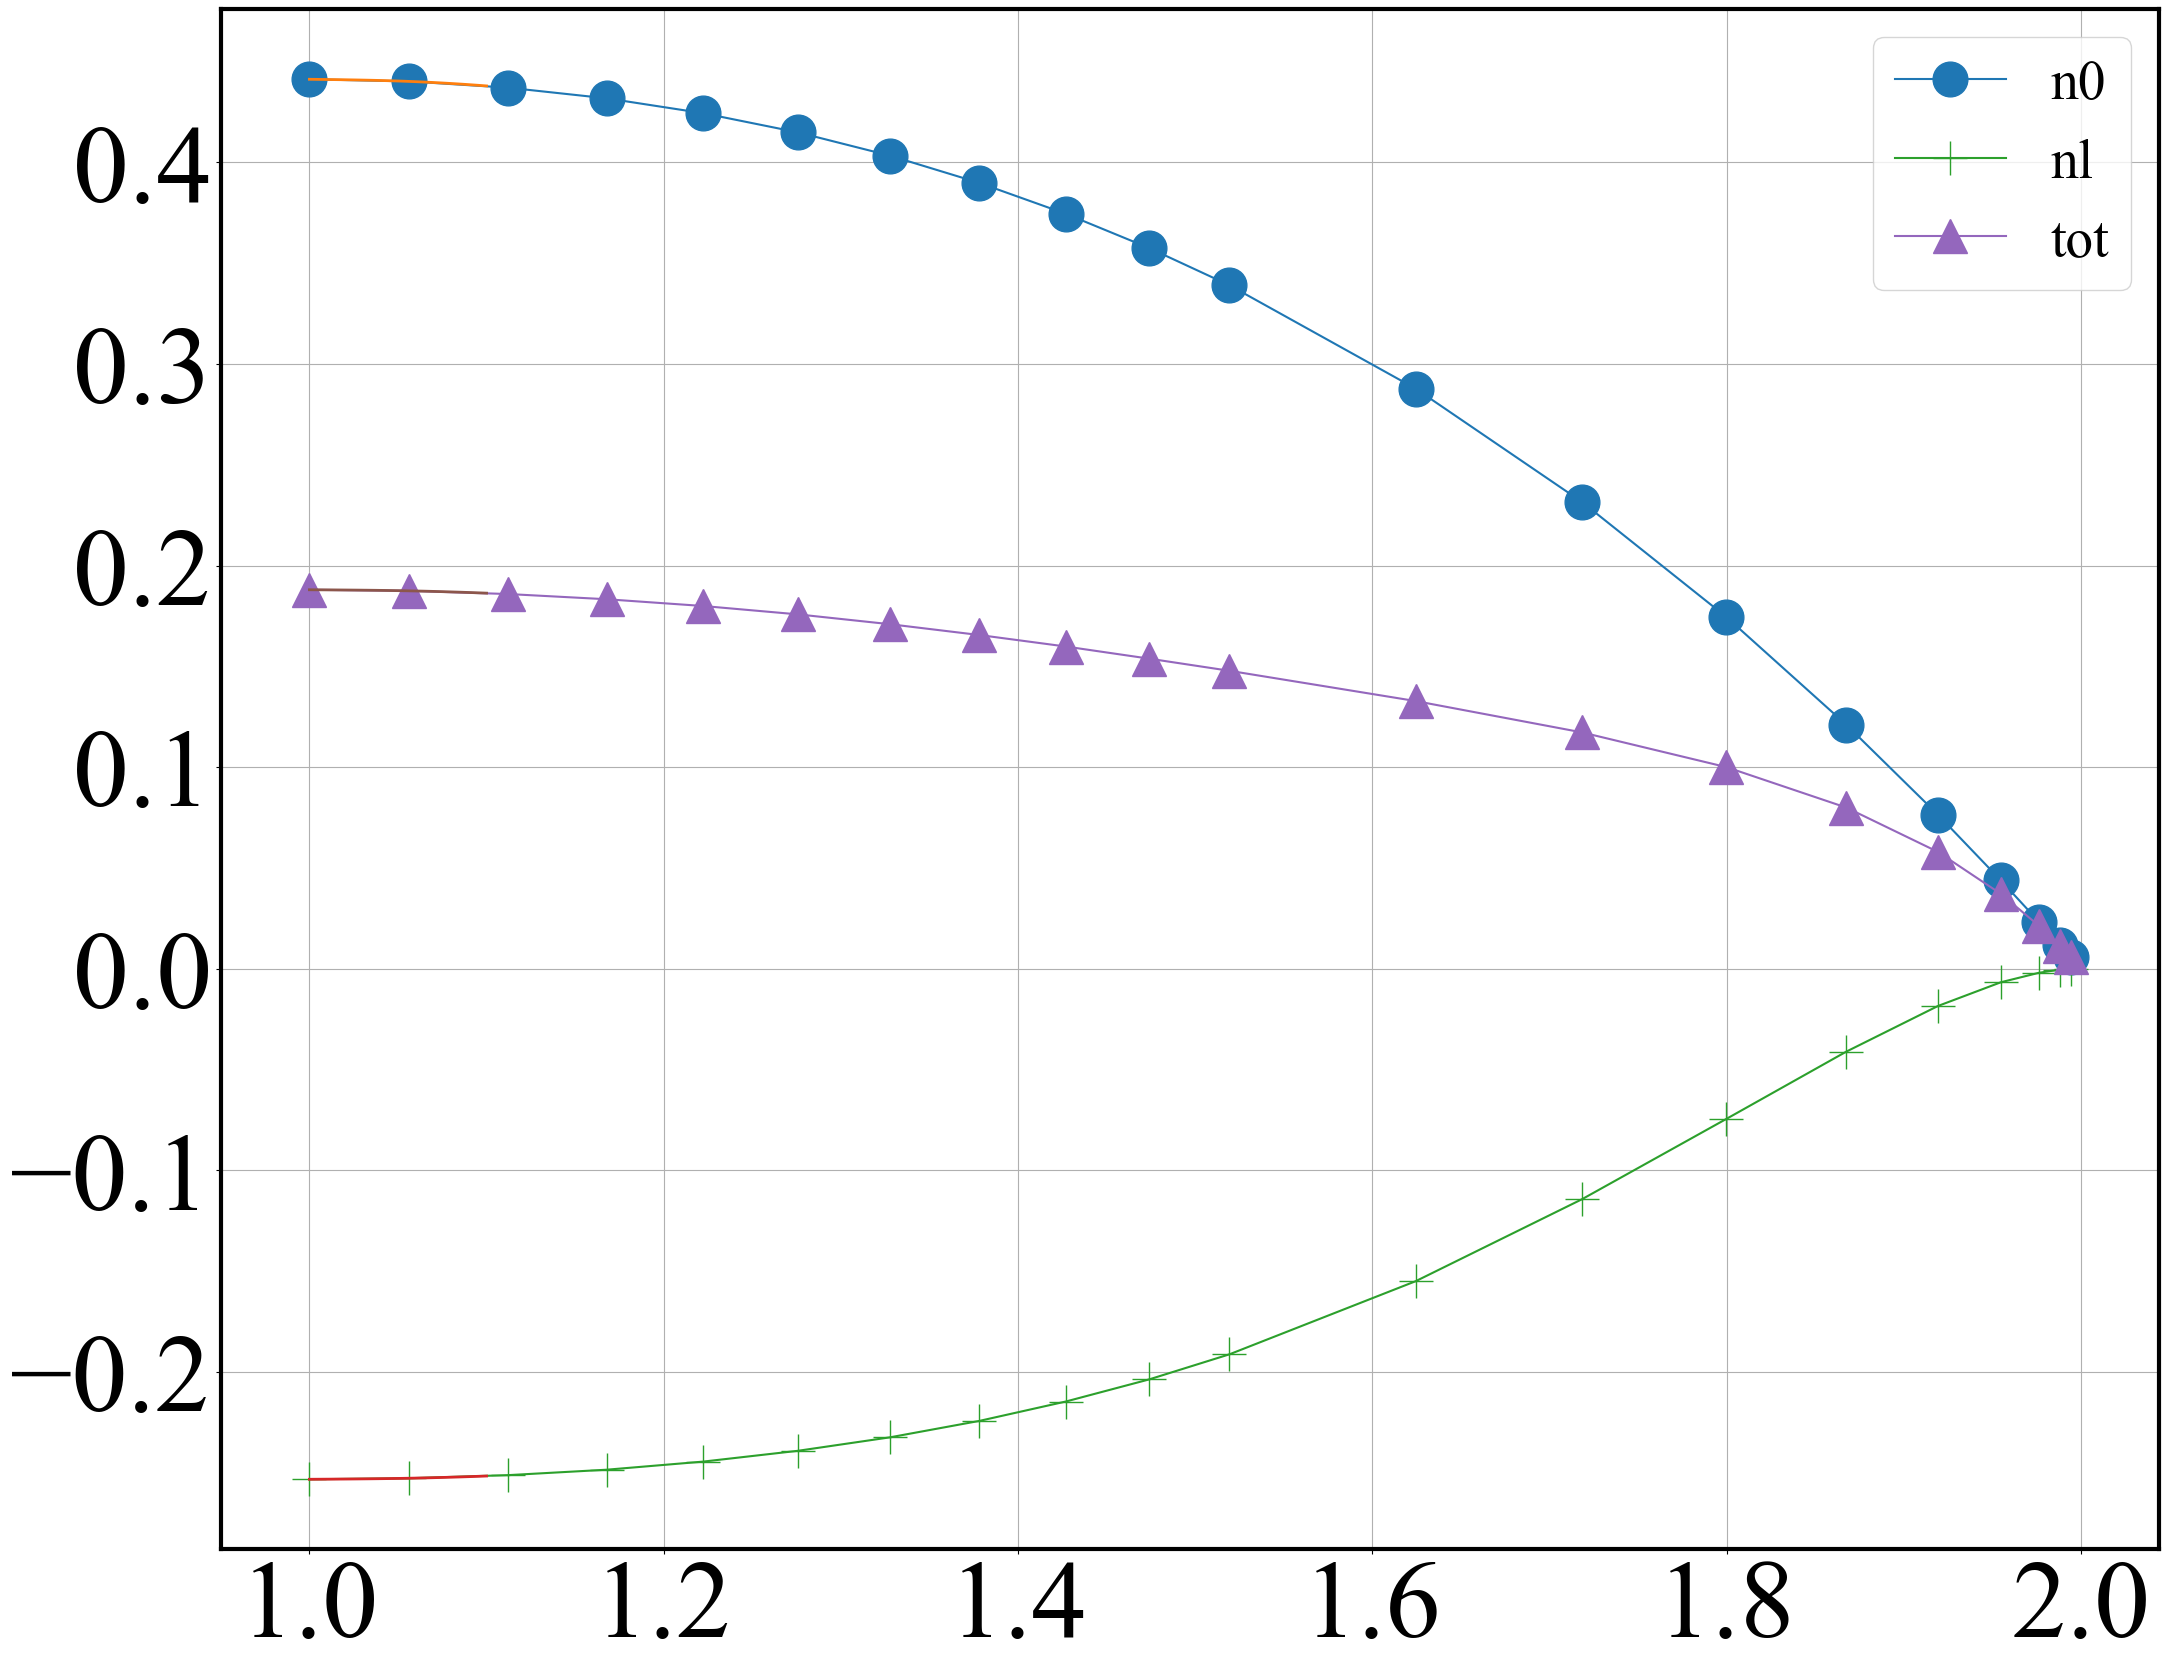

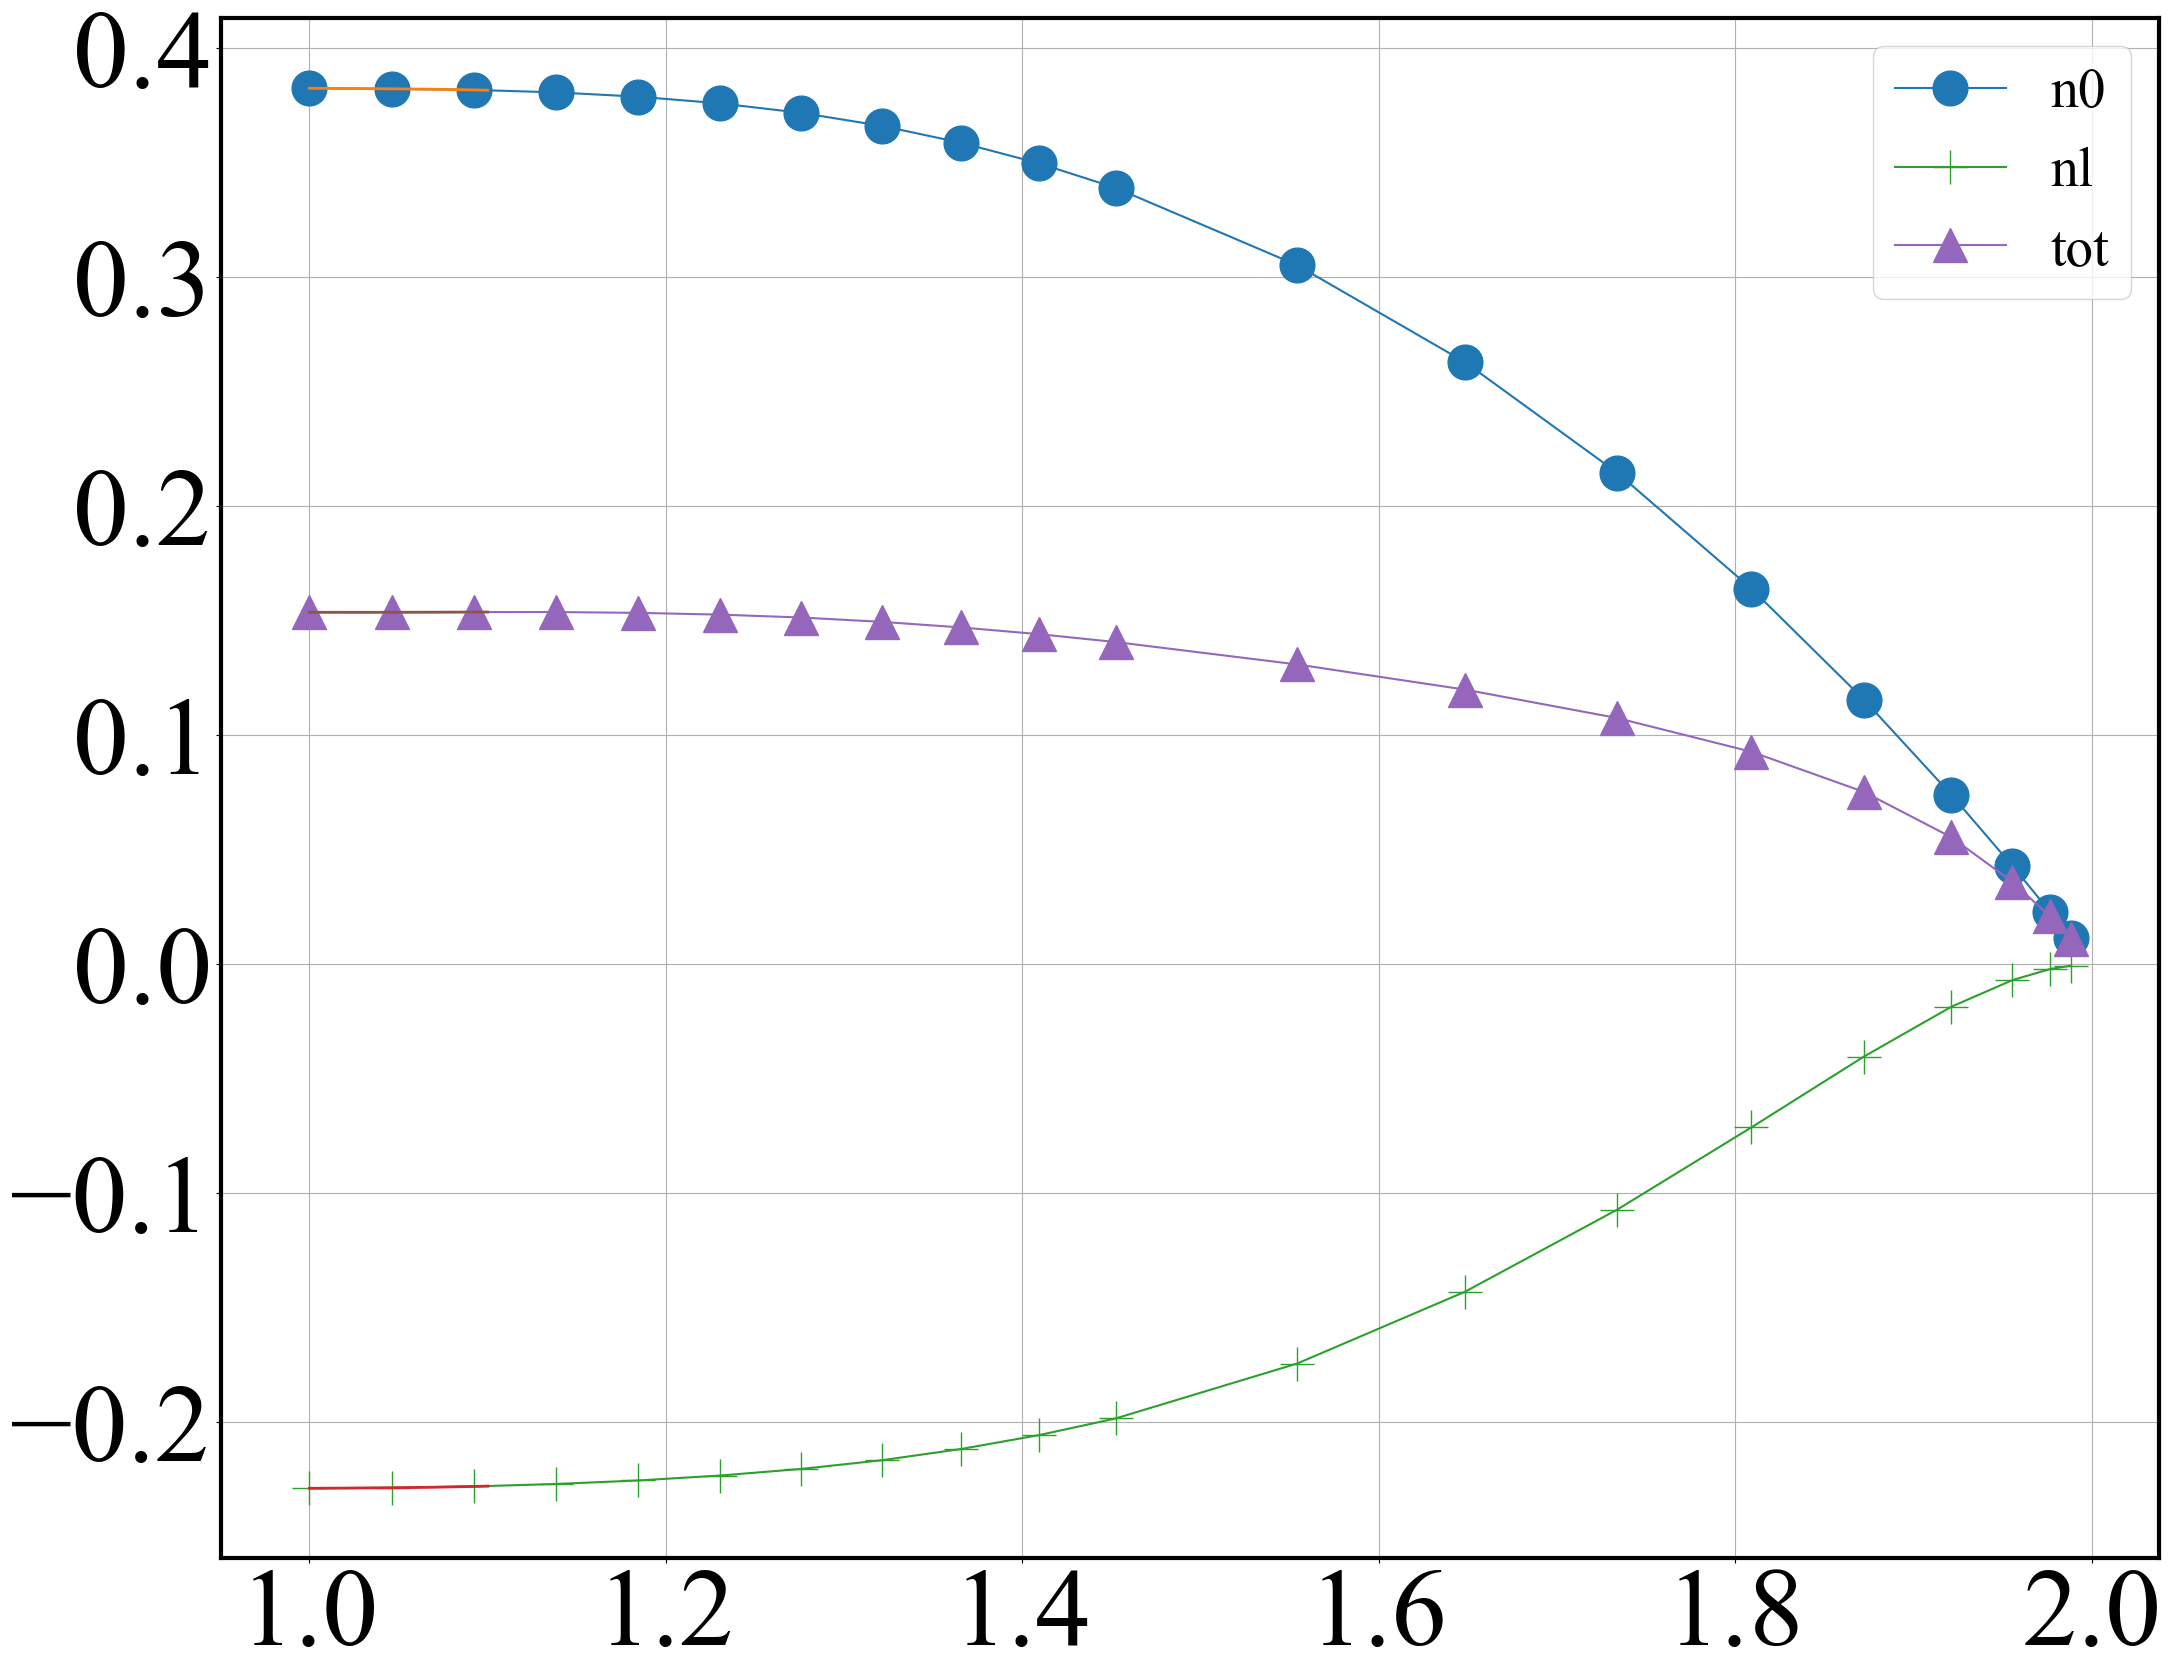

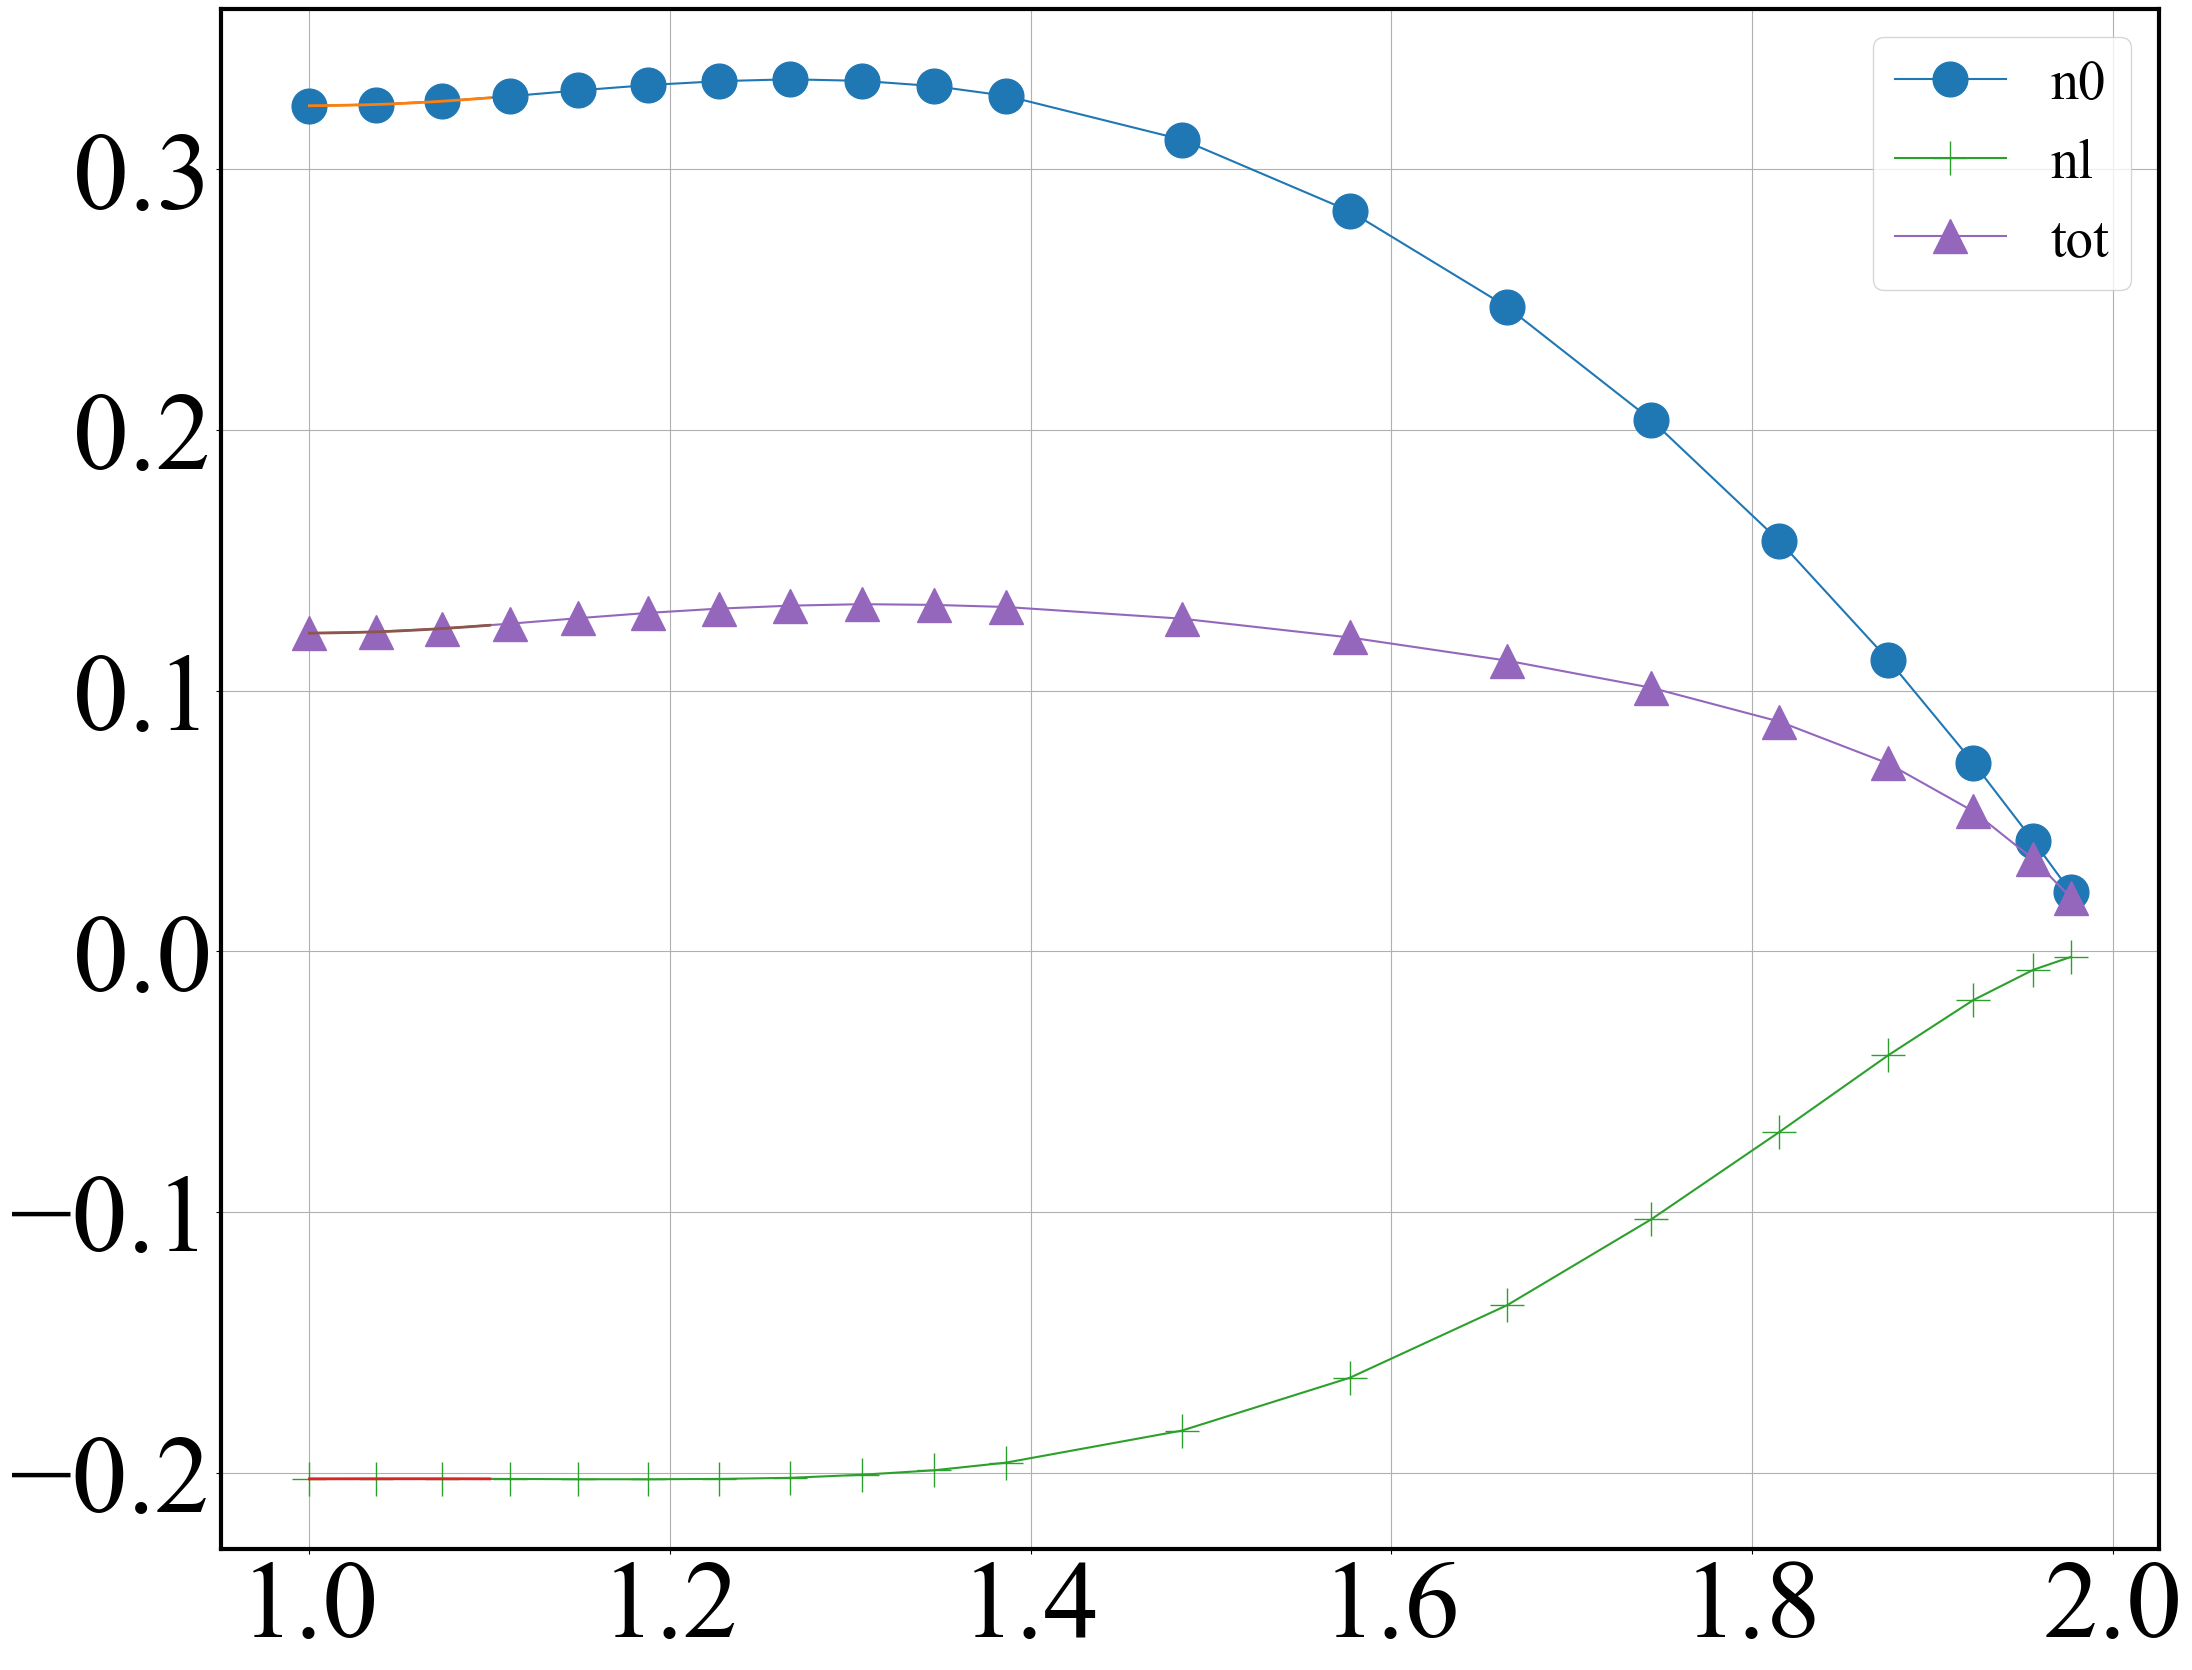

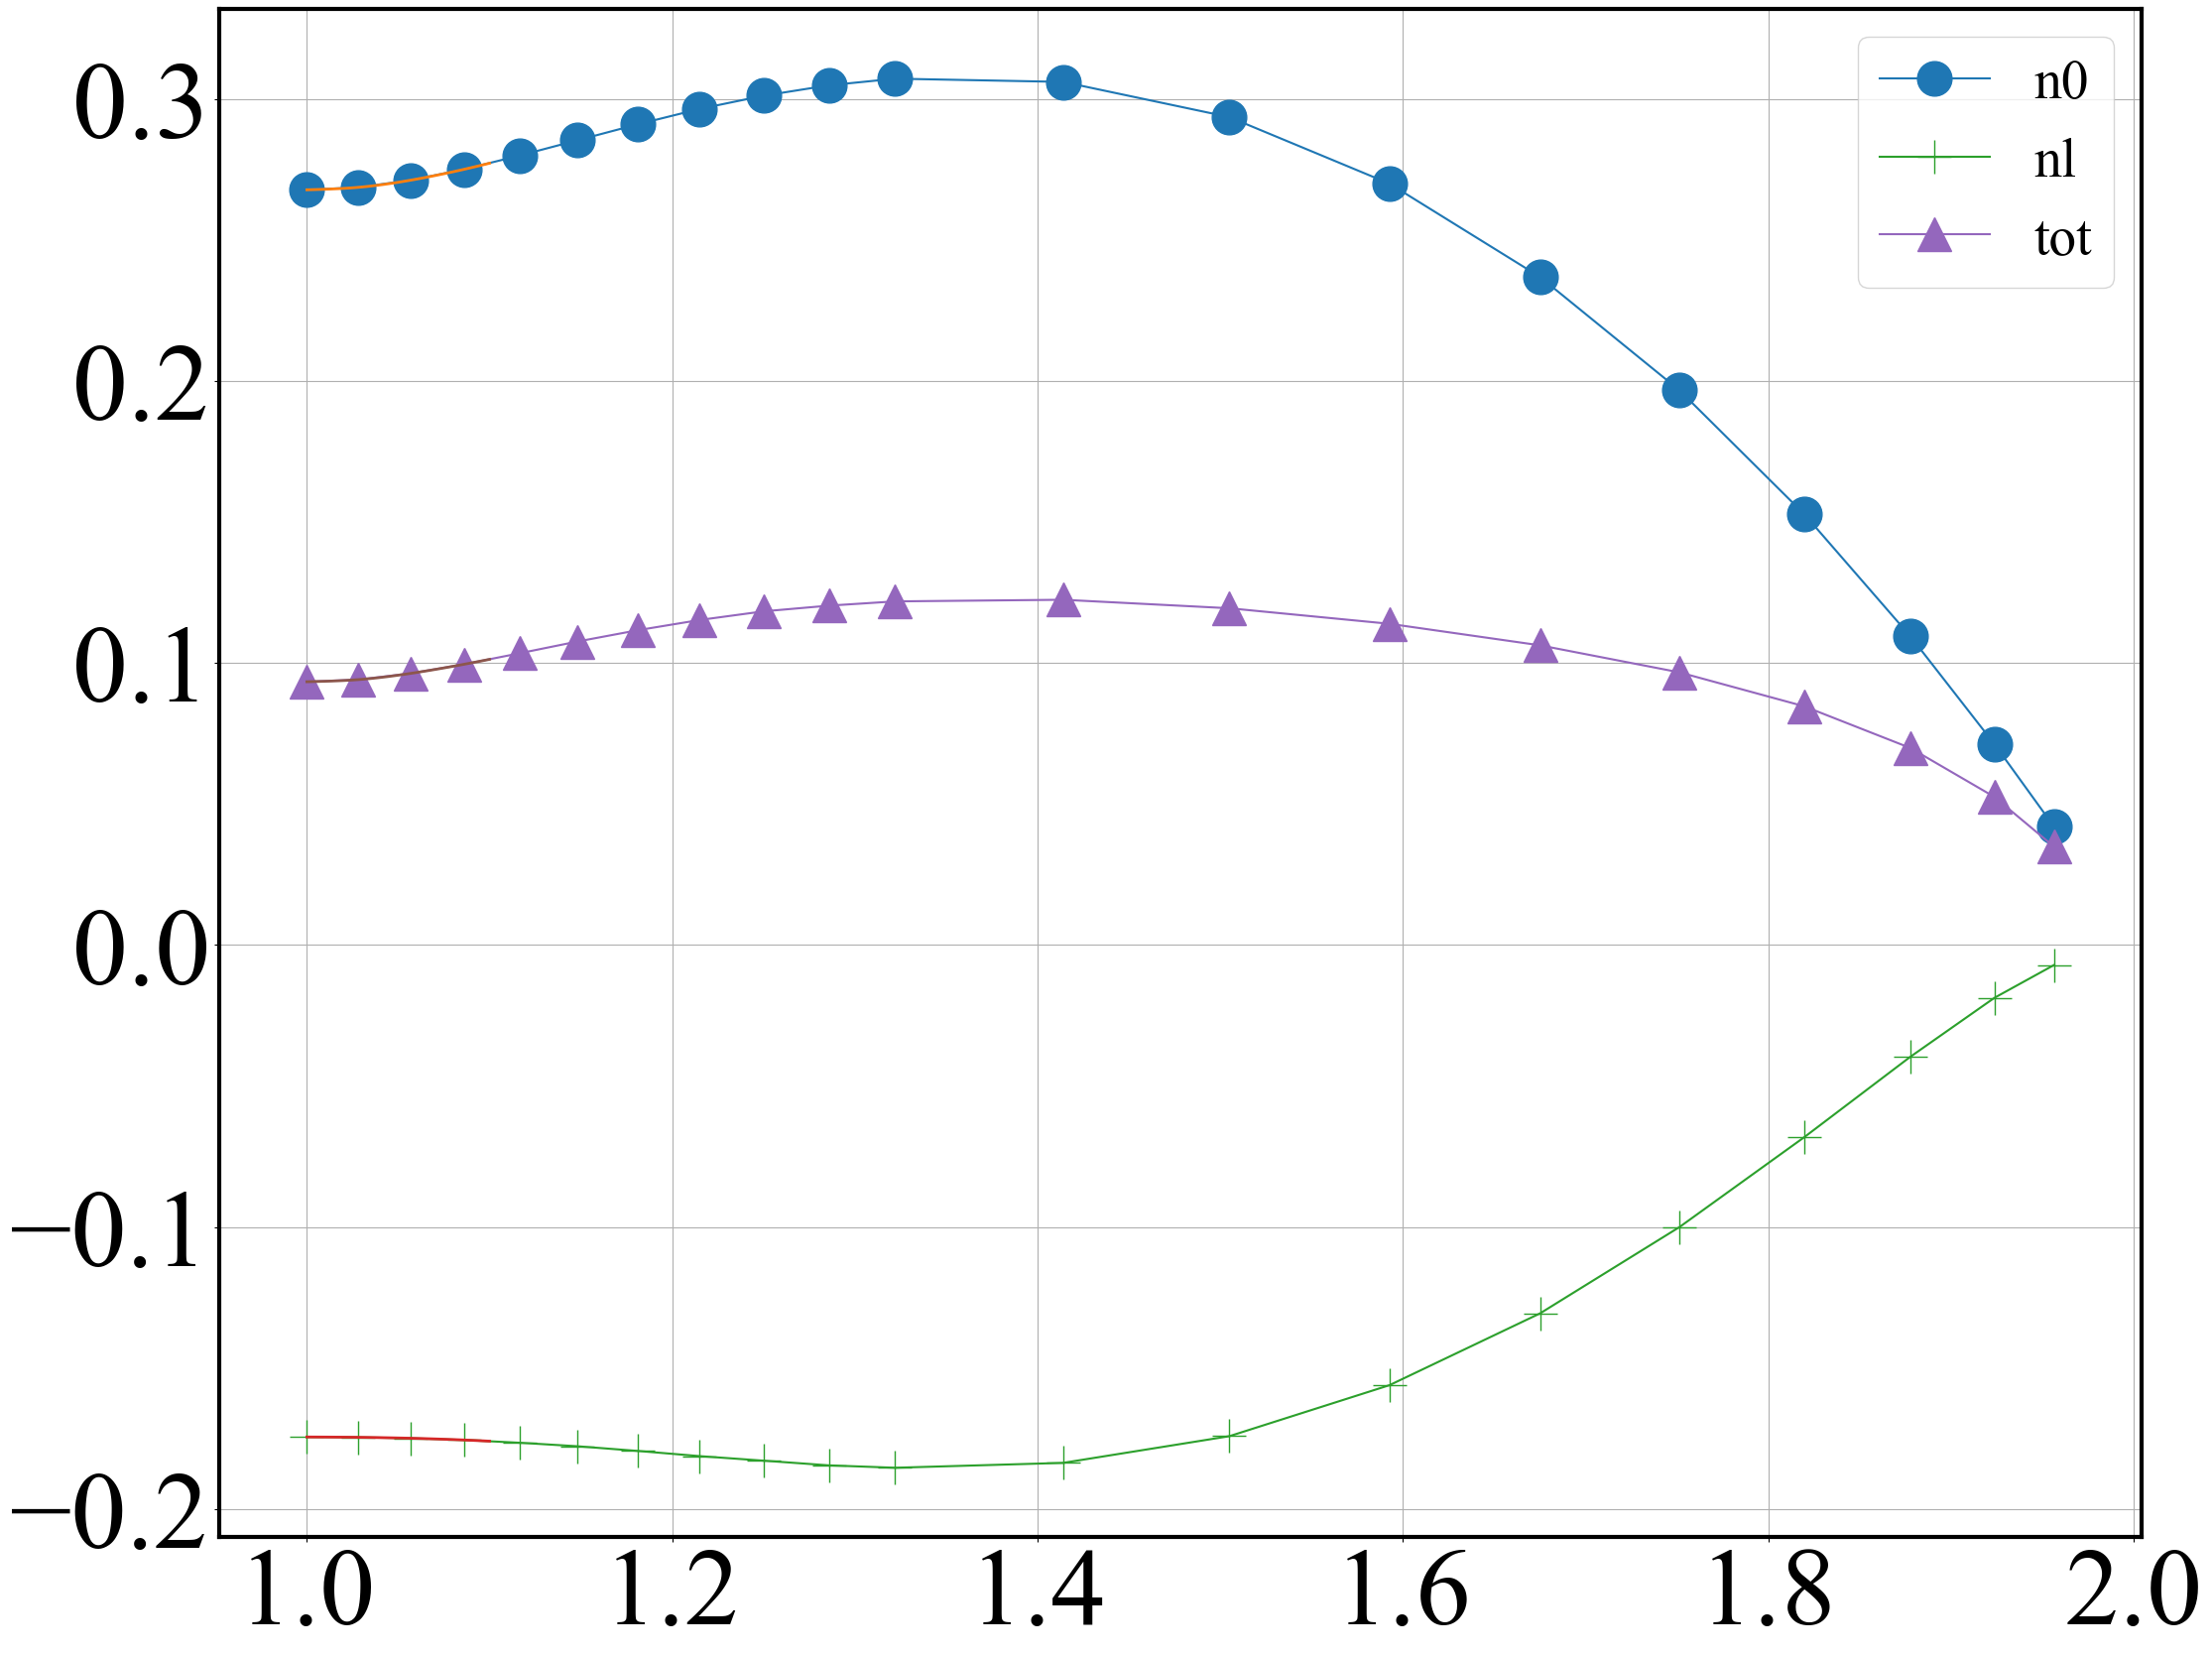

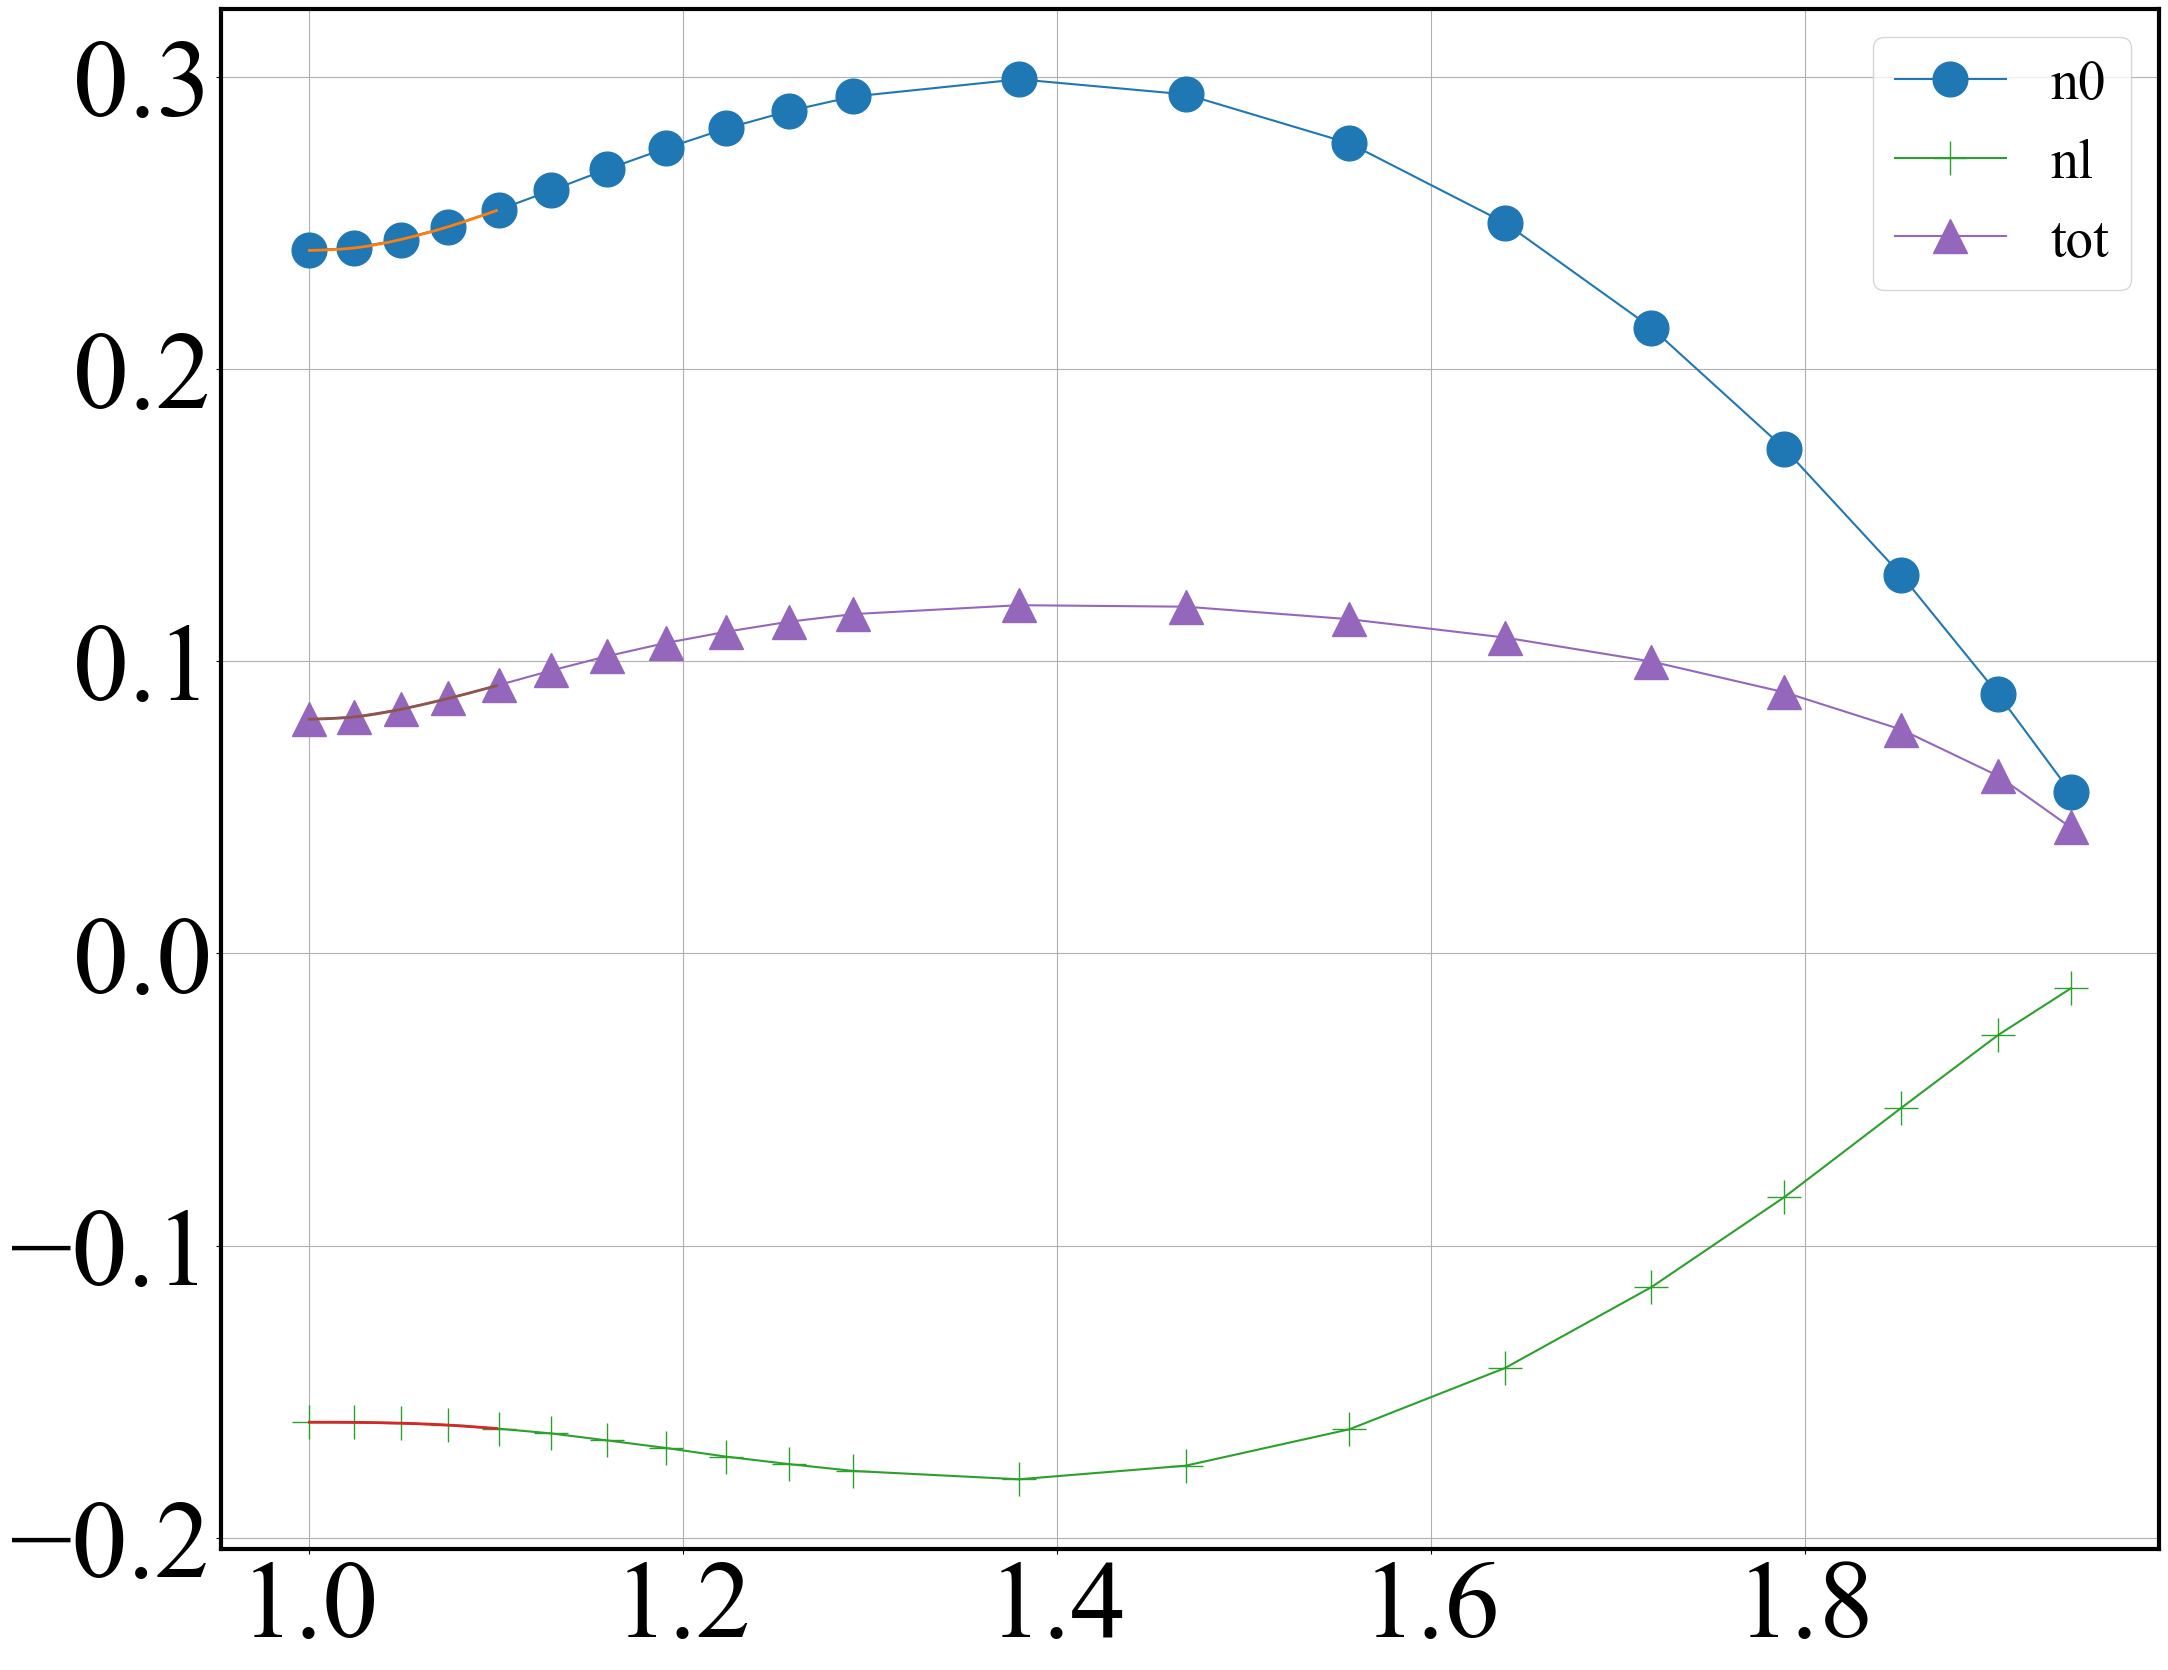

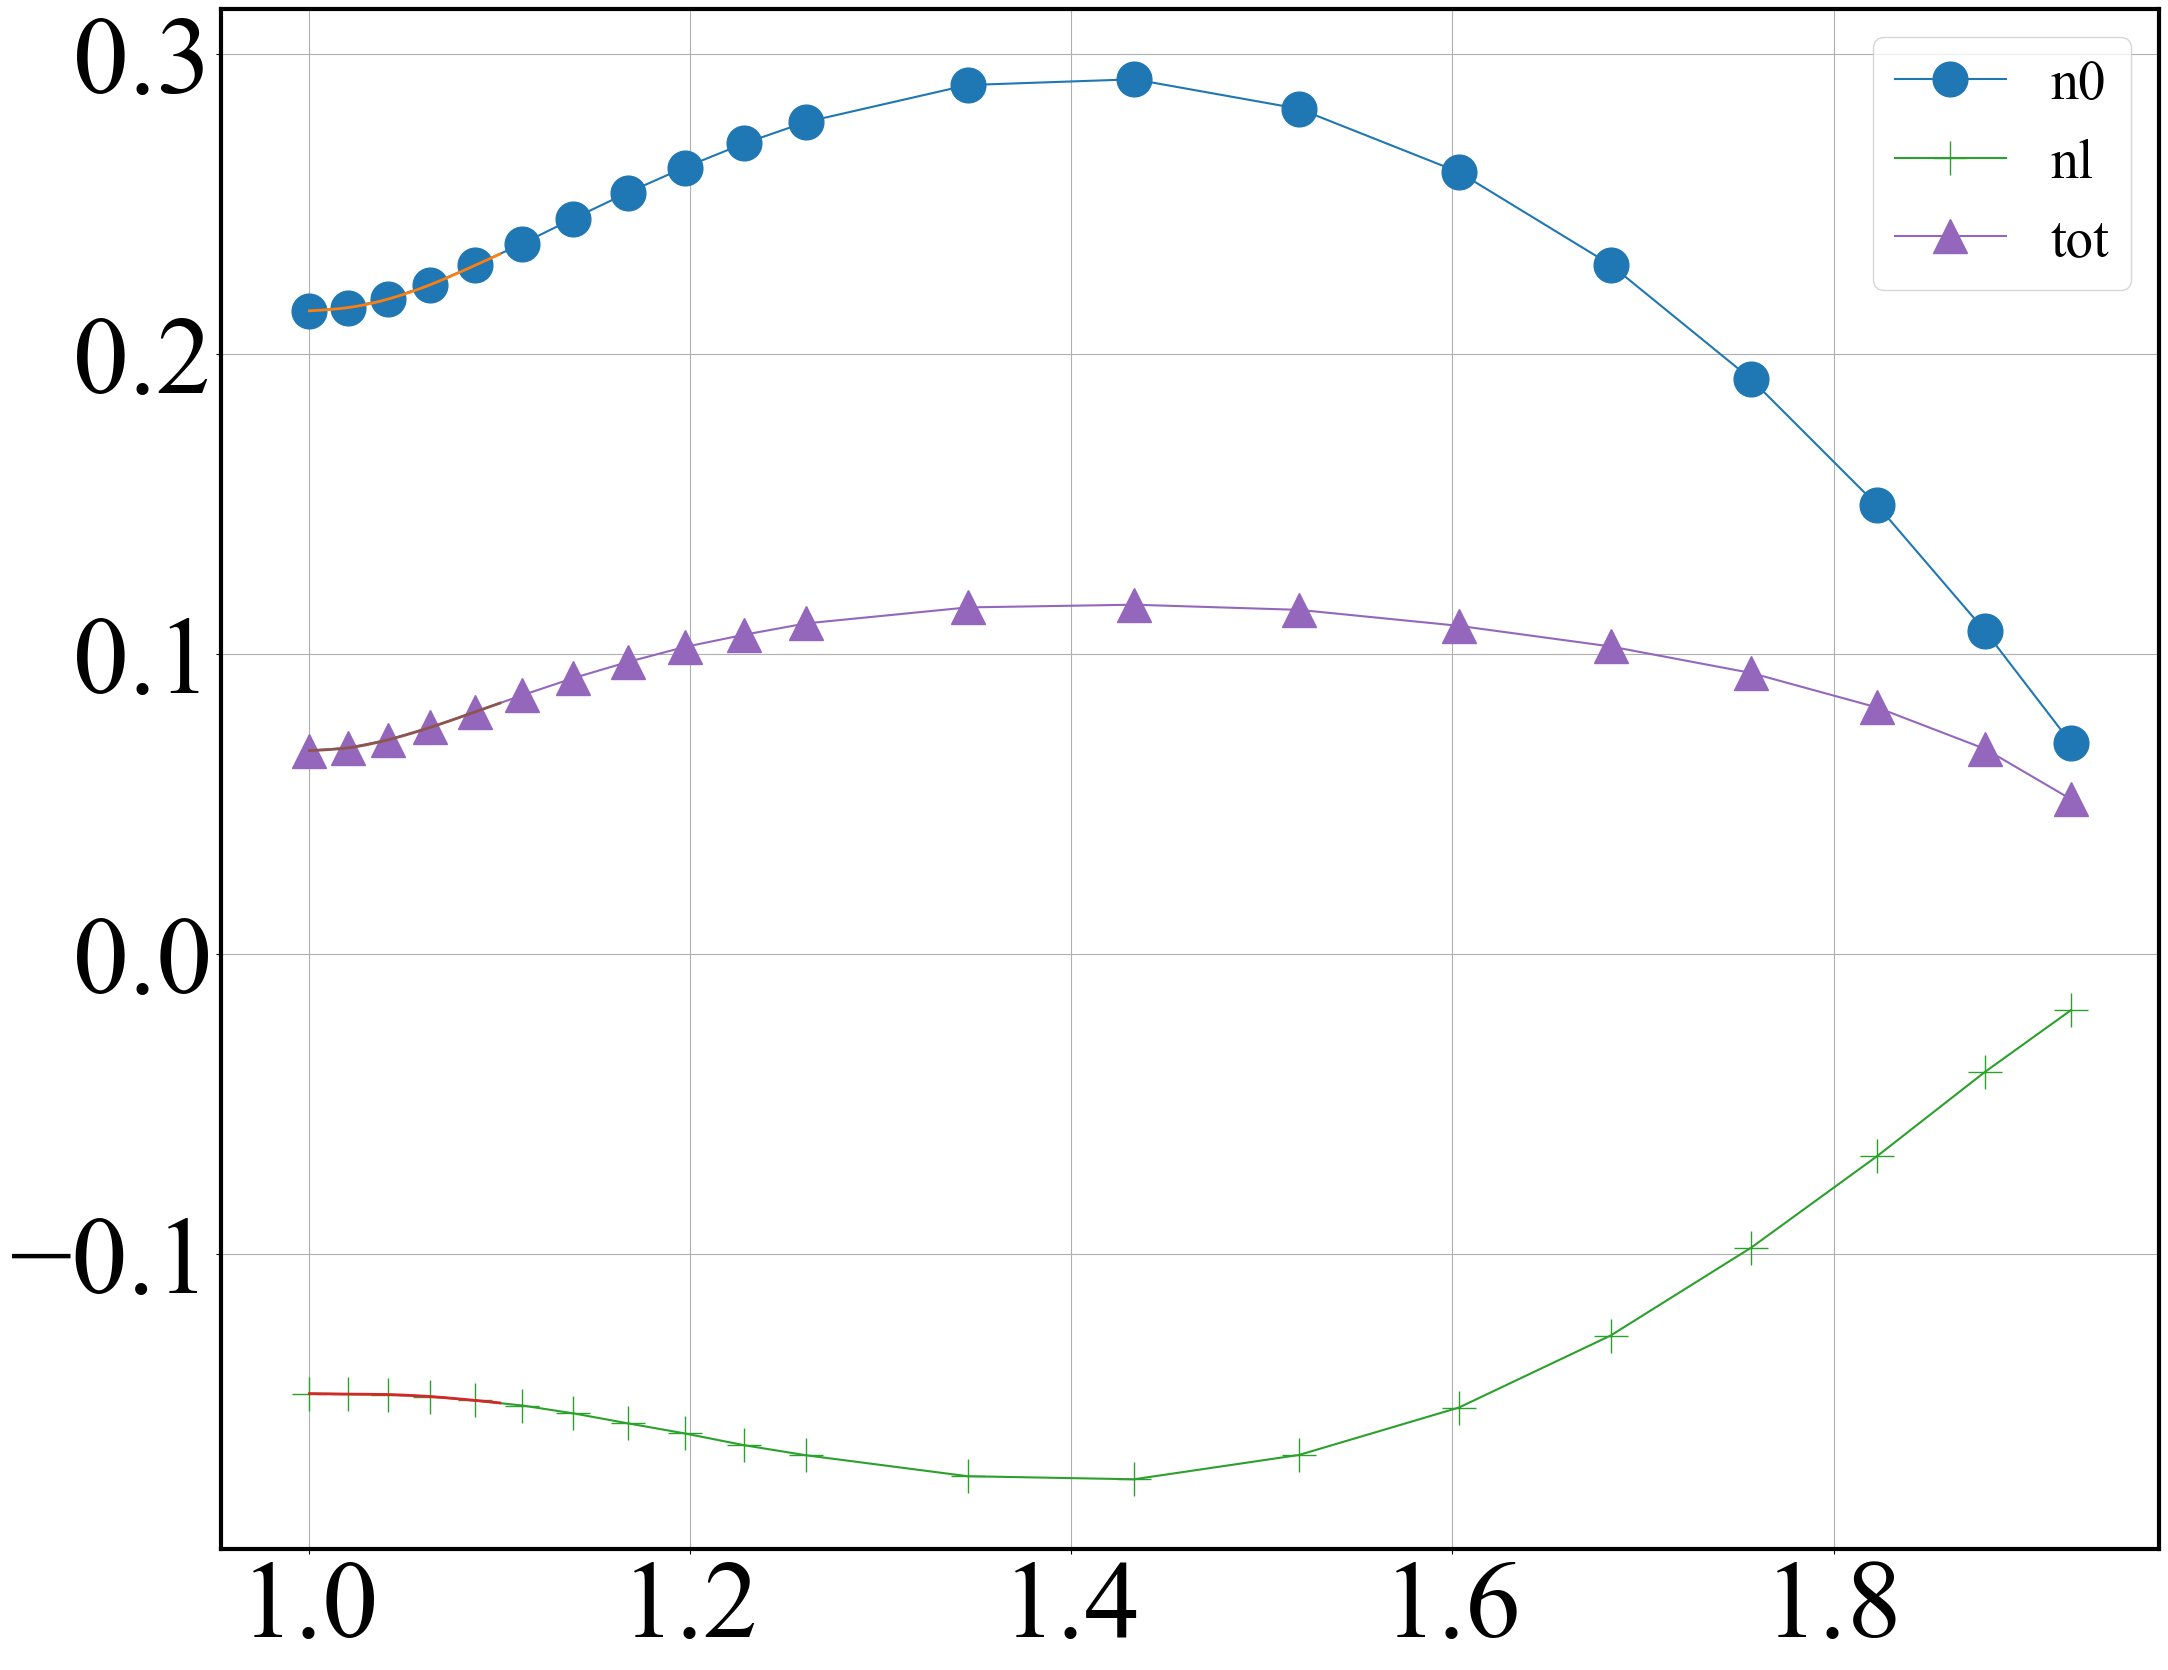

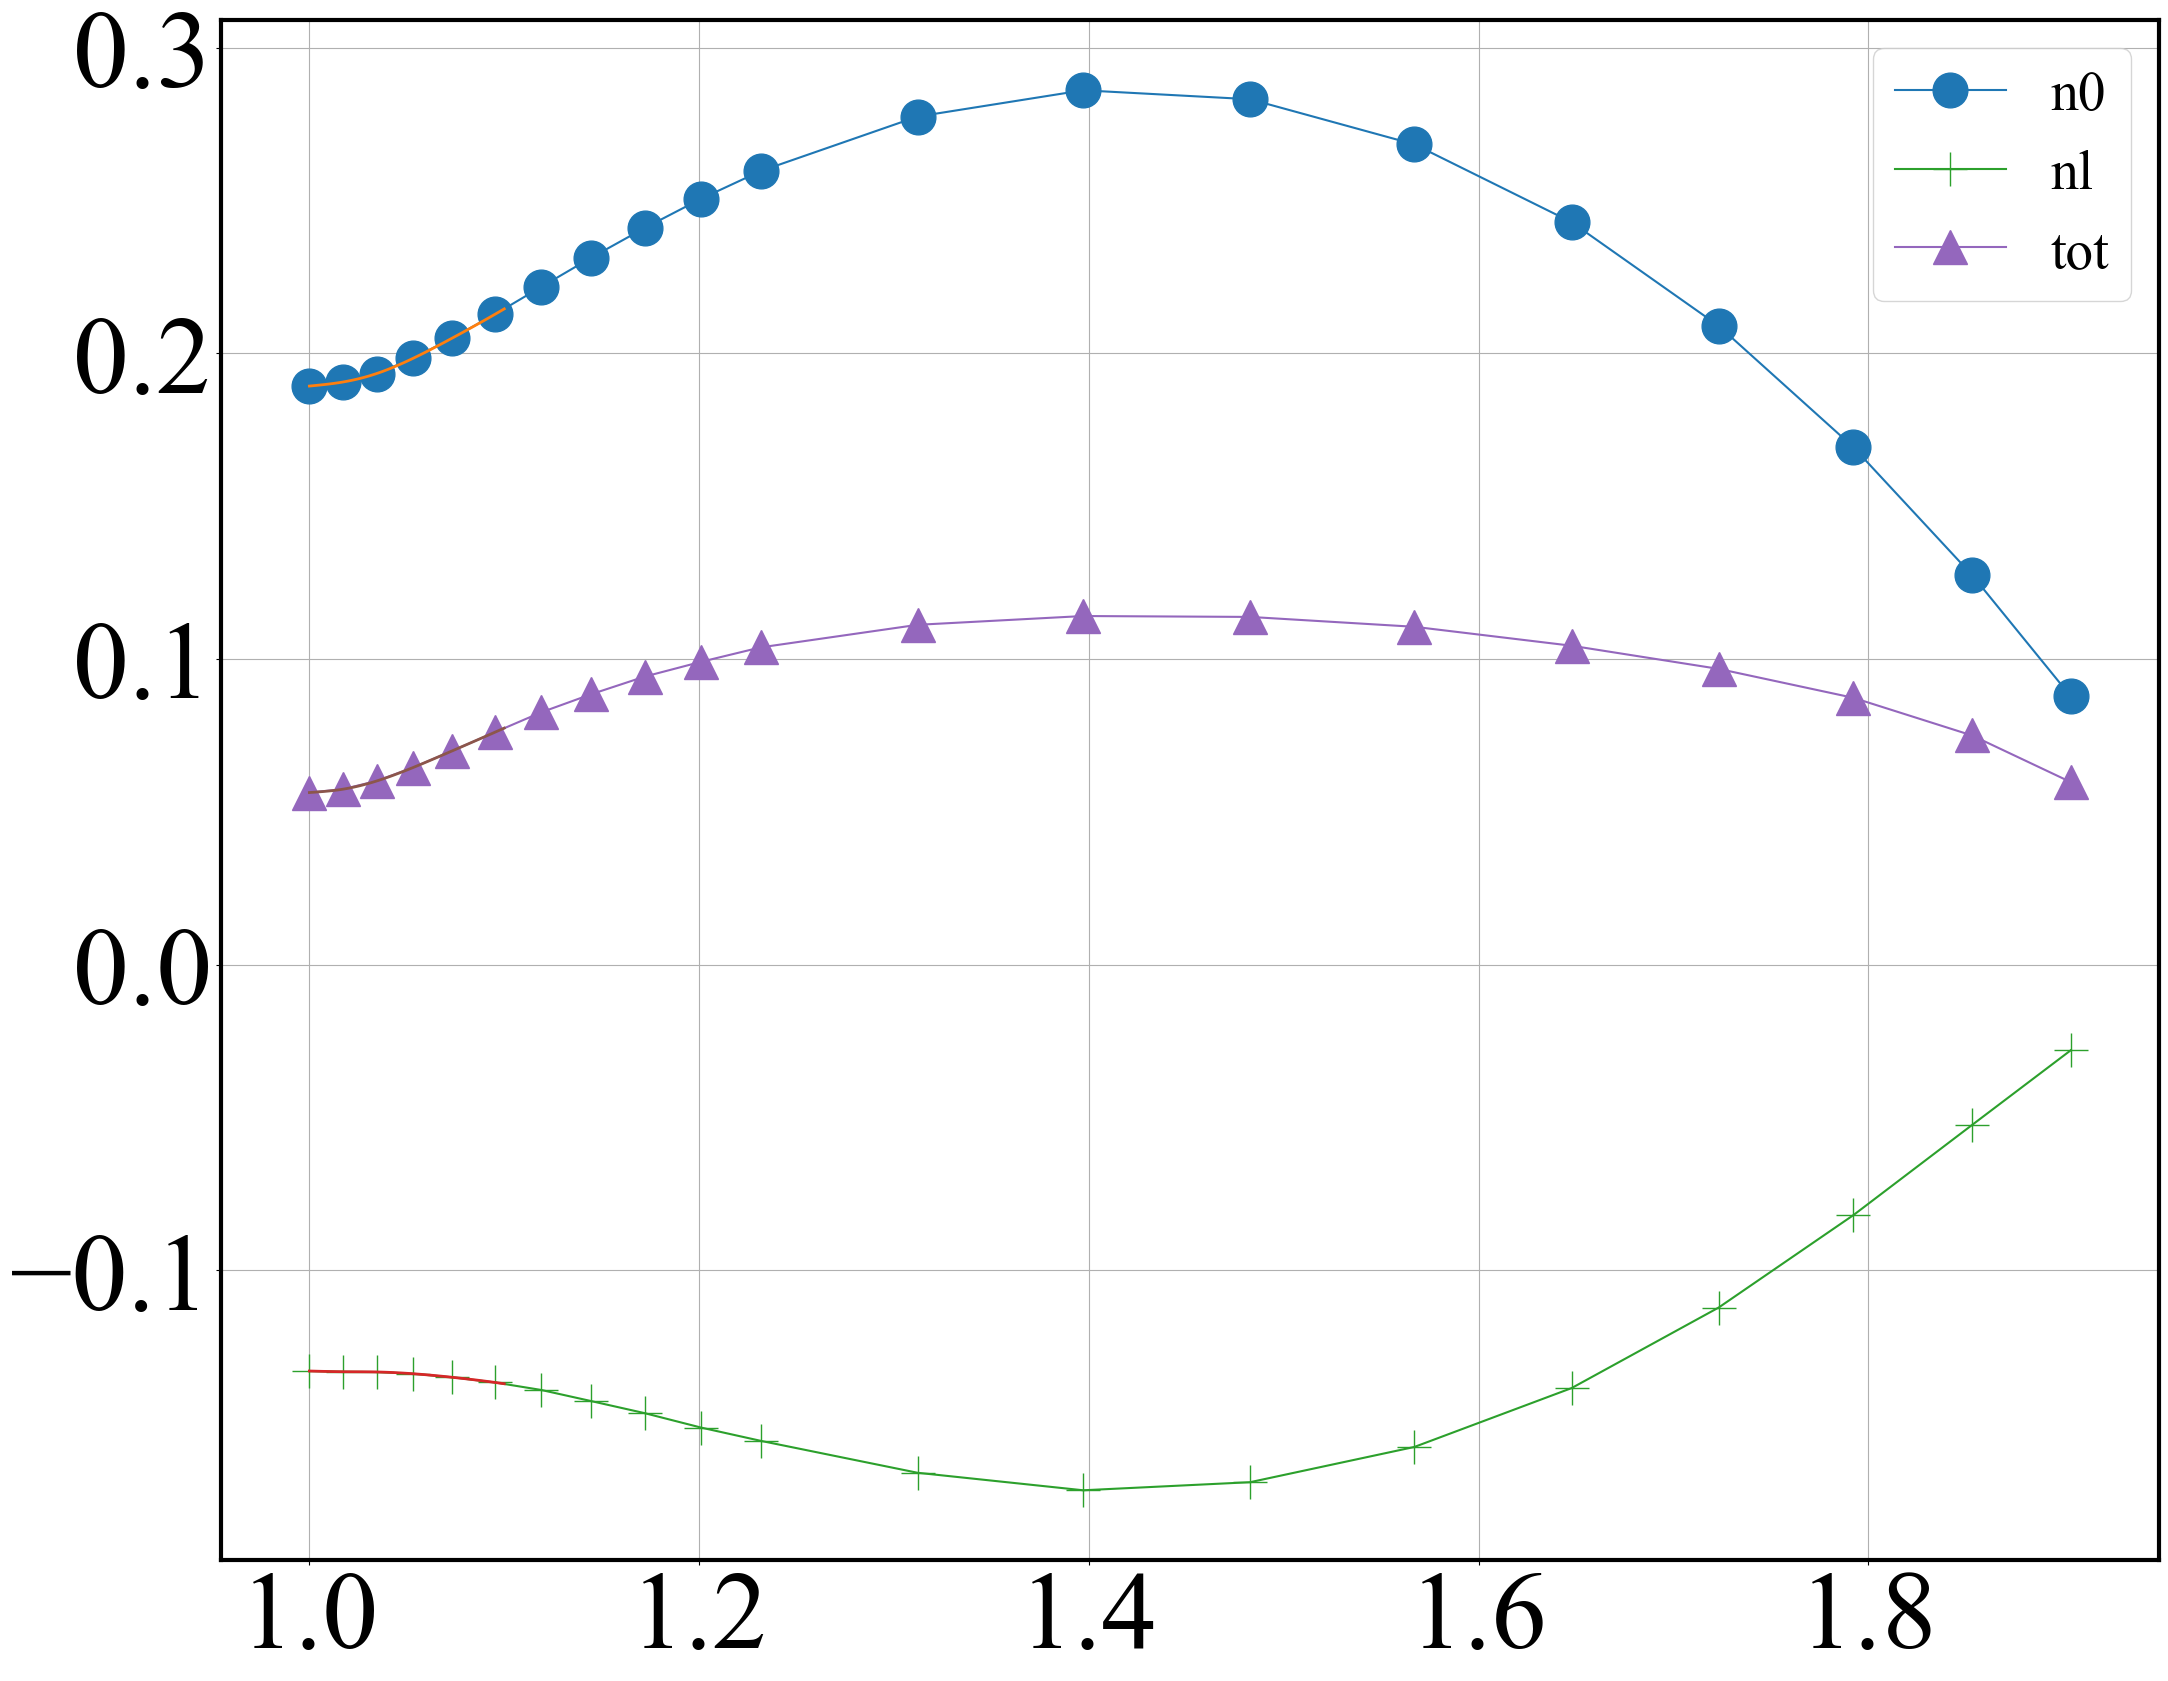

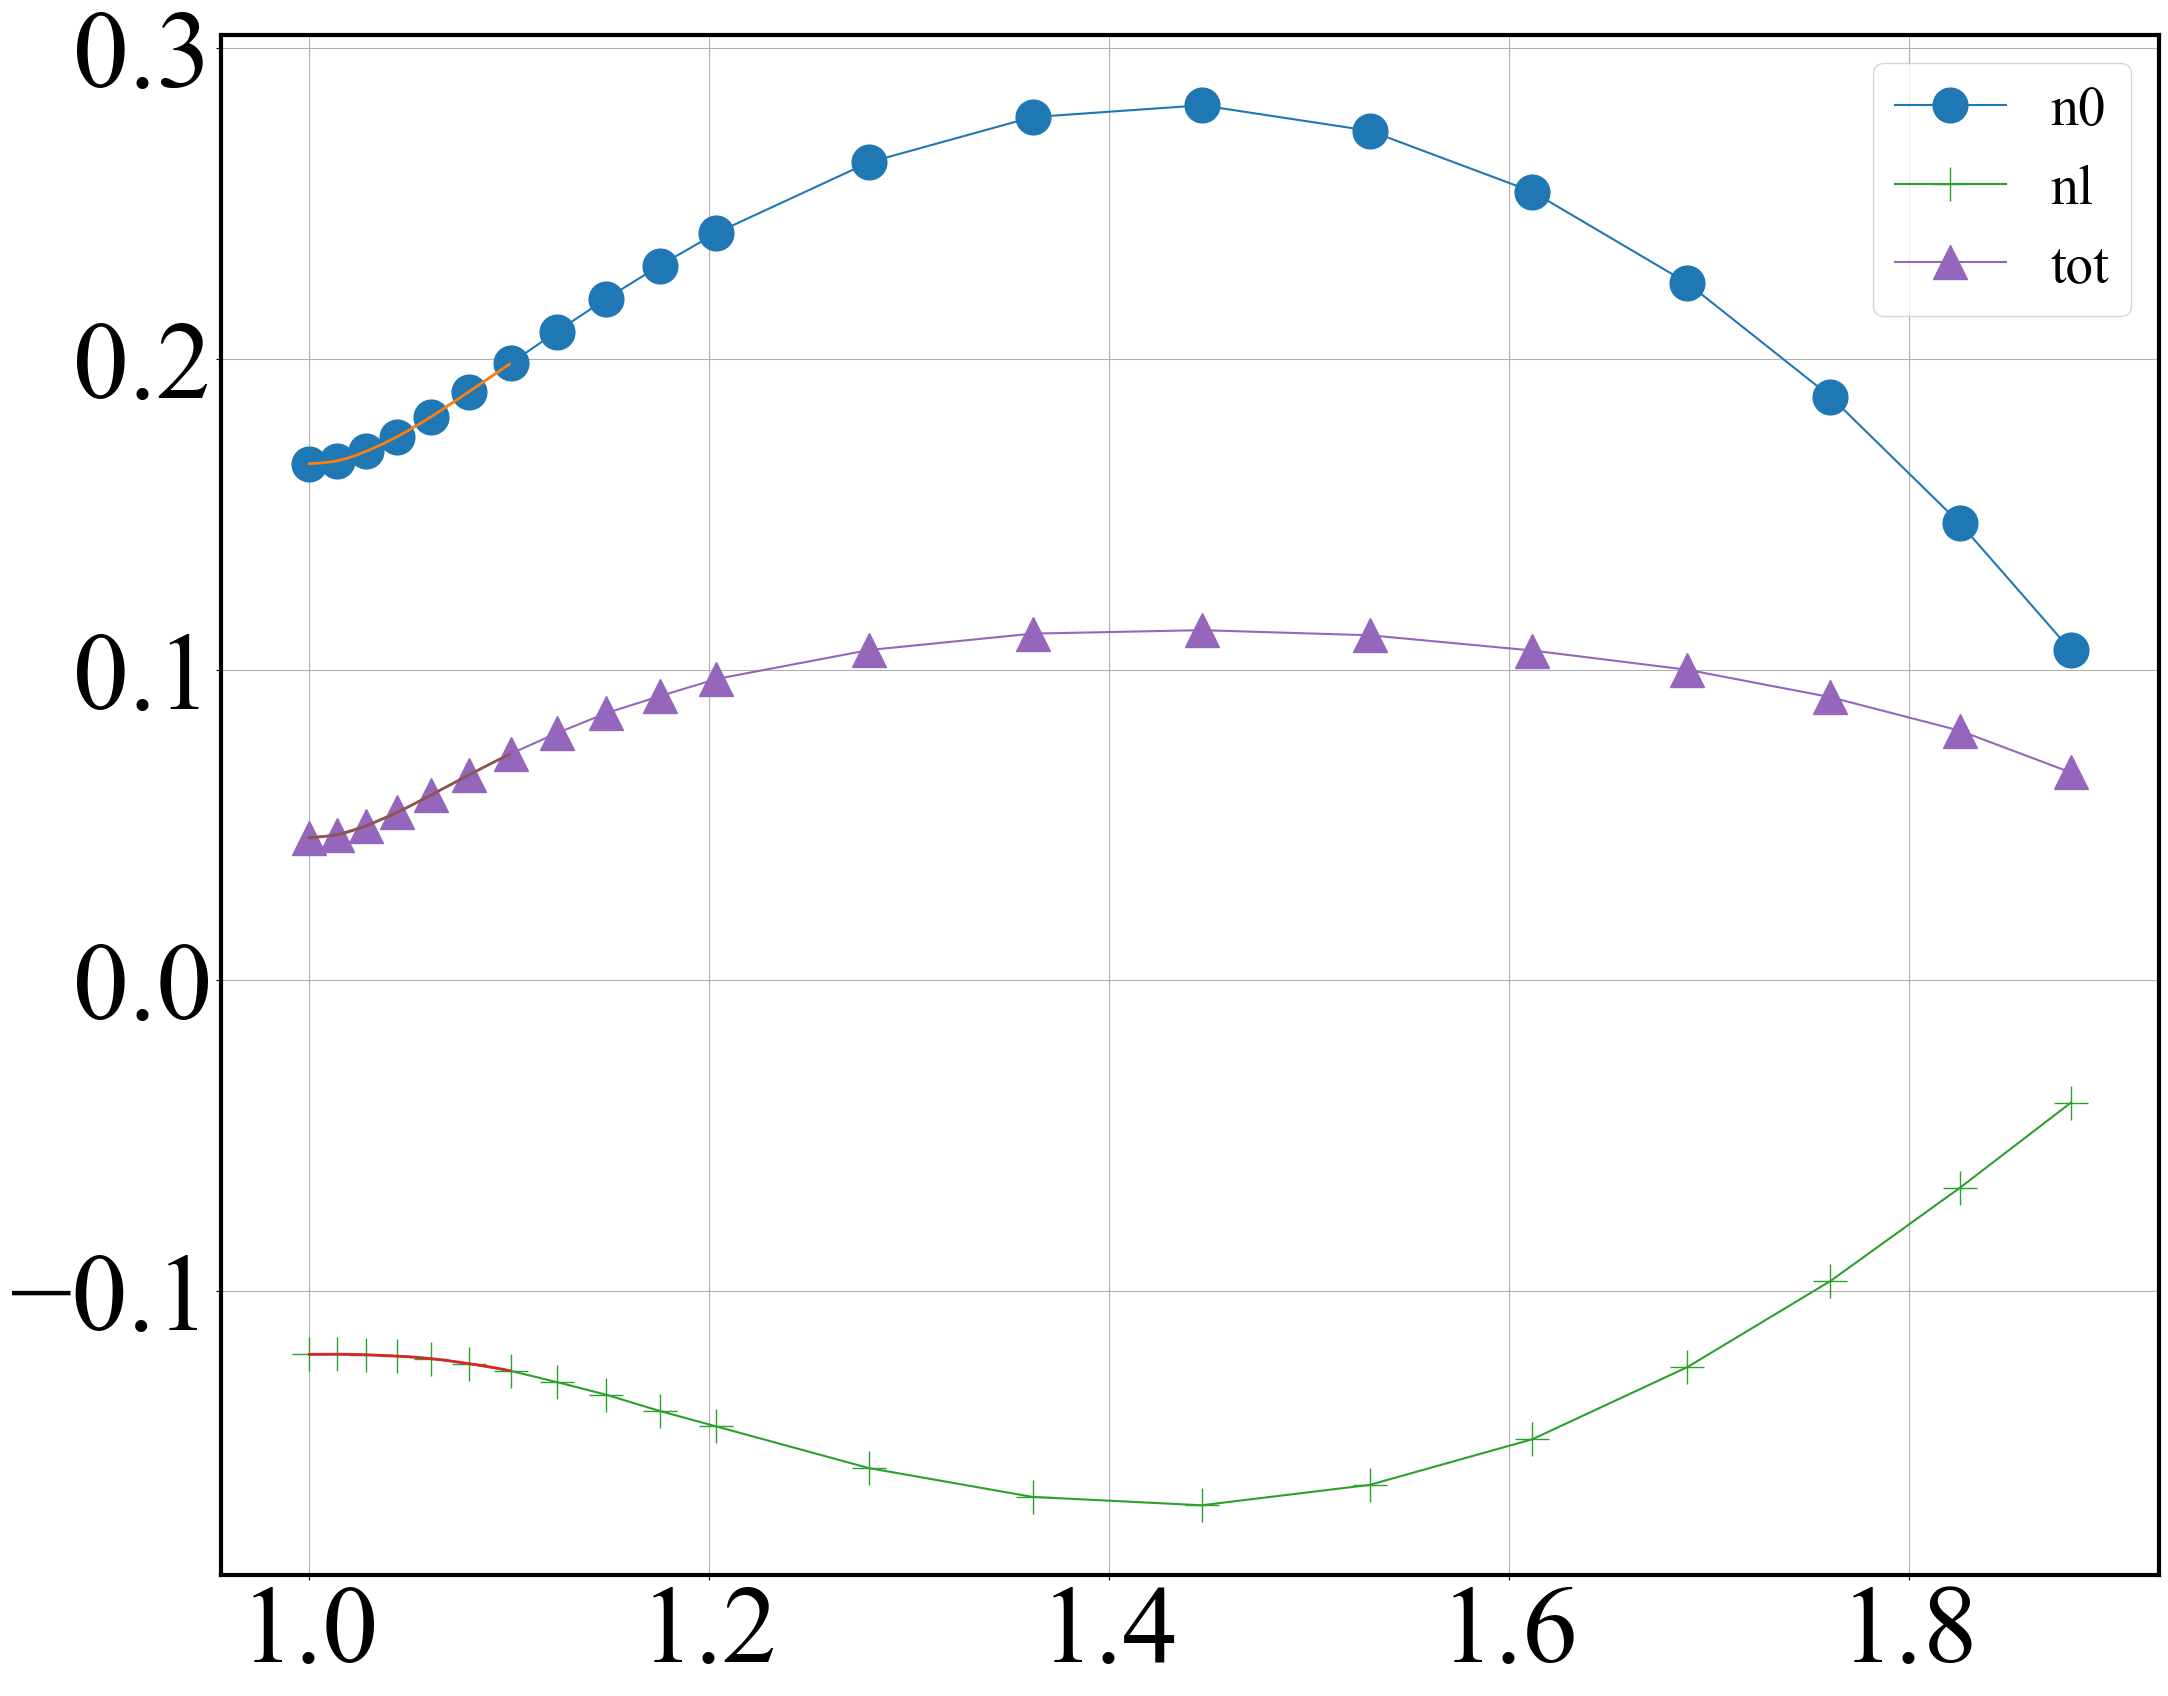

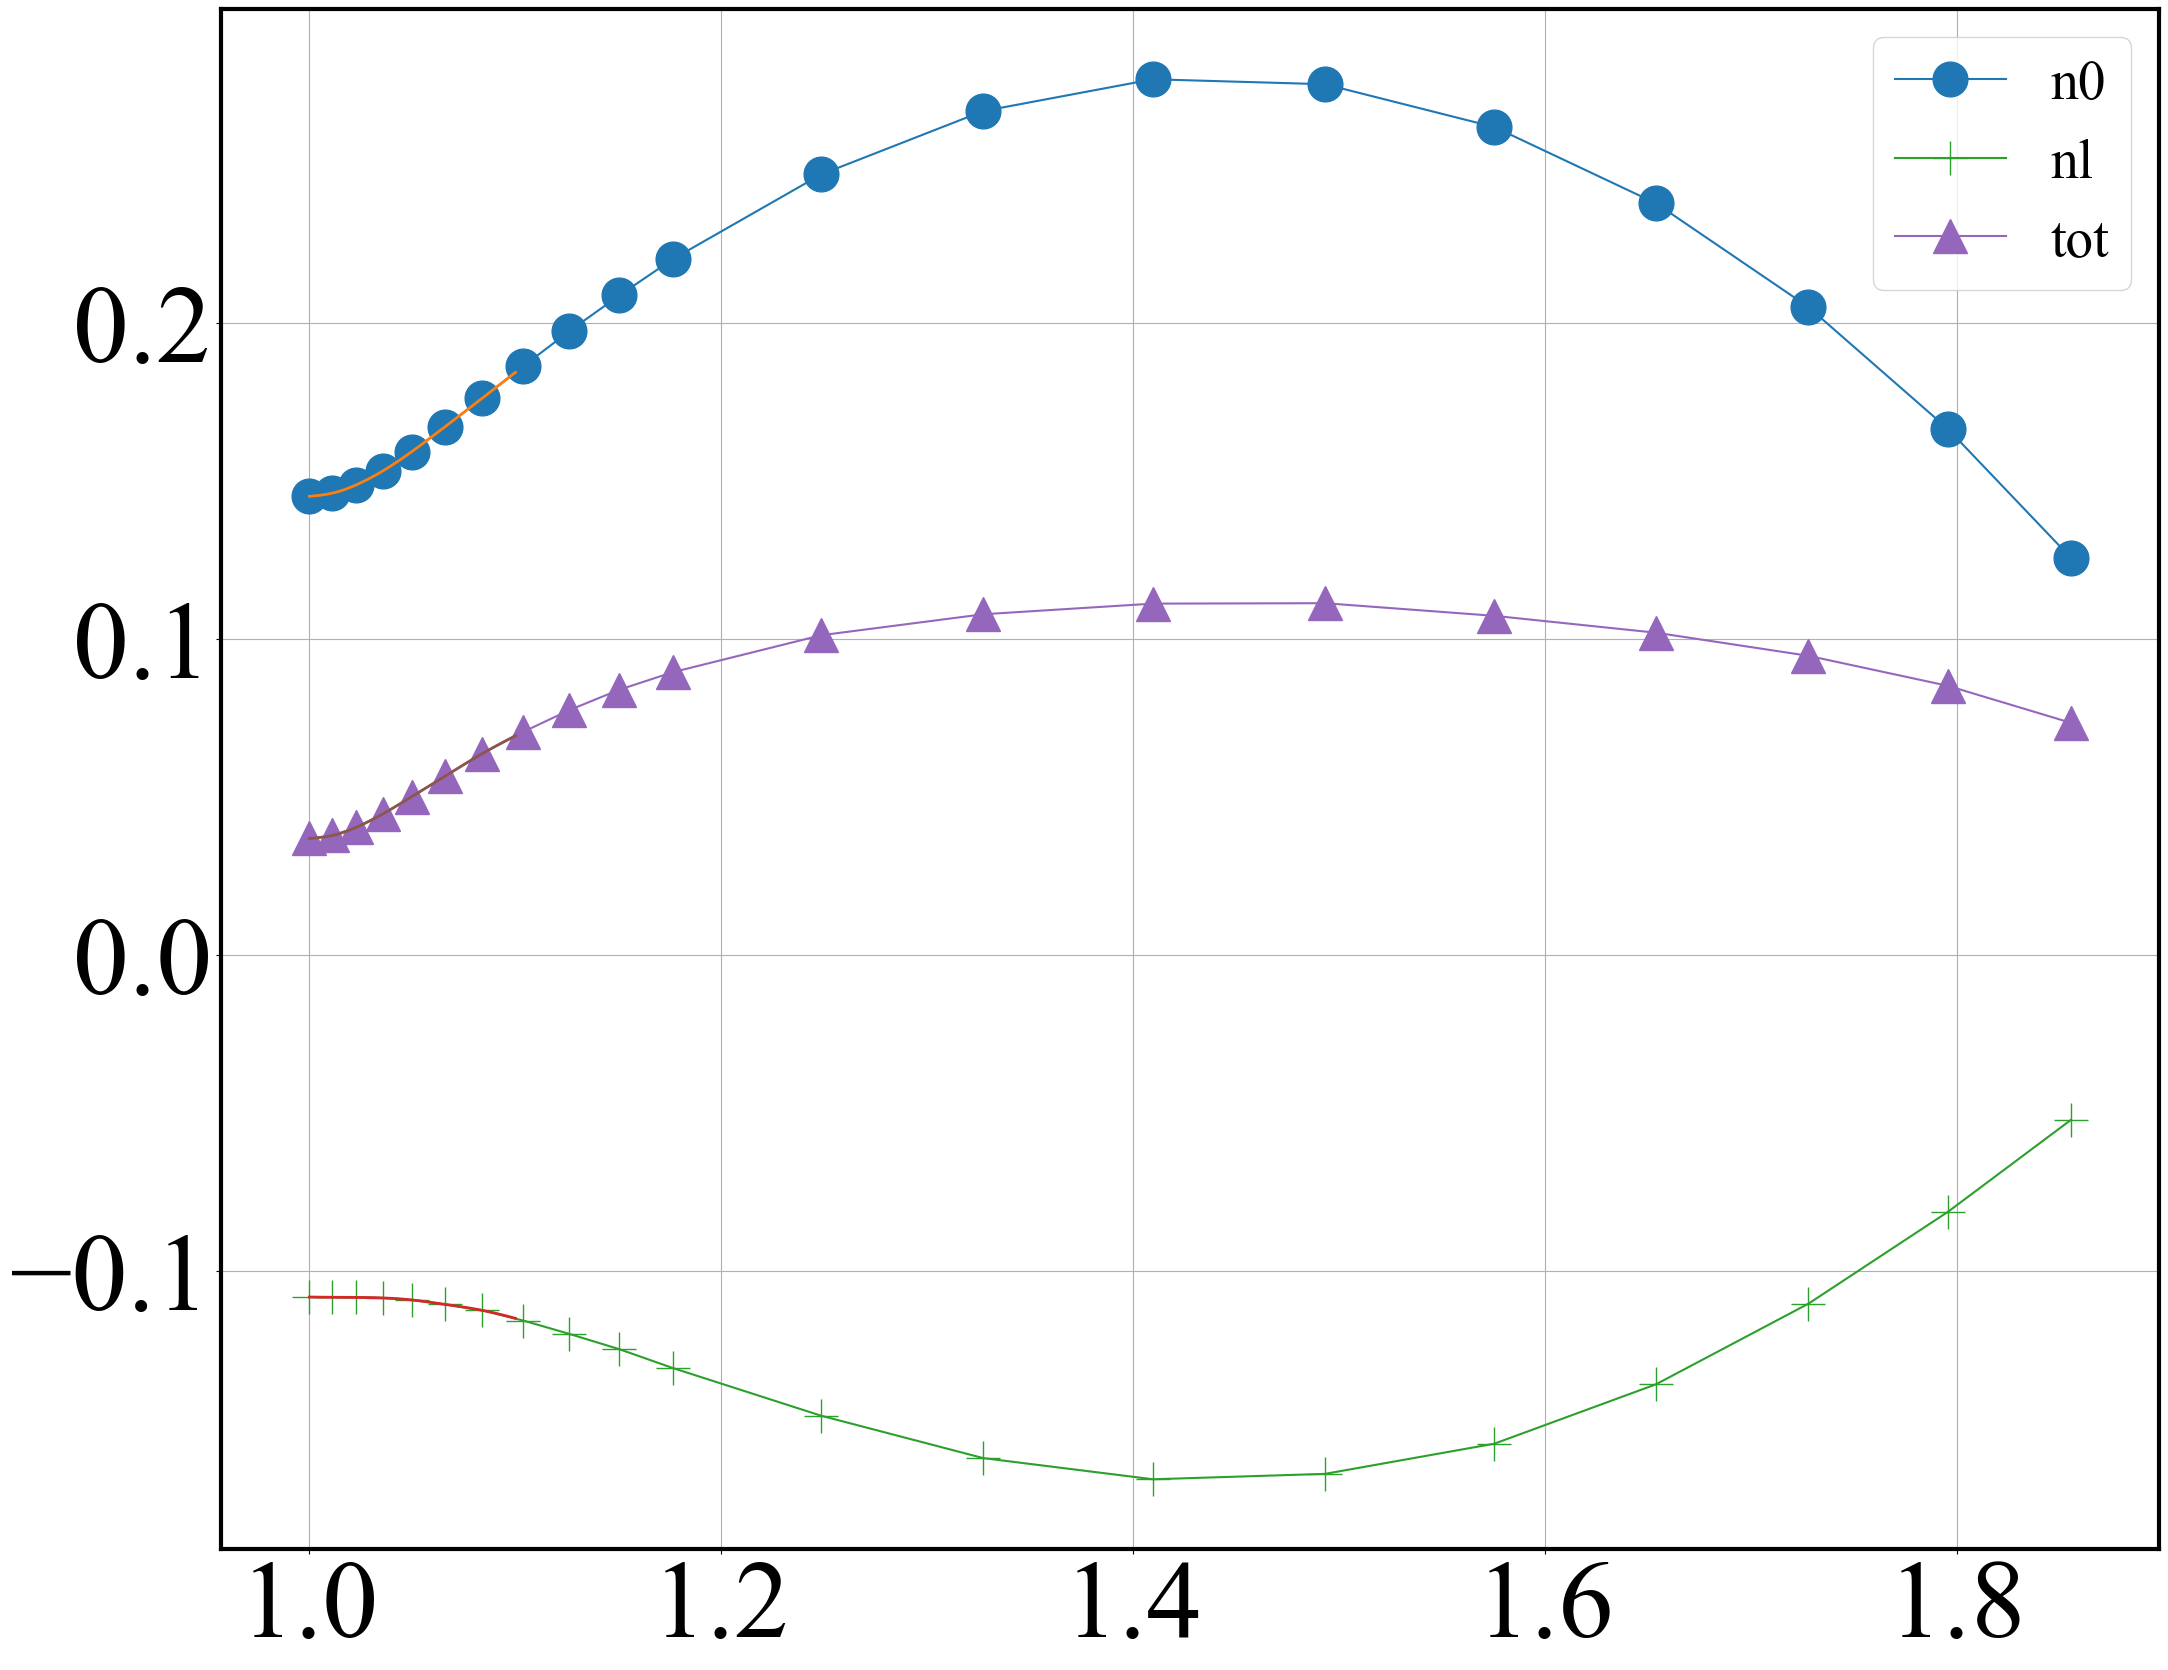

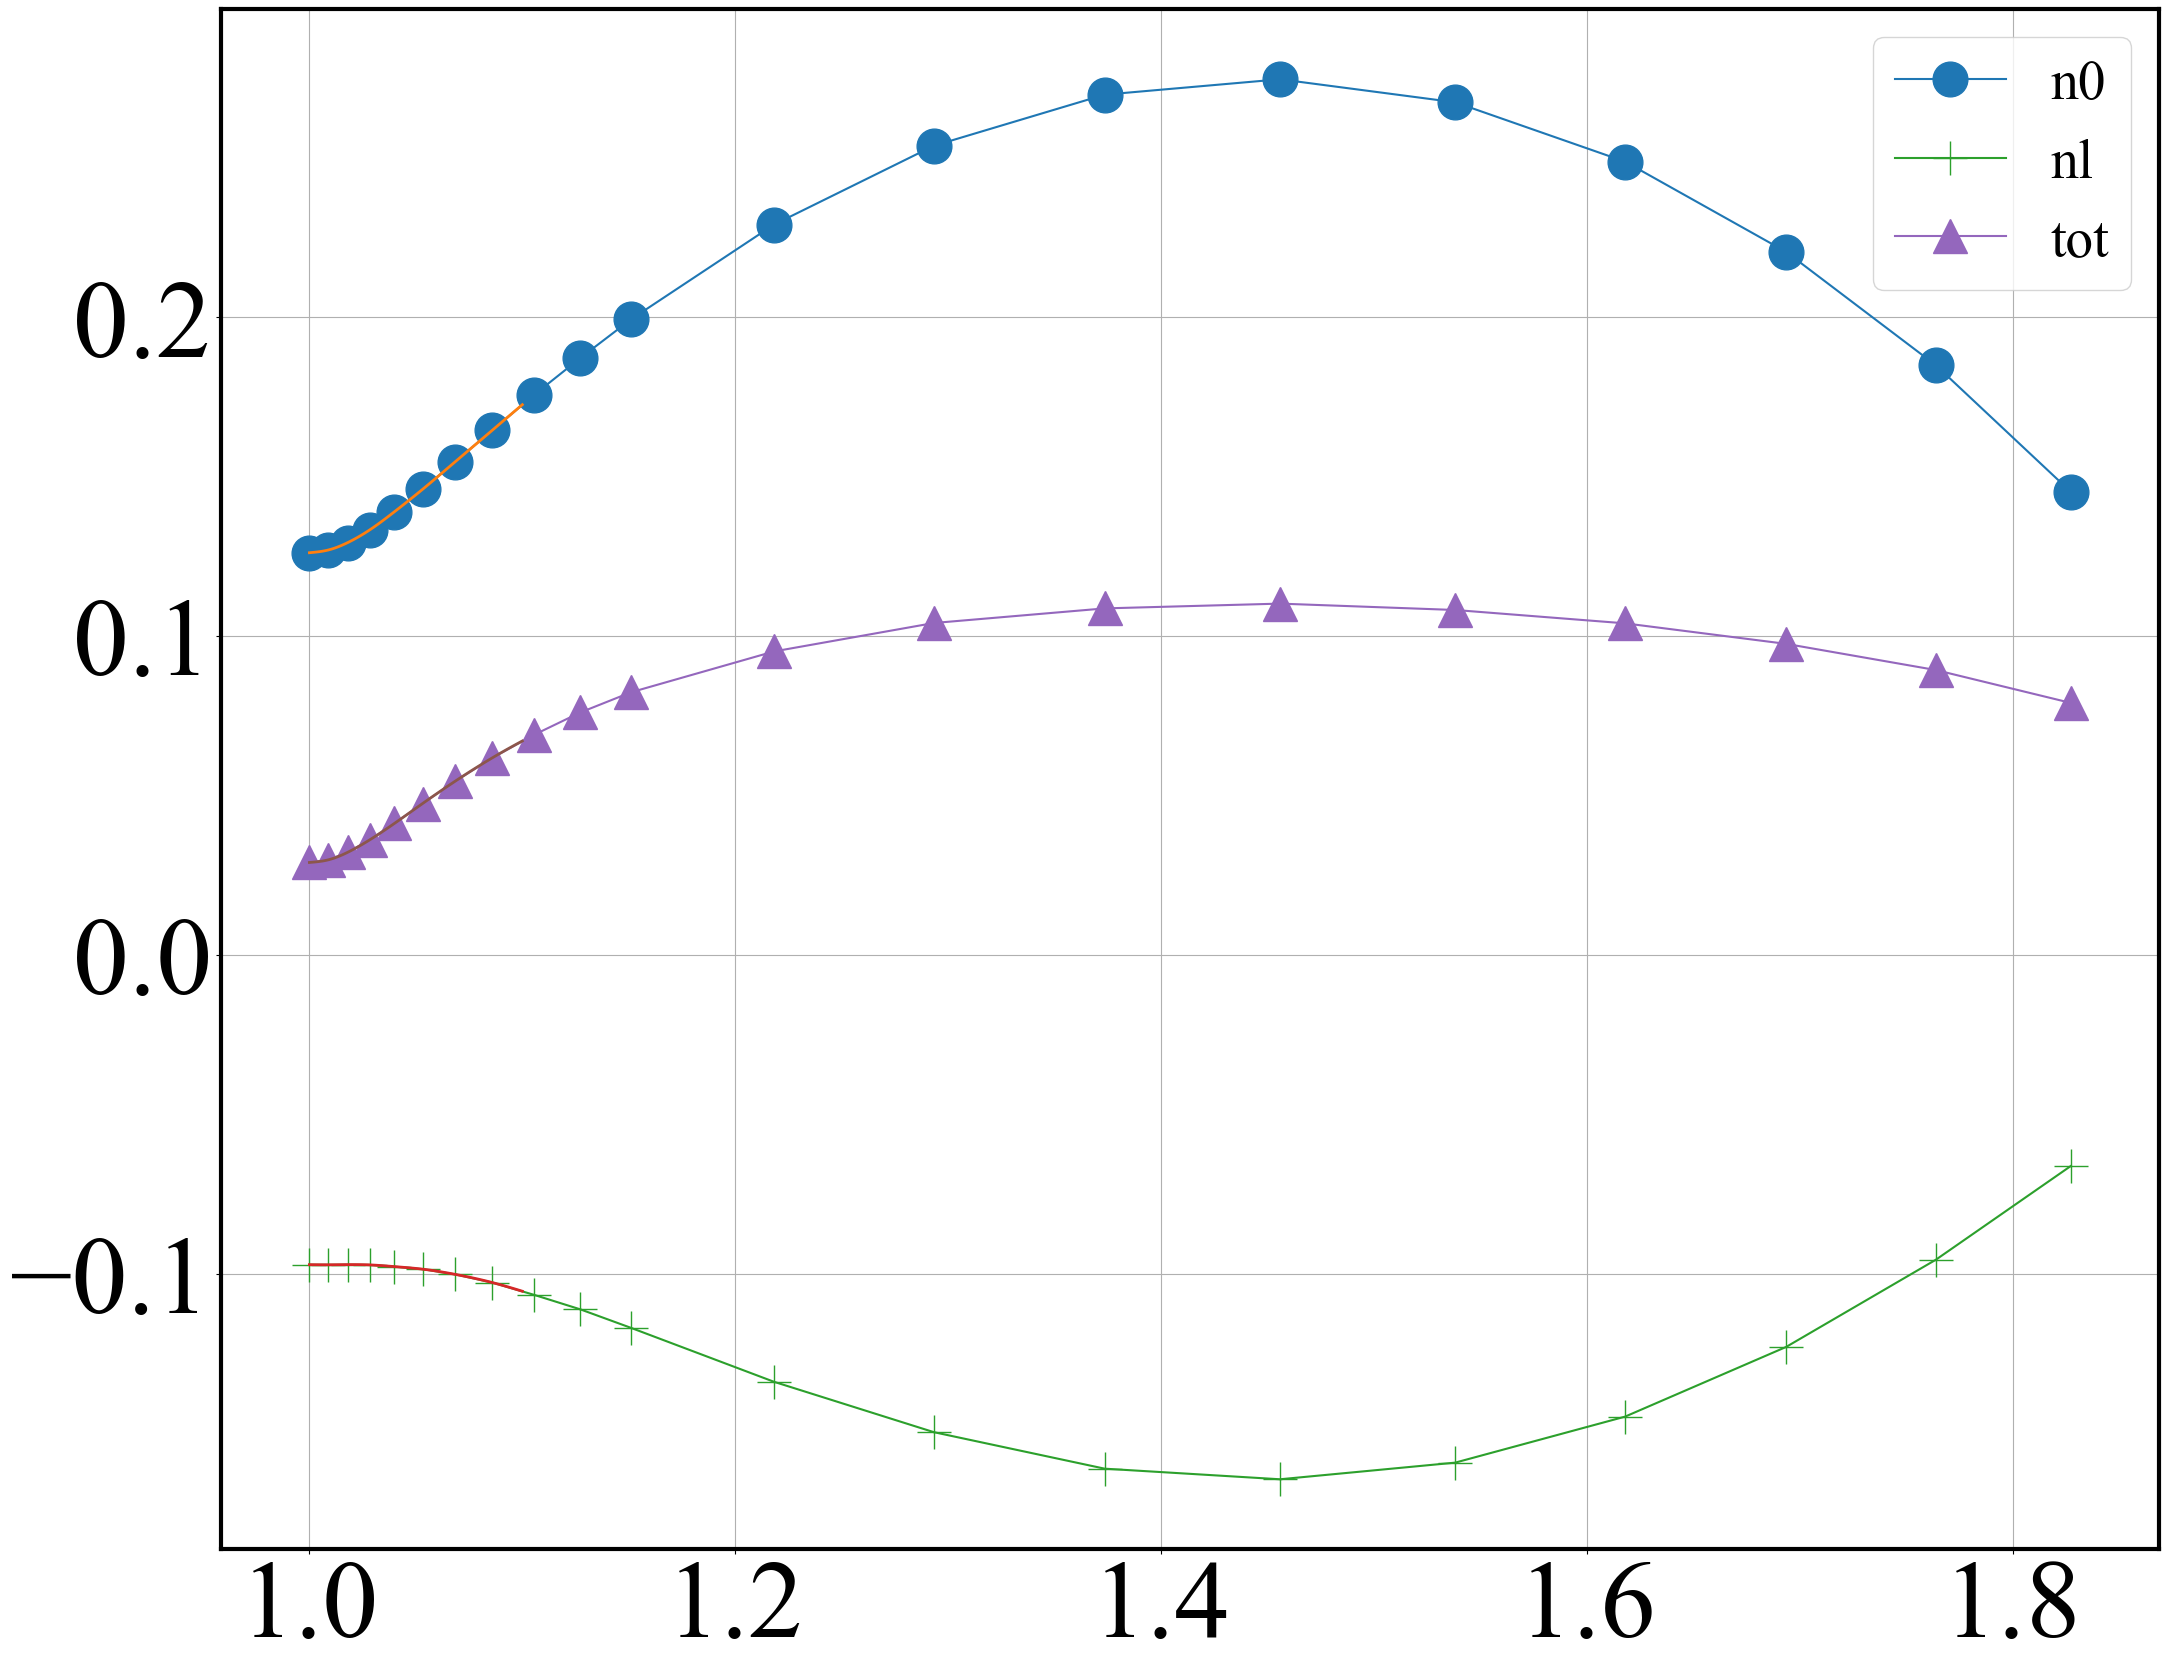

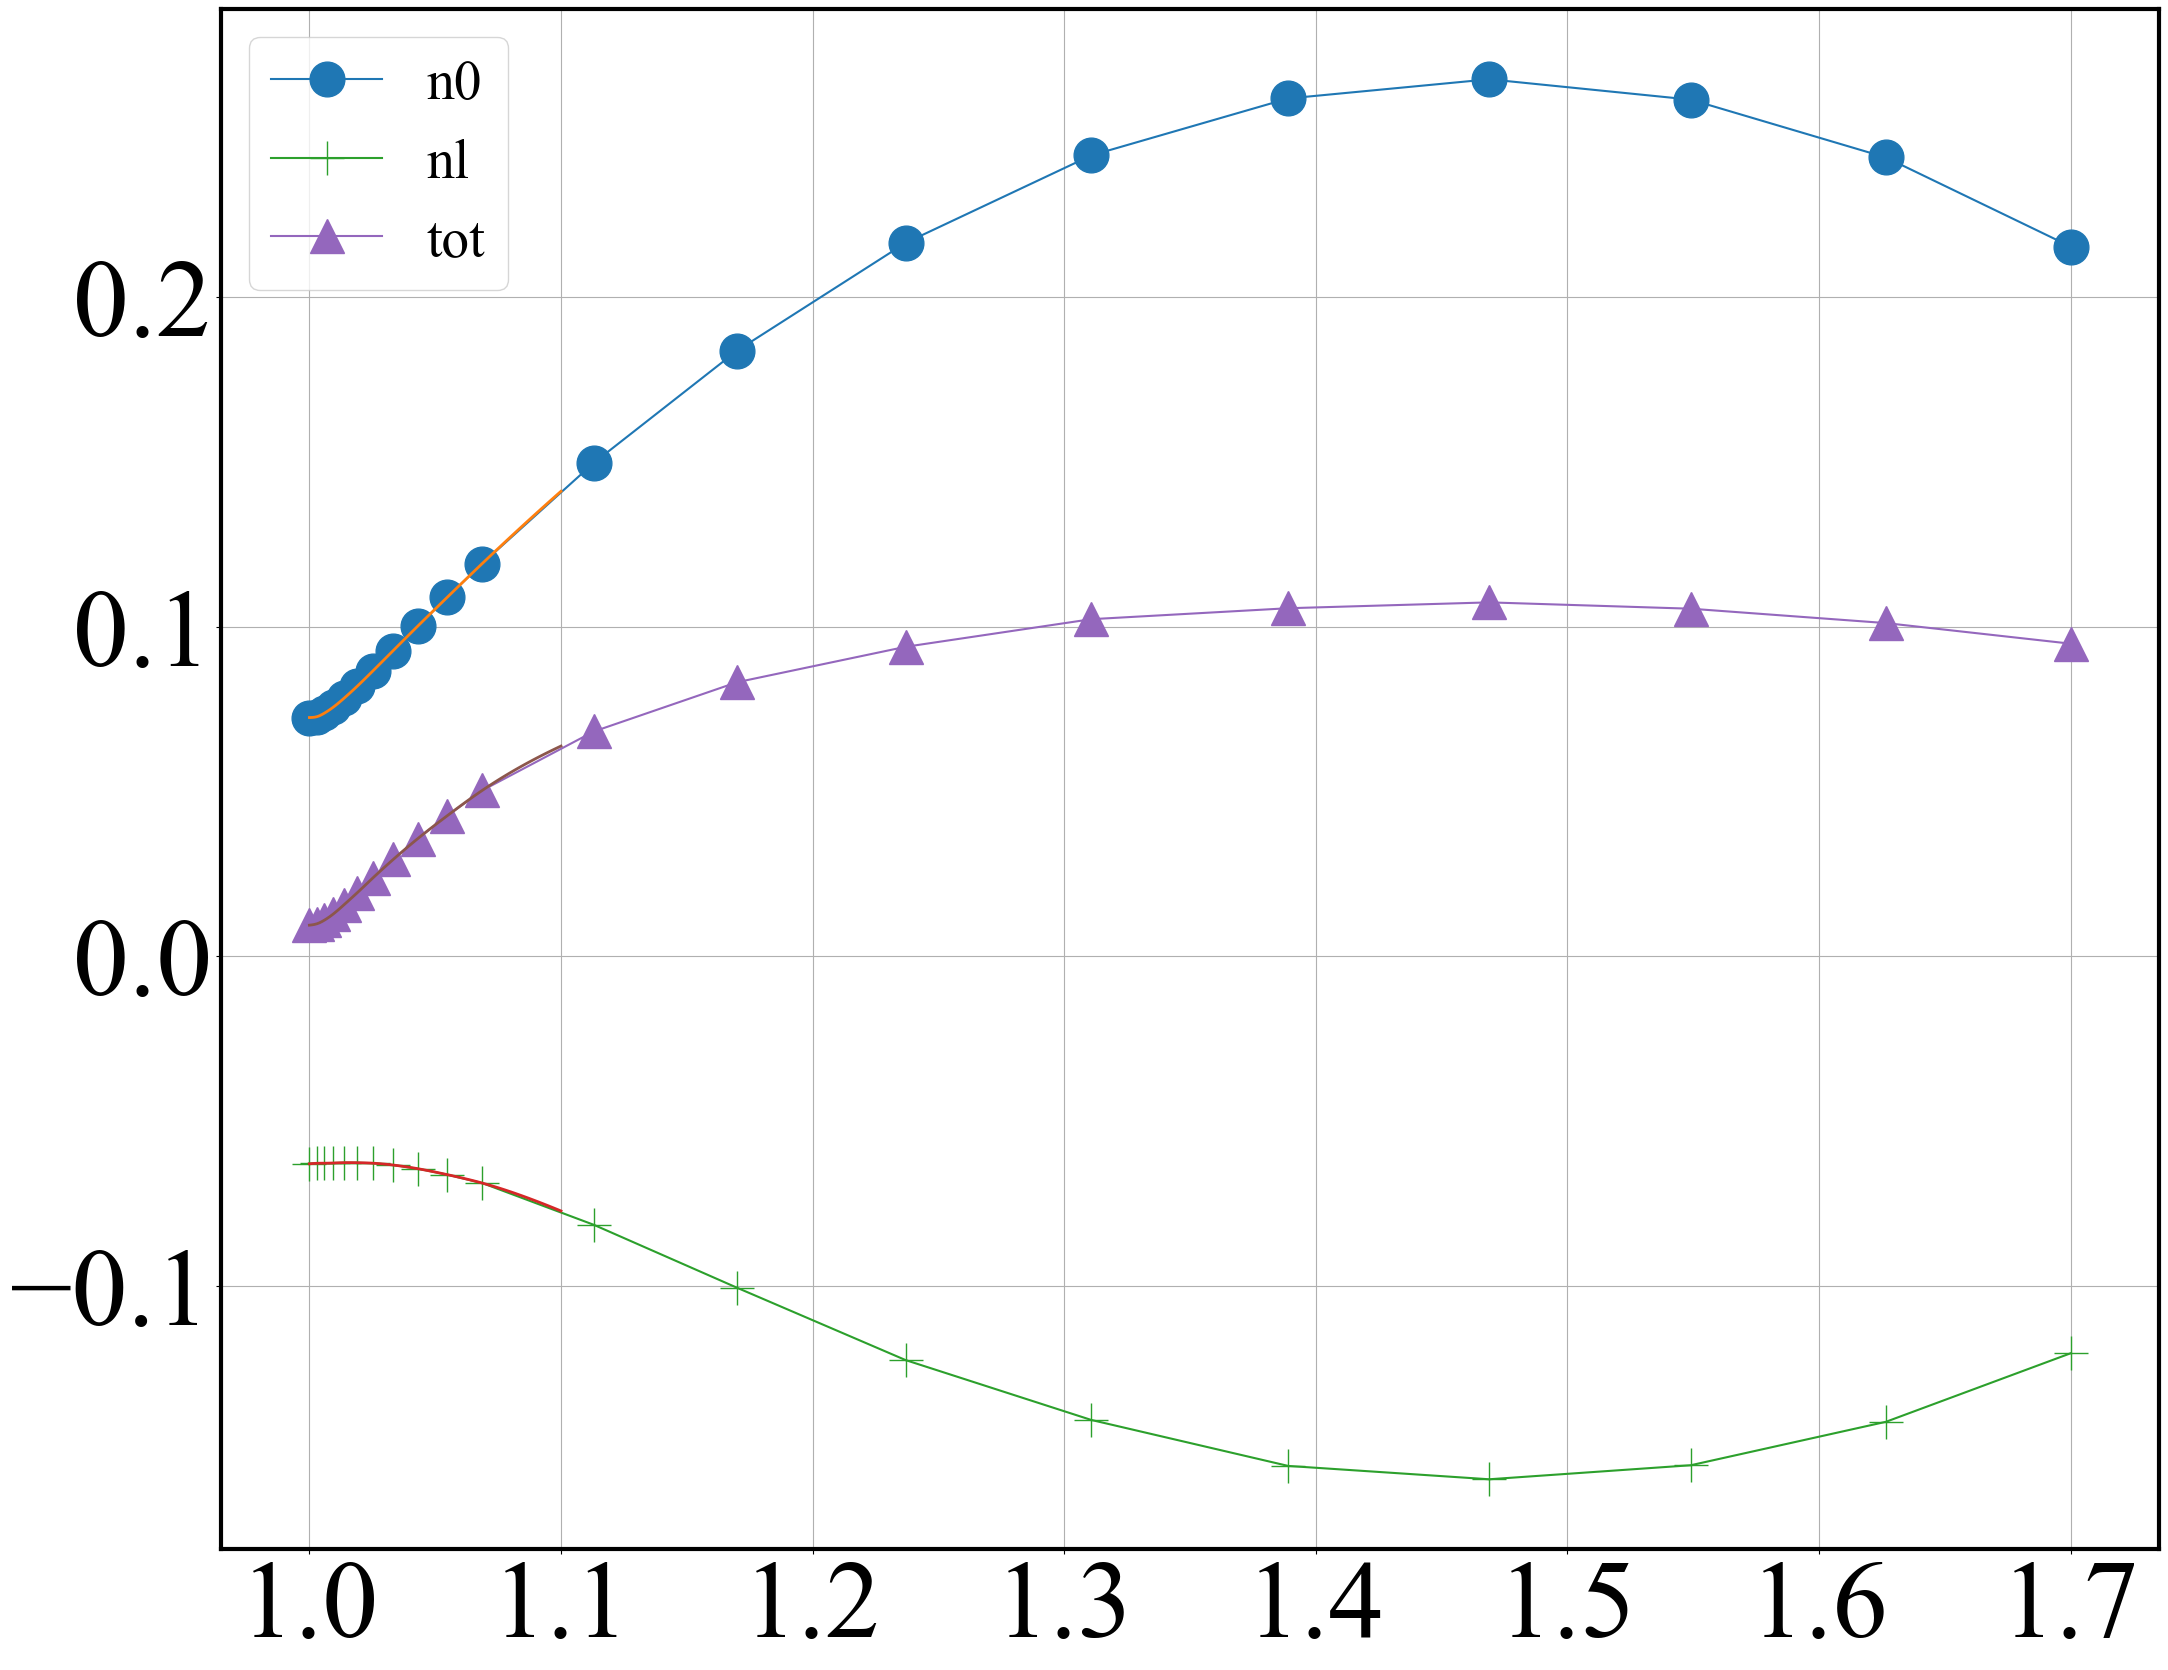

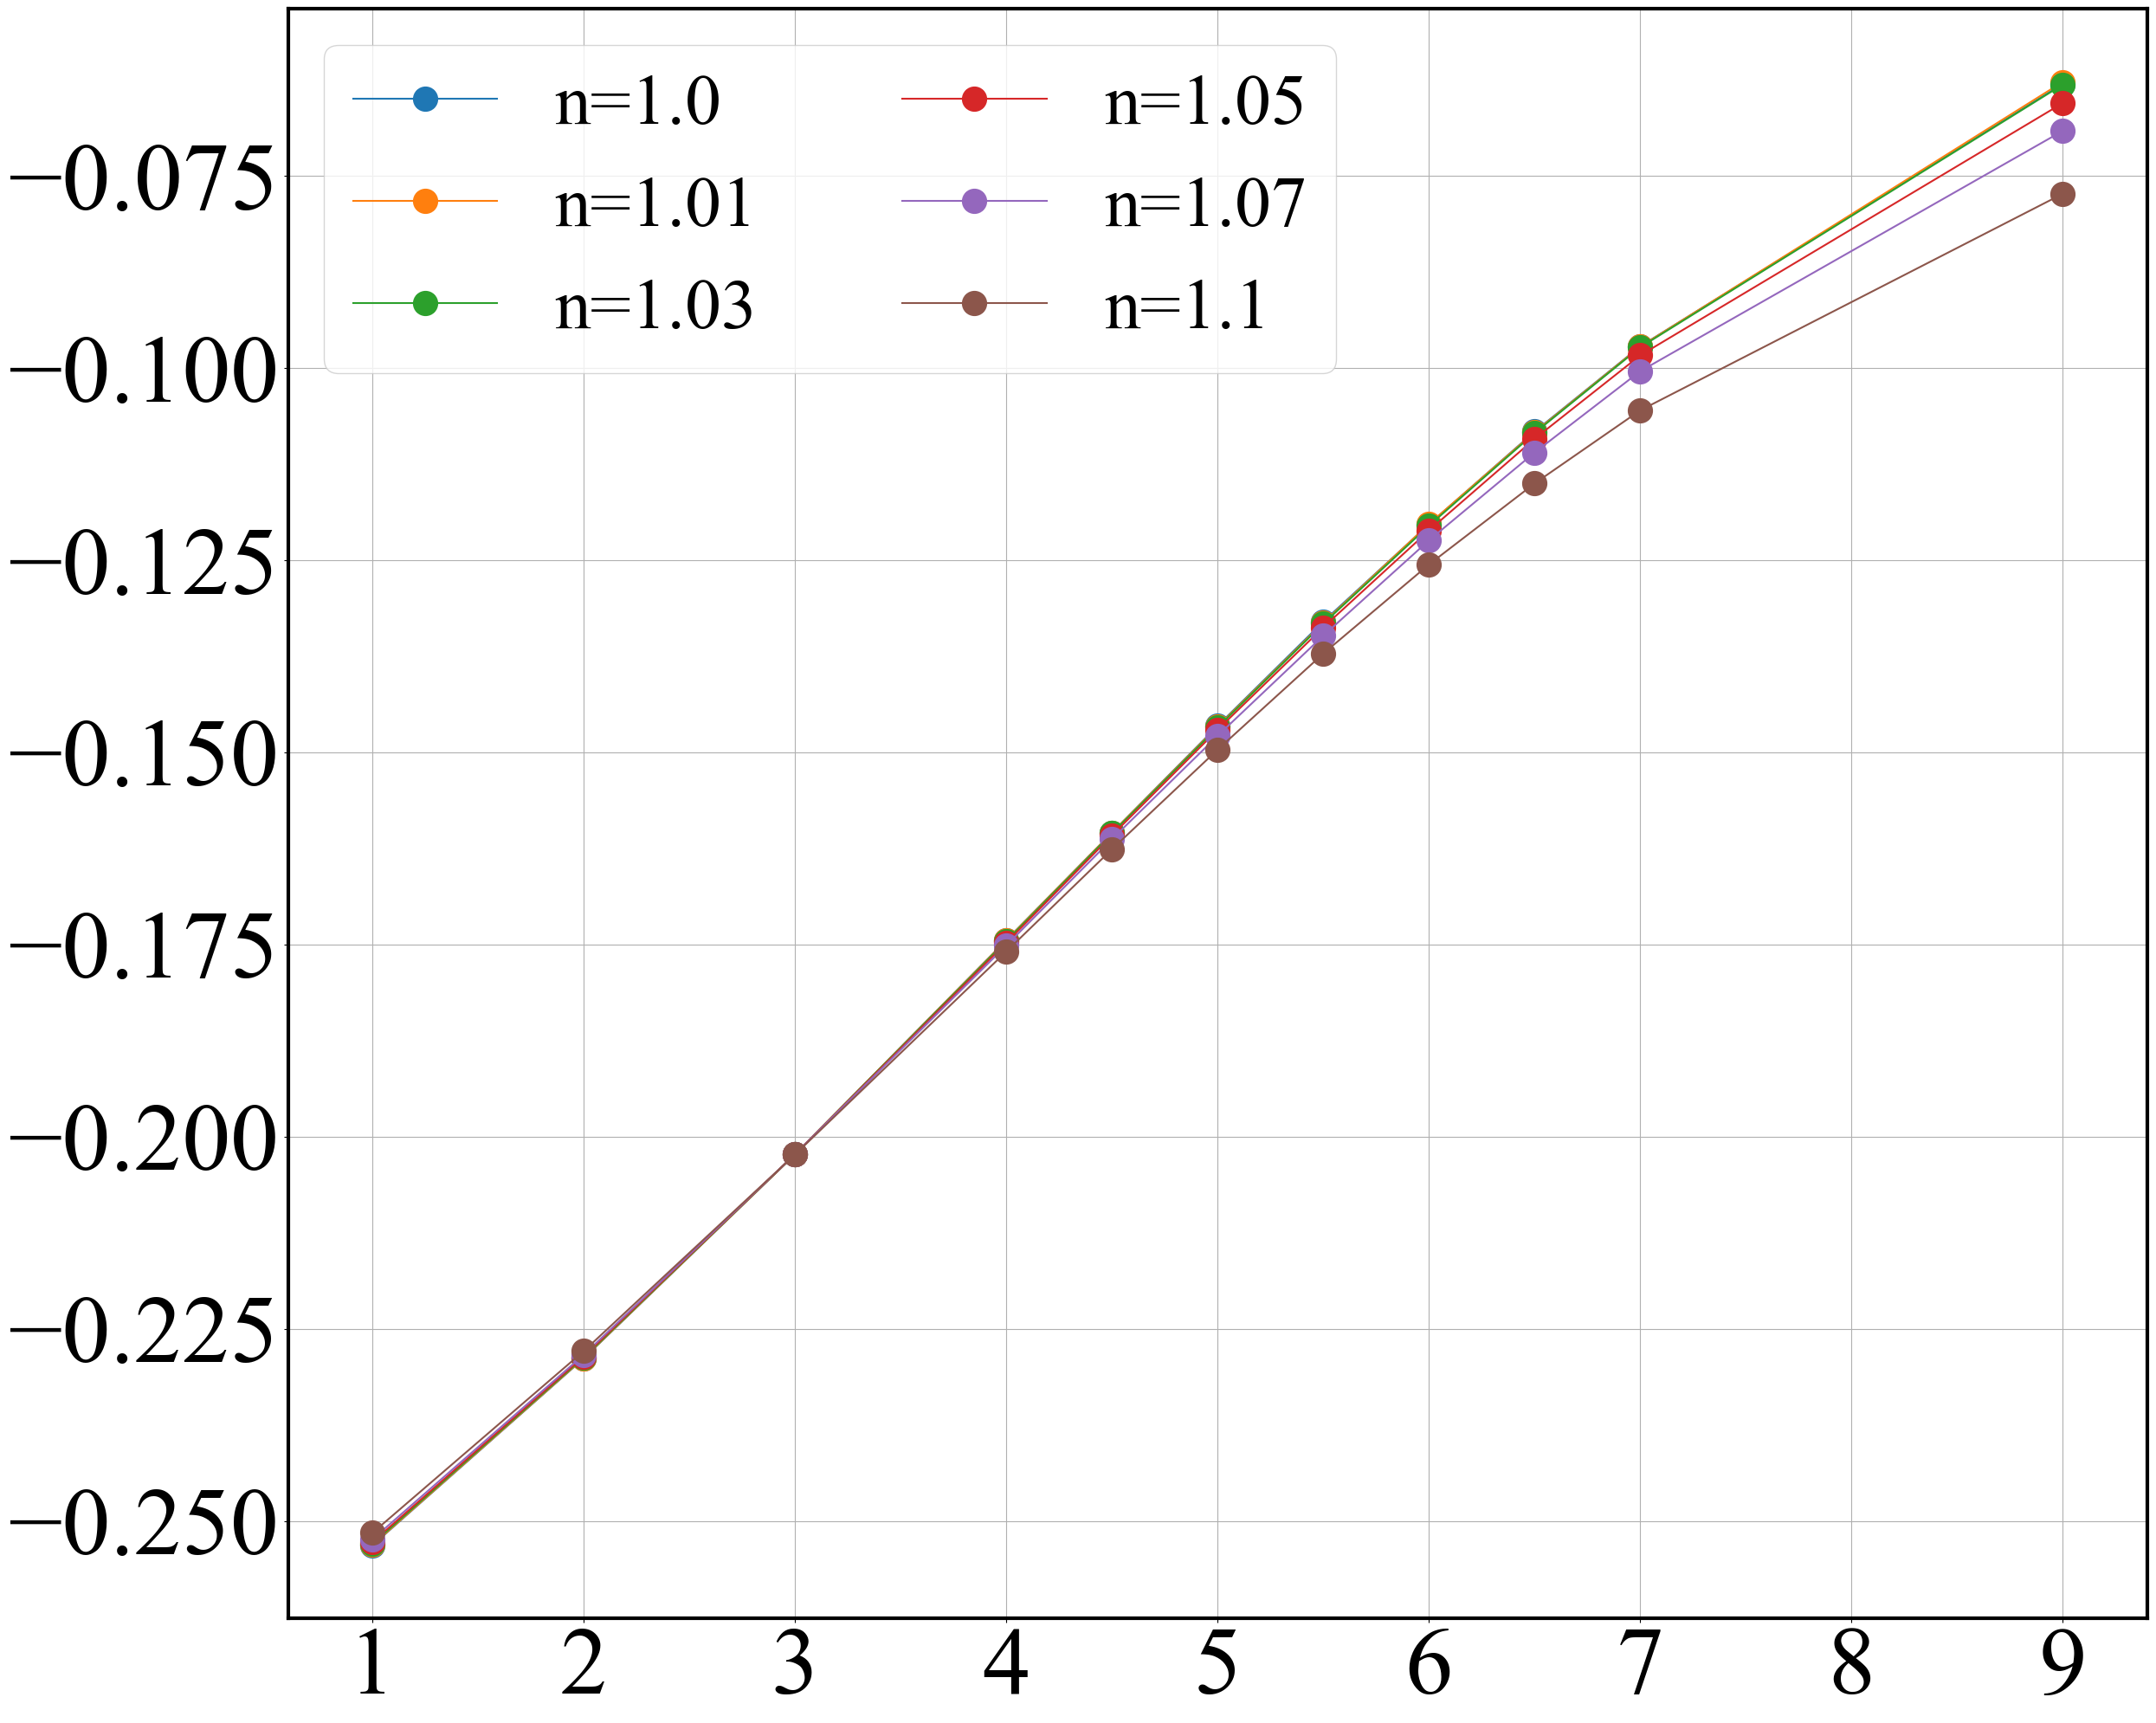

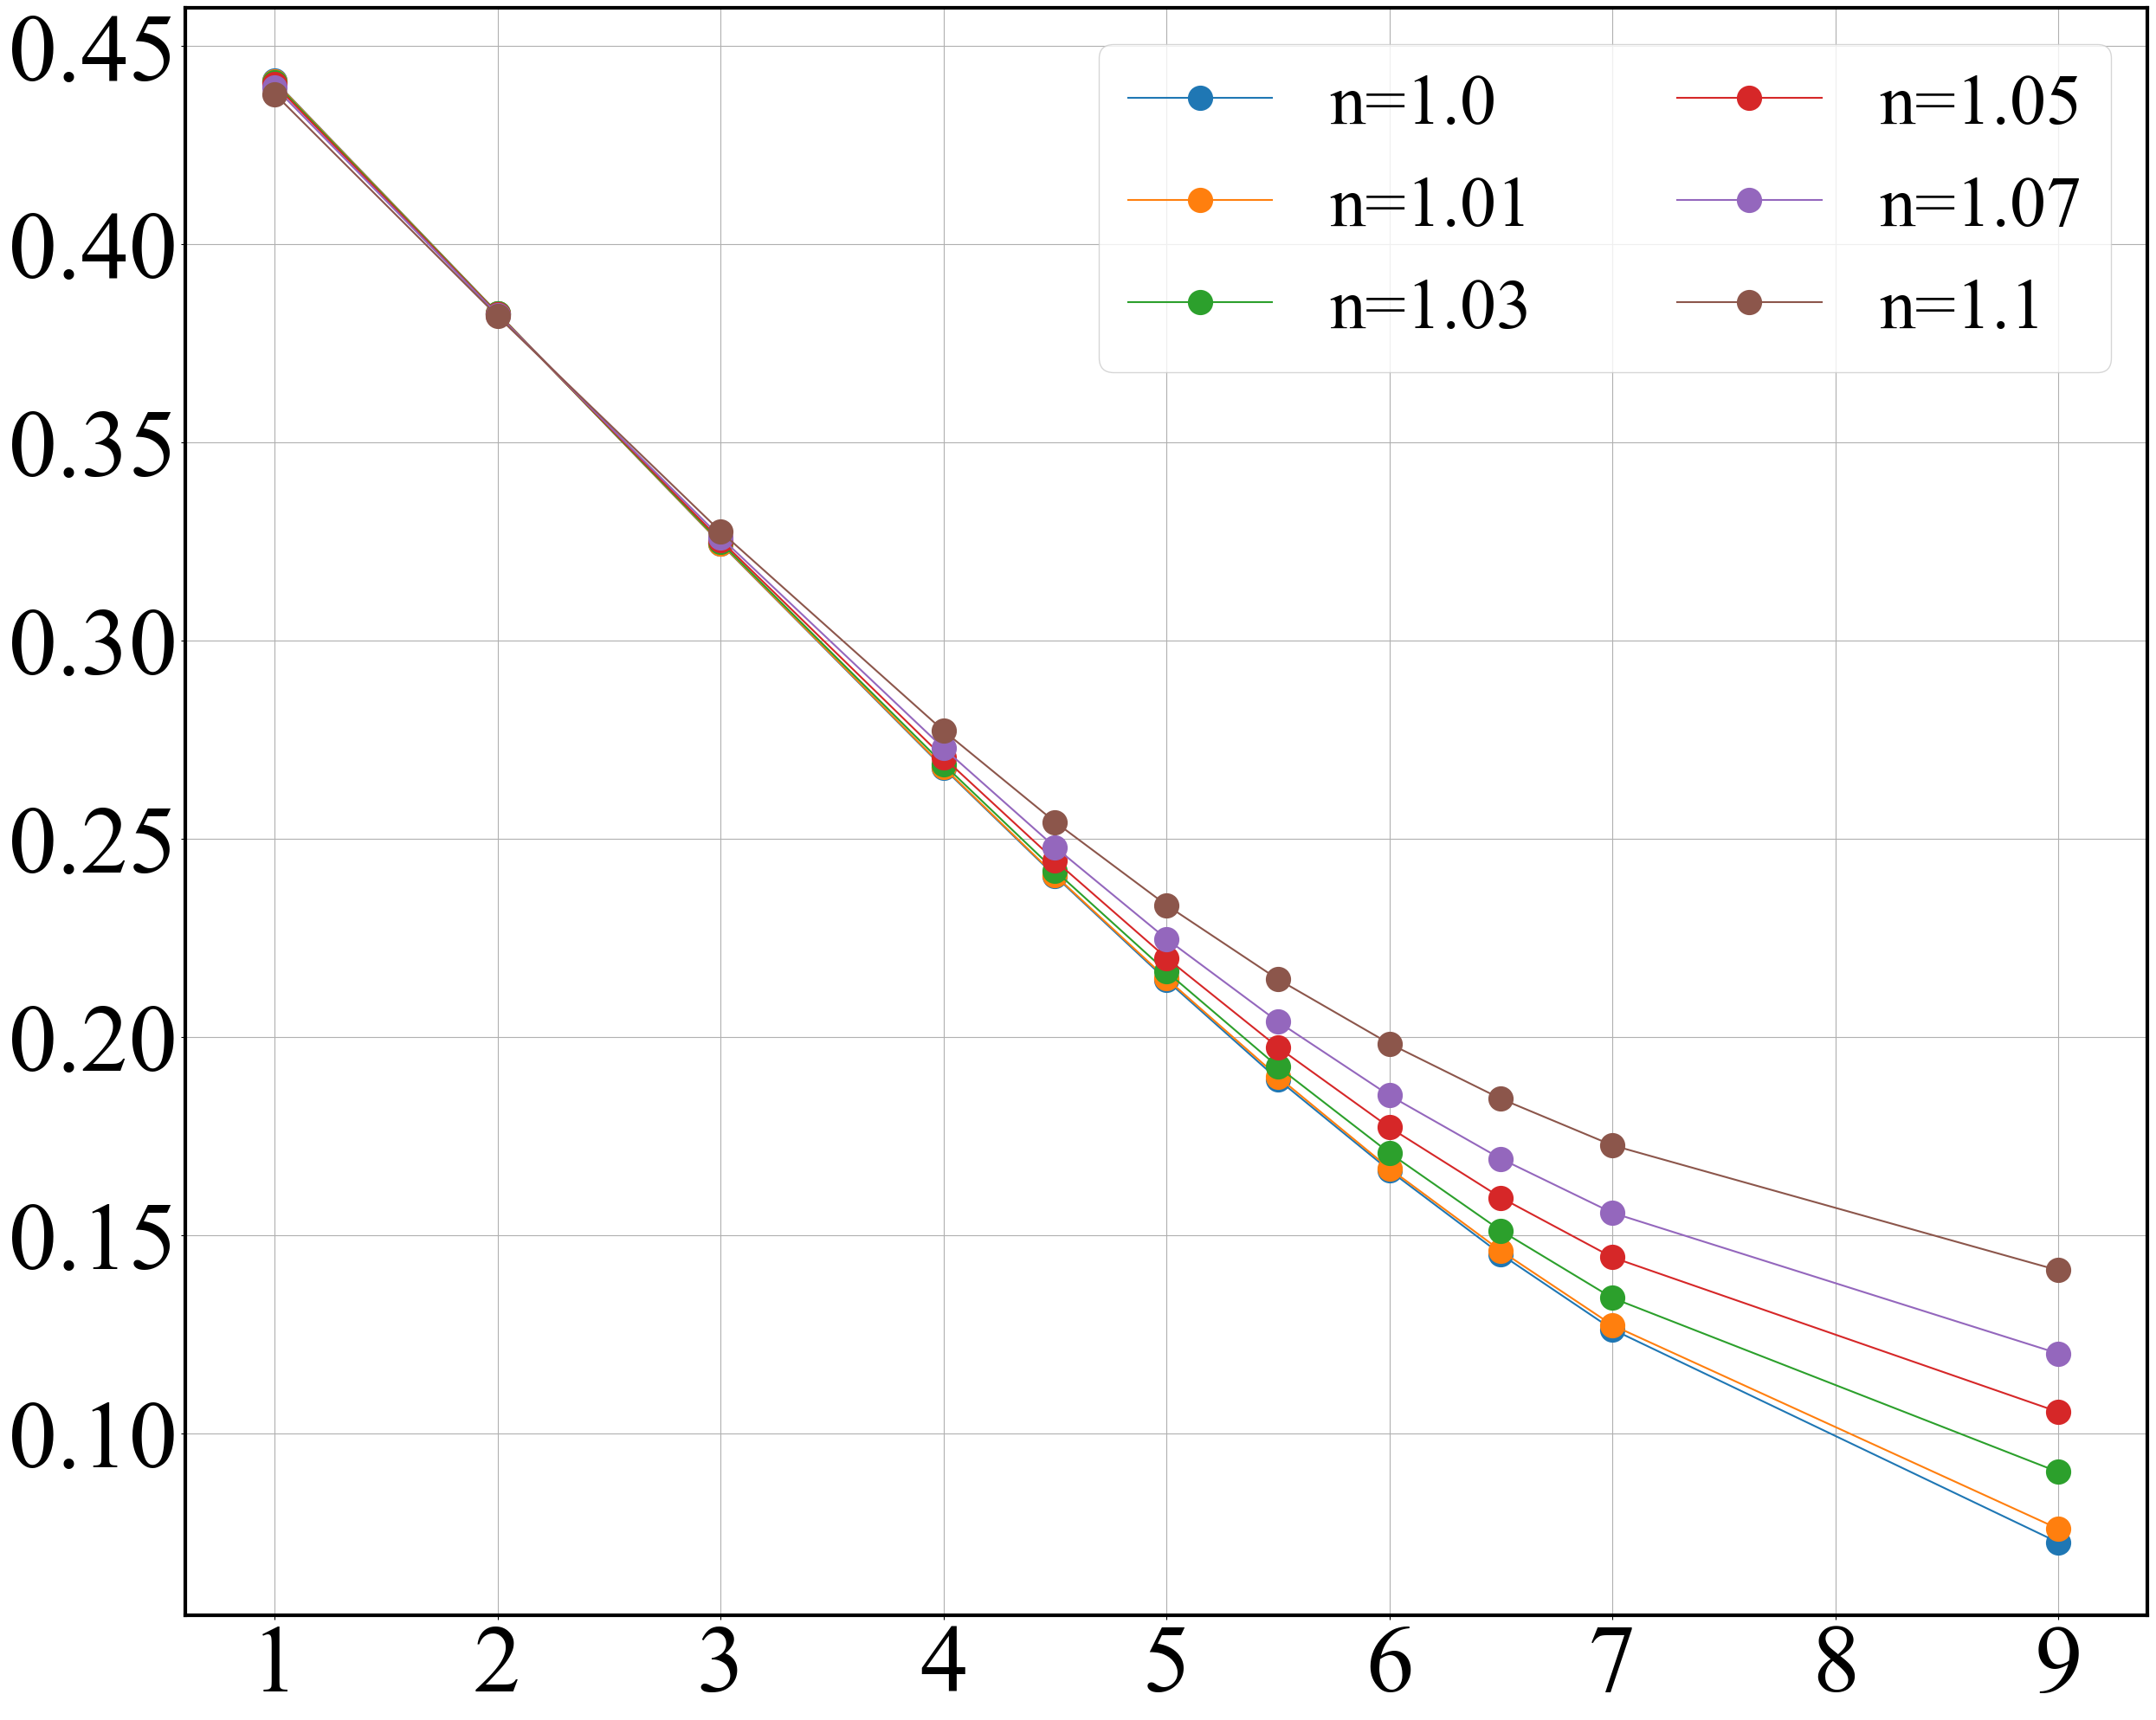

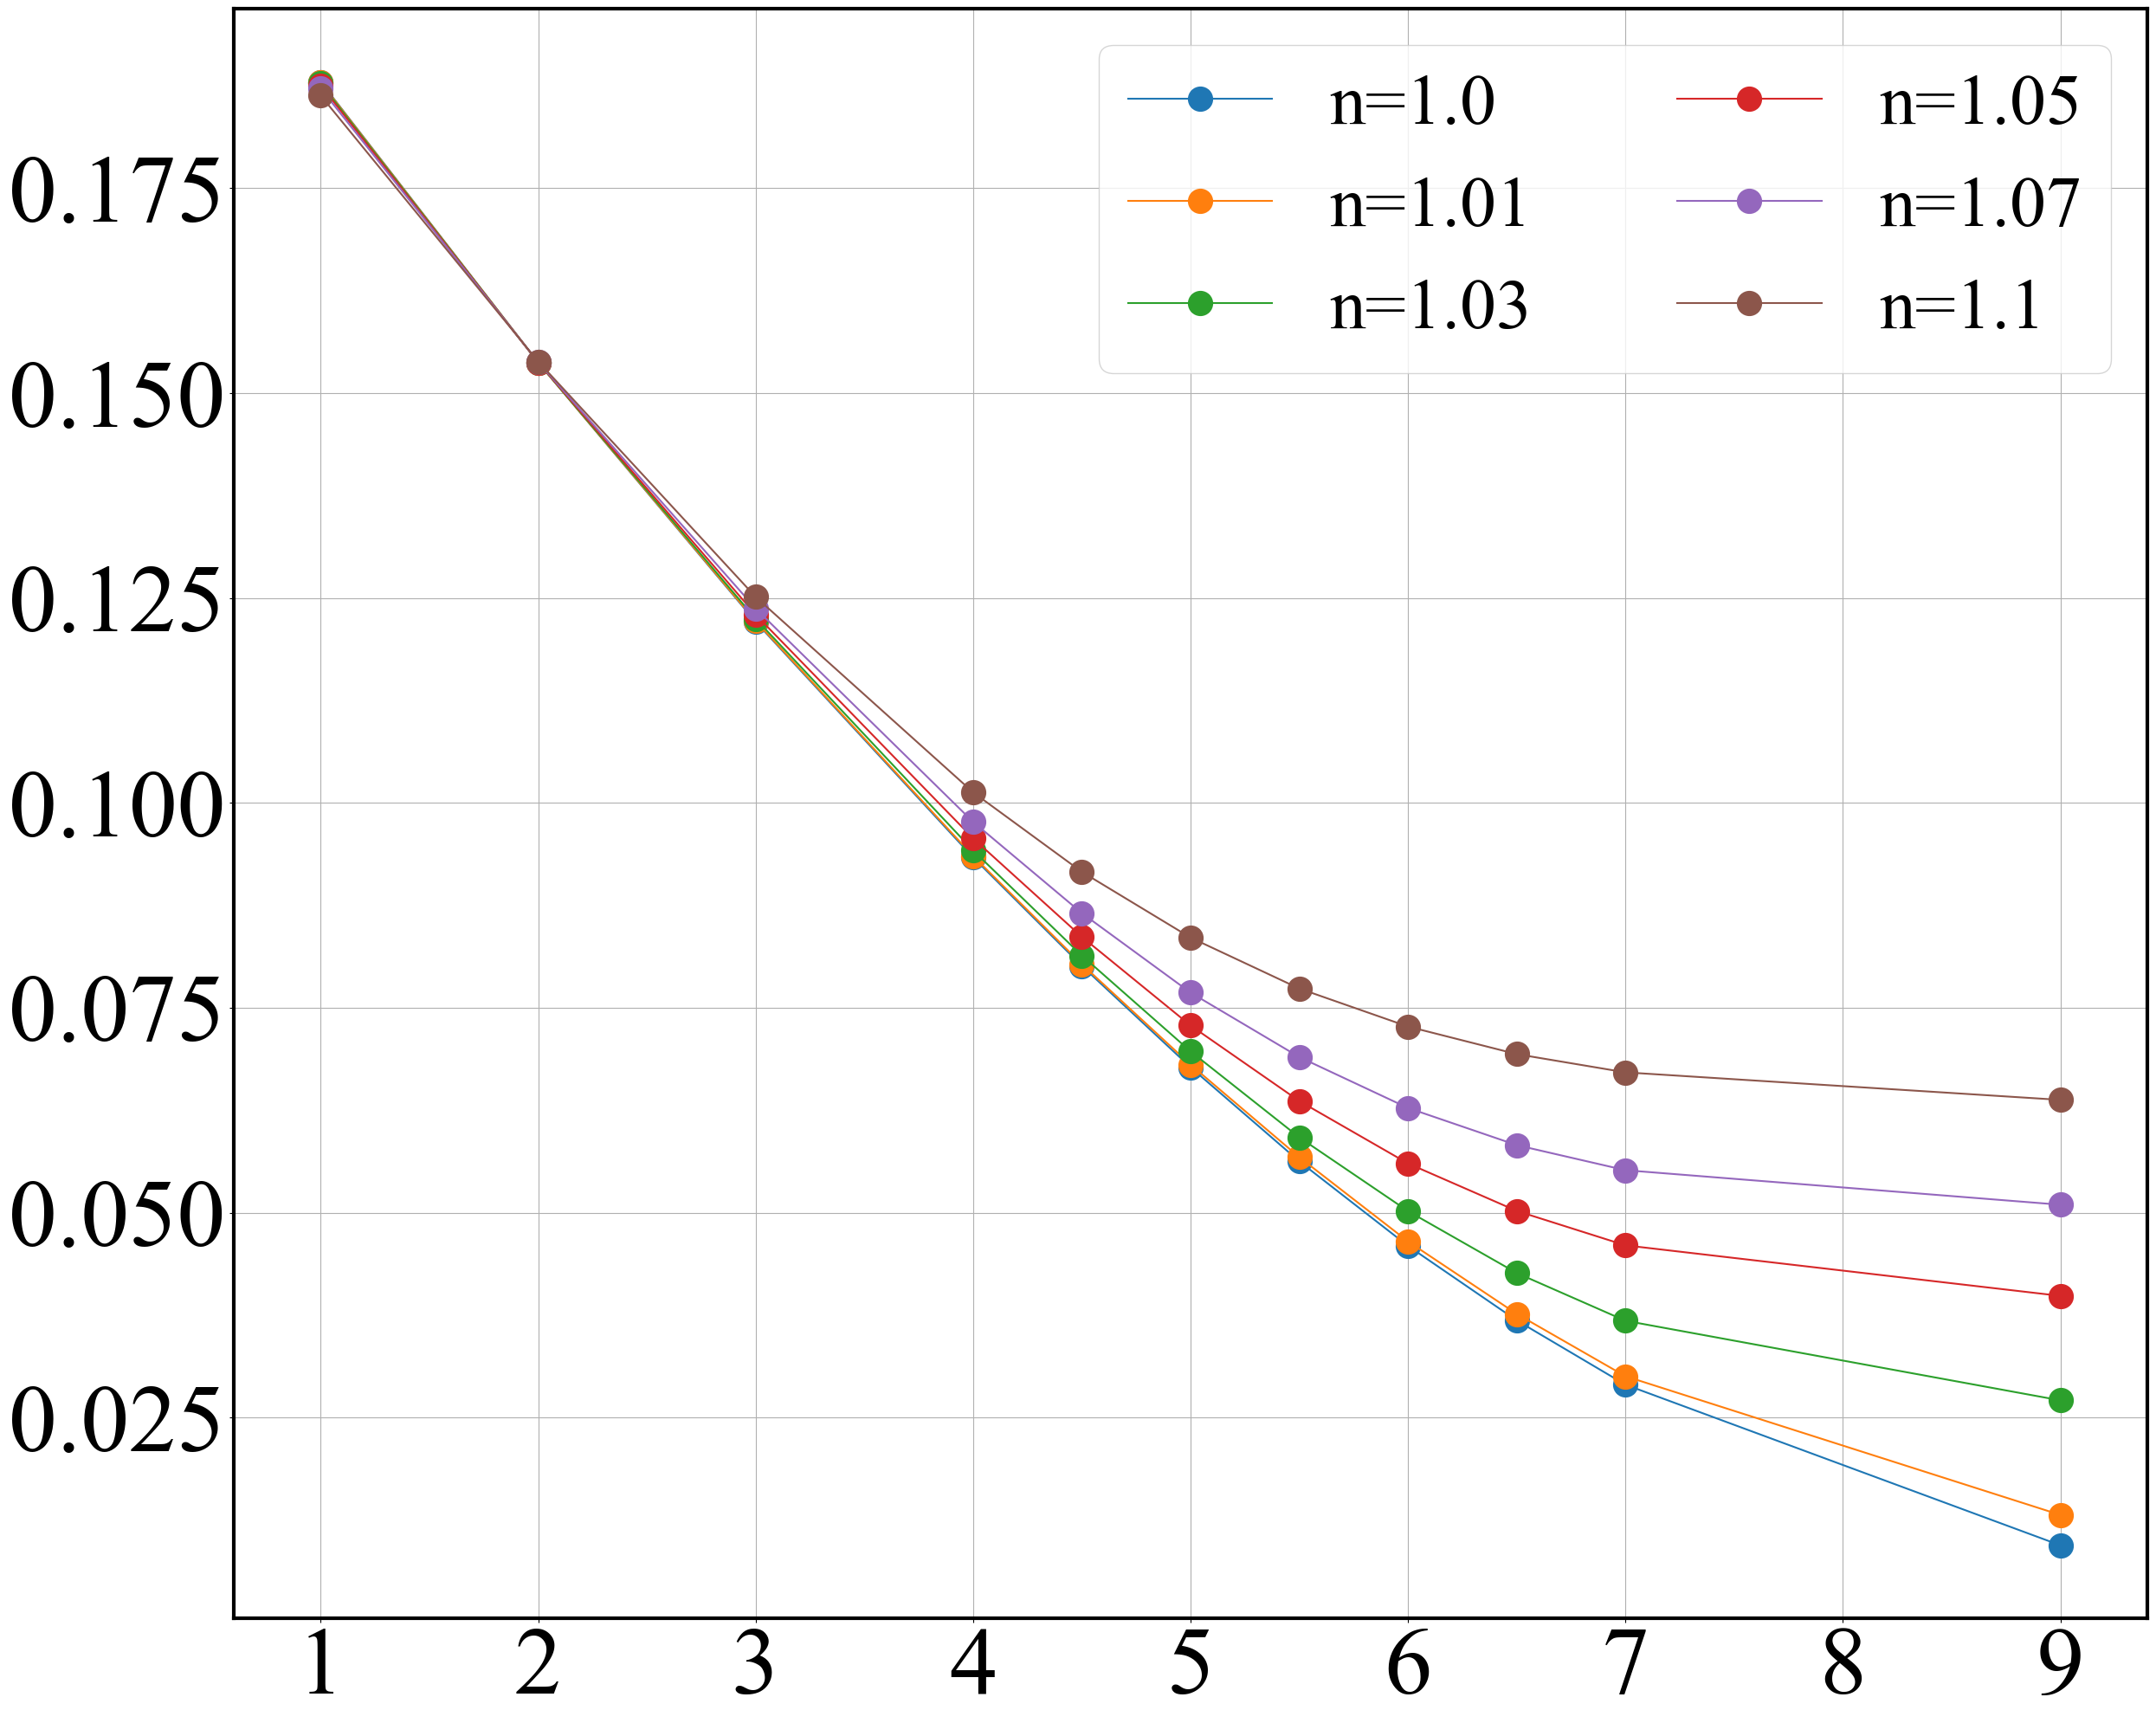

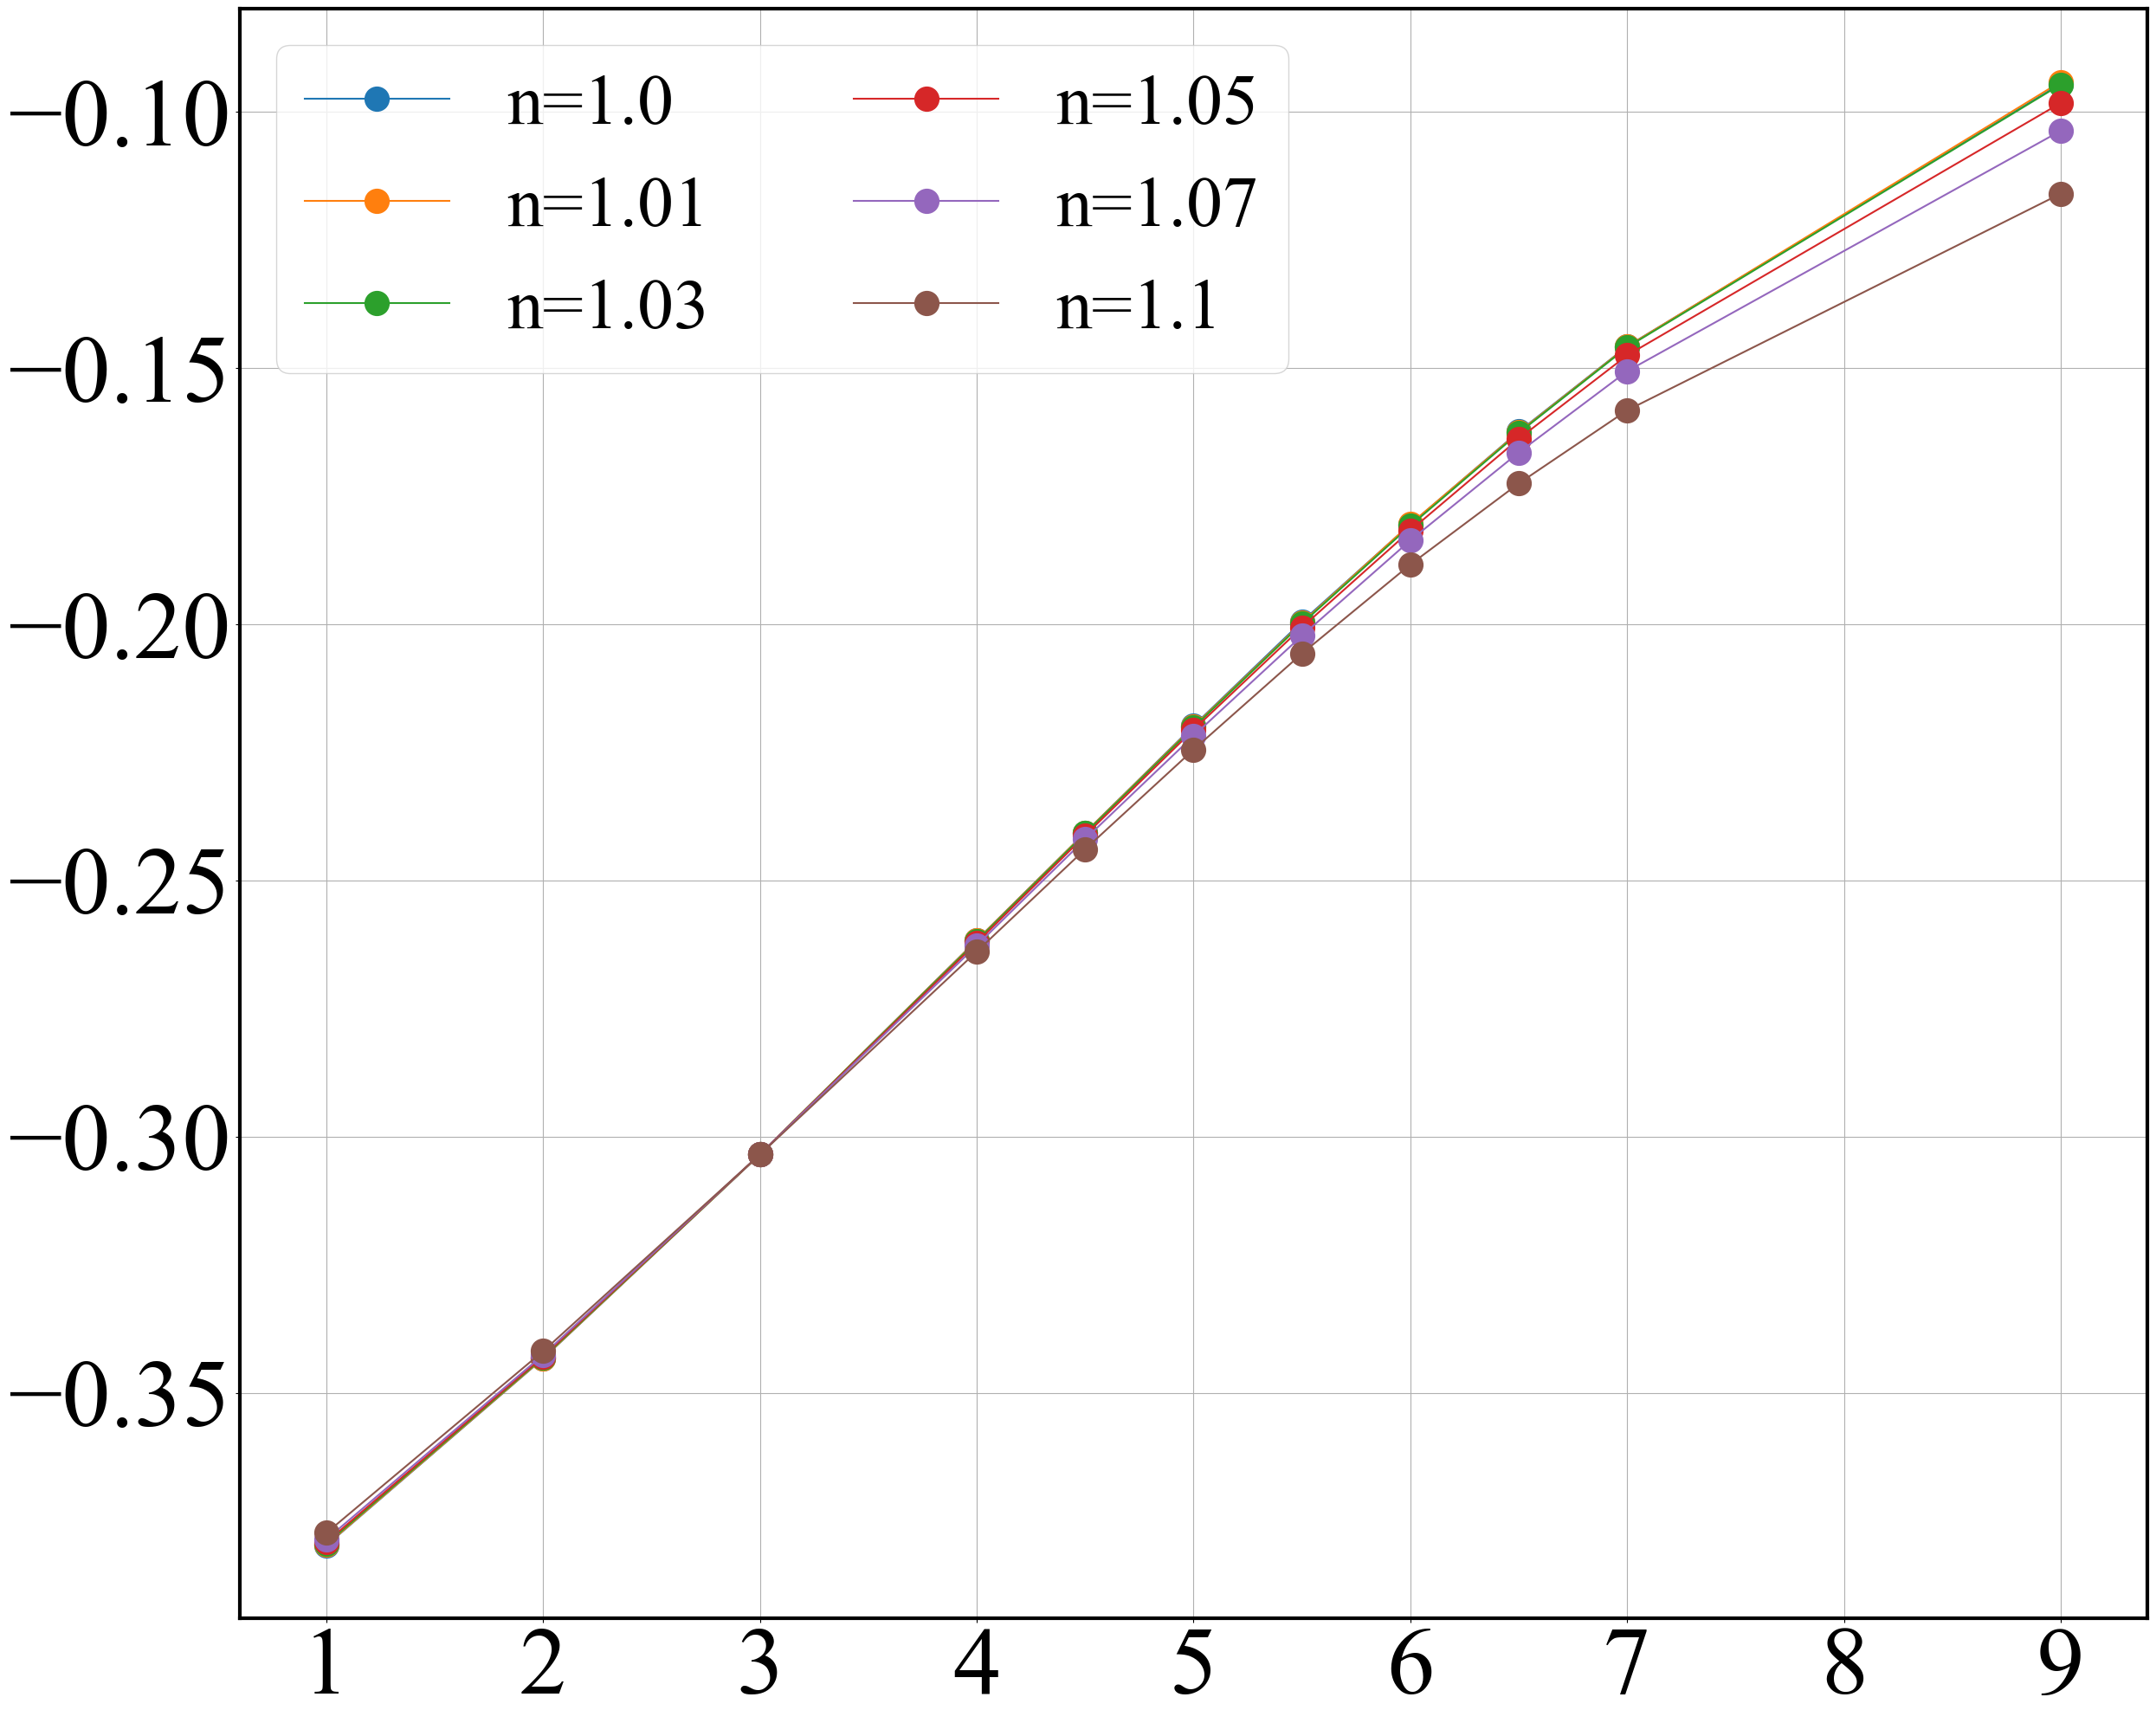

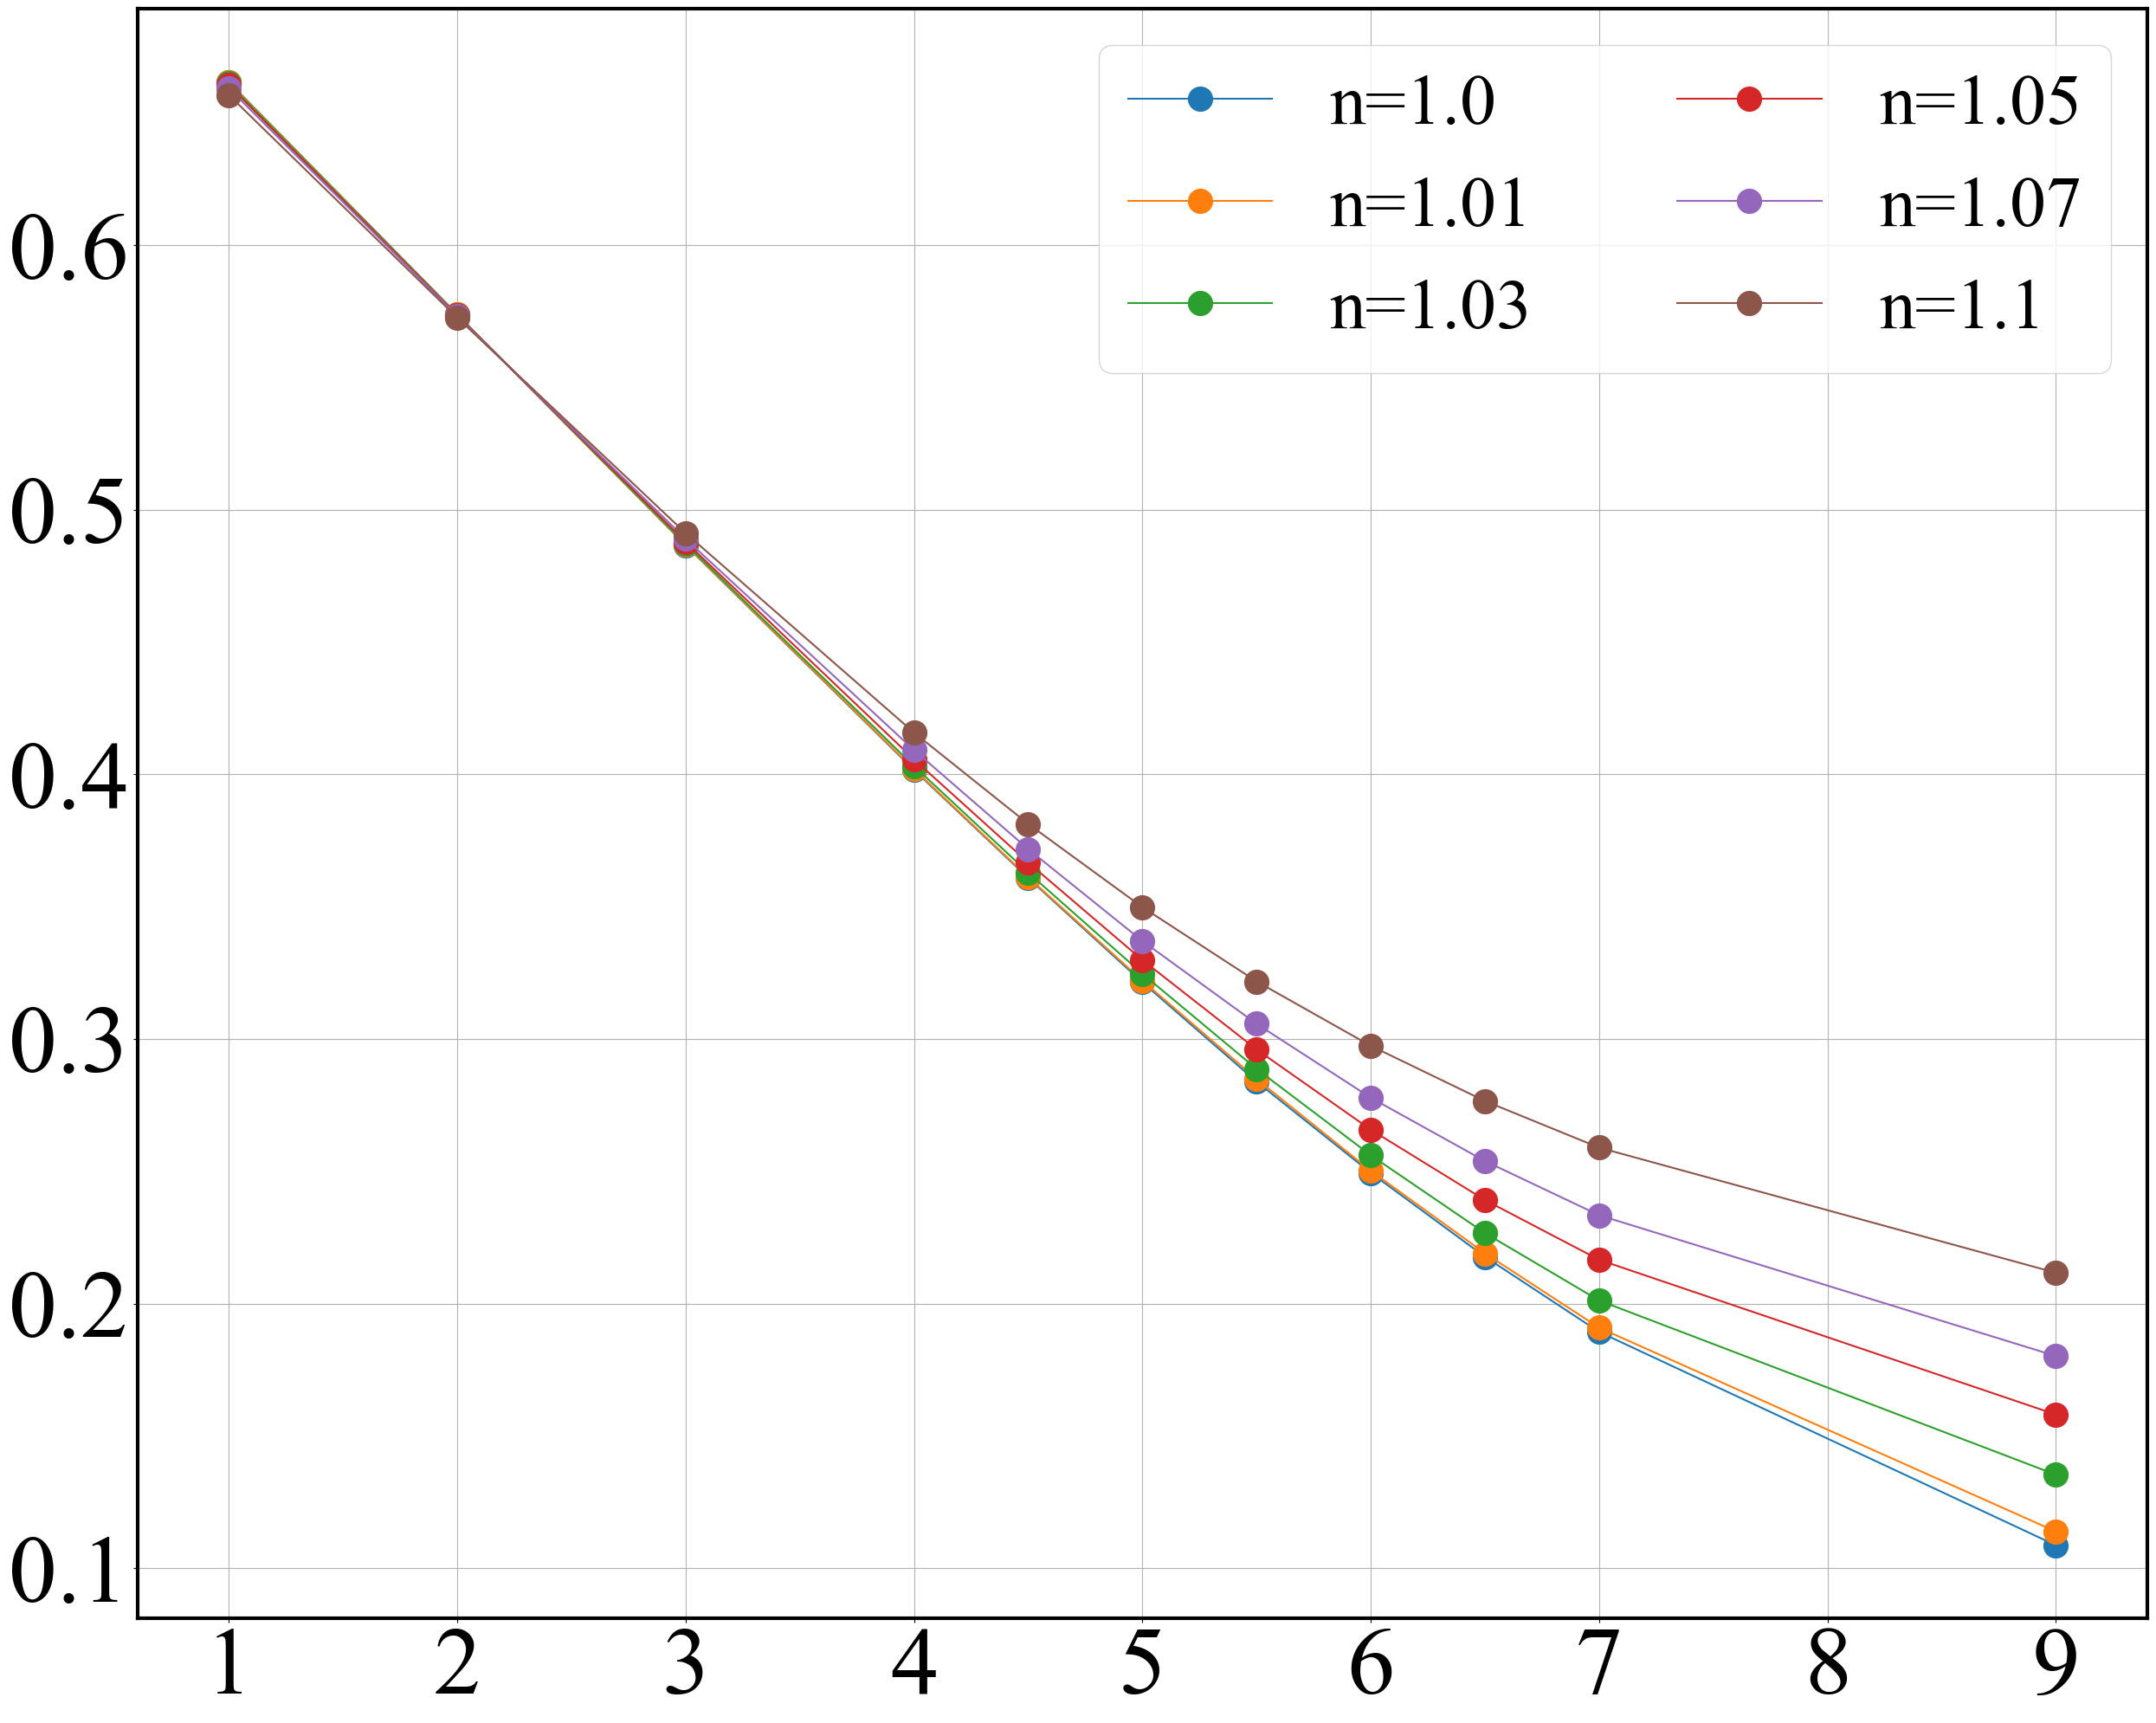

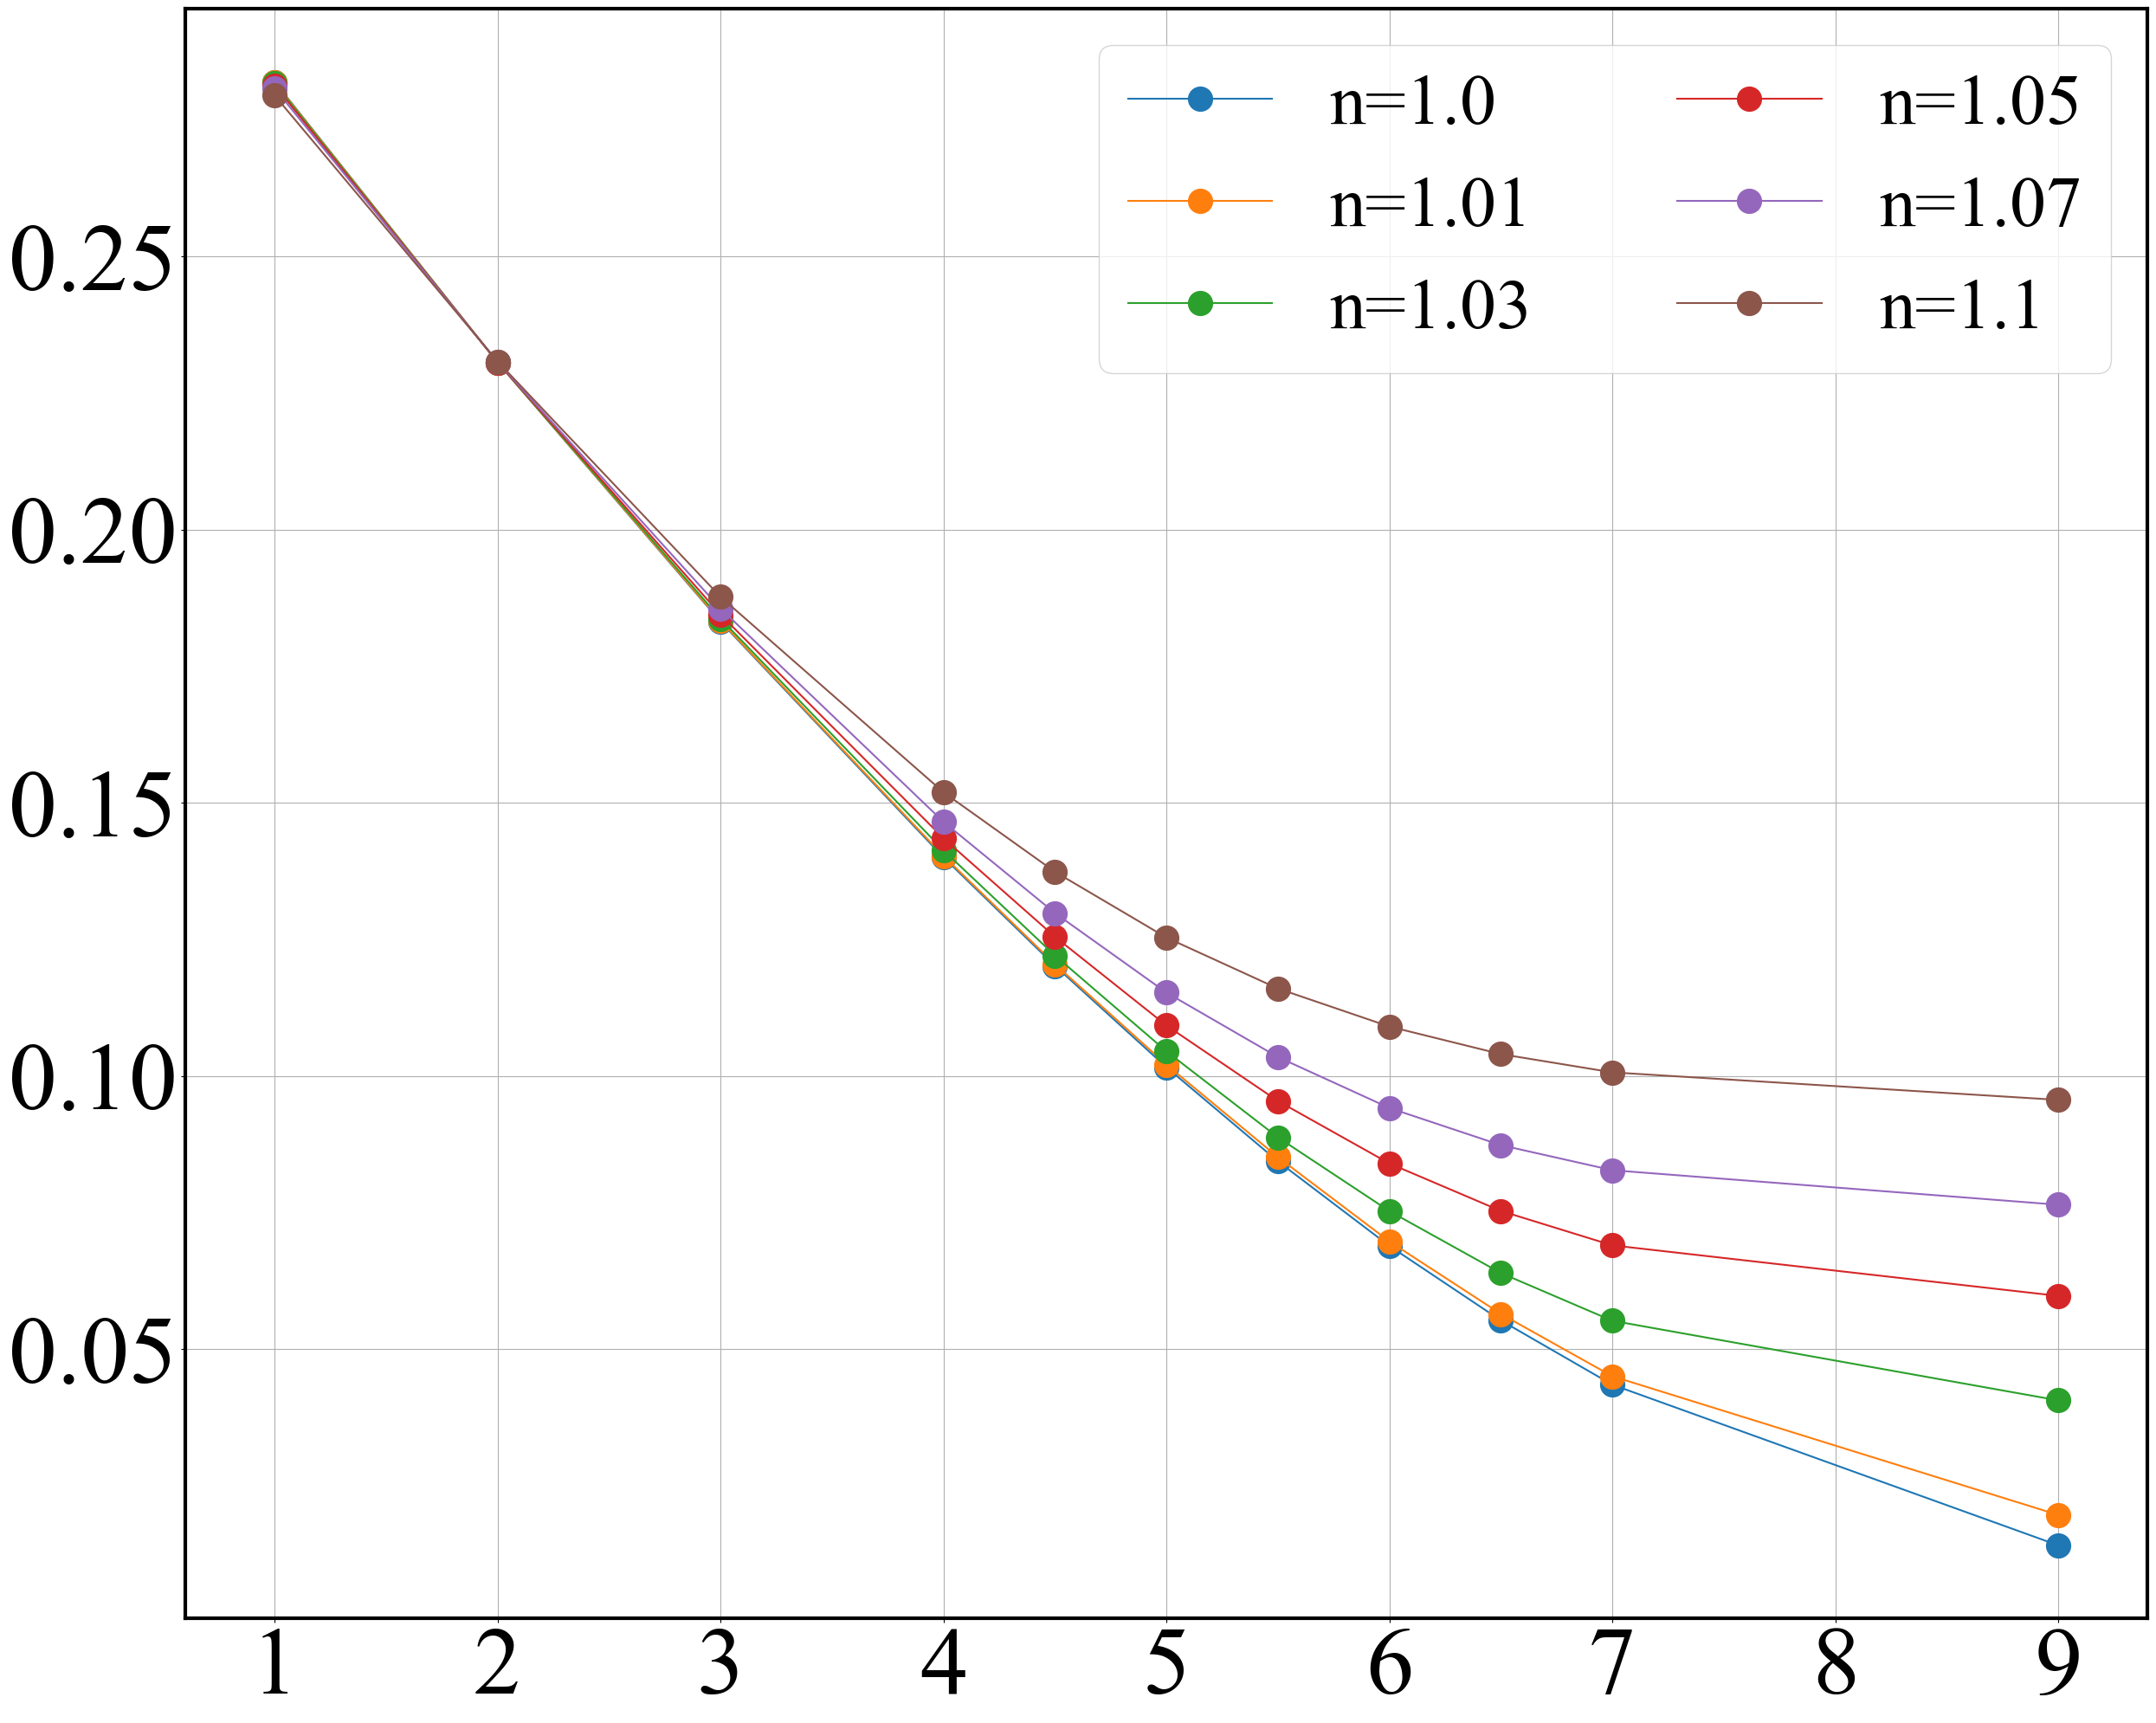

In [50]:
main()

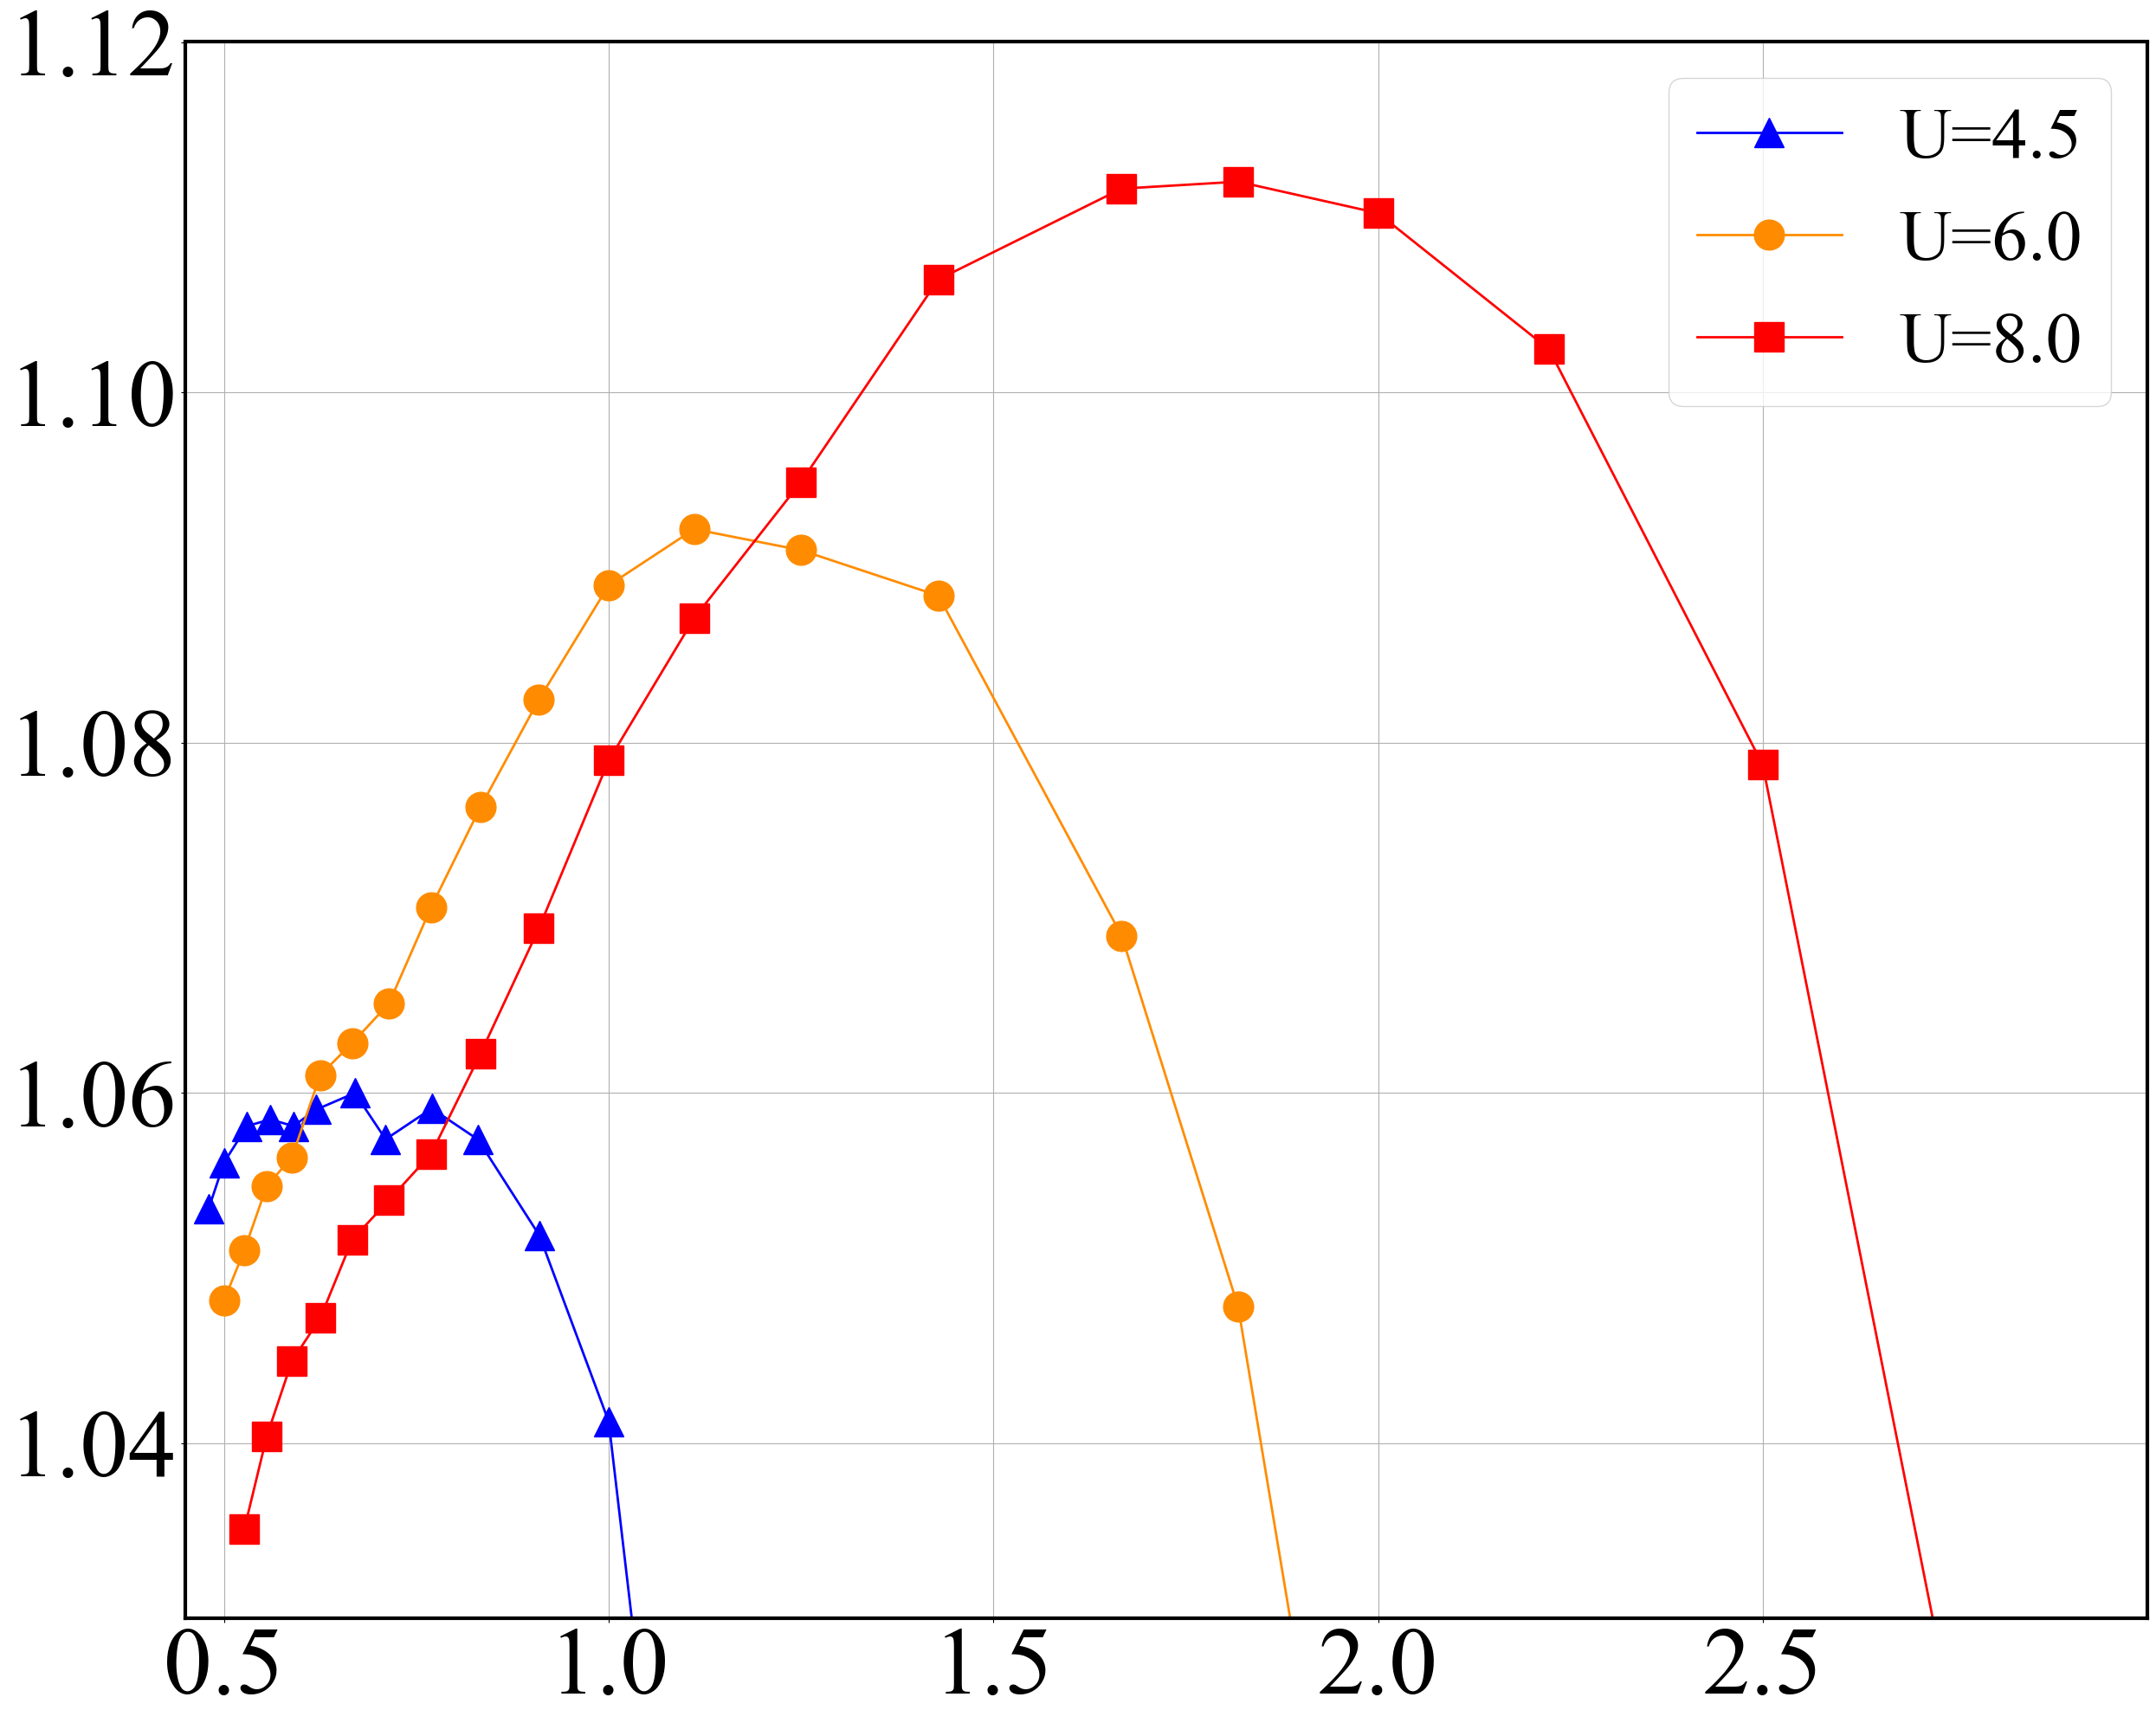

In [150]:
N="10"
Dtau="0.05"
Graph_dir = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s/Graphs_N_%s_dtau_%s_real_space_correlations_normal_averaged/Density_density_correlations_MIT'%(N,N,Dtau)
if not os.path.exists(Graph_dir):
    os.makedirs(Graph_dir)

T_low = [0.5,0.526,0.556,0.588,0.625,0.667,0.714,0.769,0.833,0.909,1.0]
T_high = [3.333,2.857,2.5,2.222,2.0,1.818,1.667,1.429,1.25,1.111]
T = np.asarray(T_low+T_high[::-1])

Beta = ["2.00","1.90","1.80","1.70","1.60","1.50","1.40","1.30","1.20","1.10","1.00","0.90","0.80","0.70","0.60","0.55","0.50","0.45",
            "0.40","0.35","0.30"]
nc_U4p5 = np.asarray([1.0533962264150944, 1.0560377358490567, 1.0581132075471698, 1.058490566037736, 1.0581132075471698, 1.059056603773585,
             1.06, 1.0573584905660378,1.0591150442477877, 1.057345132743363, 1.0518584070796462, 1.0412389380530973, 1,1,1,1,1])
T_4 = np.asarray([0.48,0.5,0.53,0.56,0.59,0.62,0.67,0.71,0.77,0.83,0.91,1.0,1.11,1.25,1.43,1.67,2.0])

T_val = []
for i in range(len(Beta)):
        T_val.append(1/float(Beta[i]))

nc_U6_low = [1.0481632653061224, 1.0510204081632653, 1.0546938775510204, 1.056326530612245, 1.0610204081632653, 1.062857142857143, 1.0651020408163265, 1.0706122448979591, 1.076326530612245, 1.0824489795918368, 1.0889795918367347]
nc_U8_low = [1.0383673469387755,1.0351020408163265, 1.0404081632653062, 1.0446938775510204, 1.0471428571428572, 1.0516326530612246, 1.0538775510204084, 1.056530612244898, 1.0622448979591839, 1.069387755102041, 1.0789795918367349]
nc_U10_low = [1.030612244897959, 1.036122448979592, 1.036734693877551, 1.0346938775510204, 1.0408163265306123, 1.046938775510204, 1.04, 1.0483673469387755, 1.0540816326530613, 1.0597959183673469, 1.066326530612245]

nc_U6_high = [1.0921882352941177, 1.0909882352941178, 1.0883882352941177, 1.0689882352941178, 1.0477882352941177,1.0,1.0,1.0,1.0,1.0]
nc_U8_high = [1.087109634551495, 1.0948837209302327, 1.1064451827242525, 1.1116279069767443, 1.1120265780730898, 1.110232558139535, 1.1024584717607975, 1.0787375415282392,1.0,1.0]
nc_U10_high = [1.0745514950166113, 1.0873089700996679, 1.0954817275747508, 1.107840531561462, 1.117607973421927, 1.1198006644518275, 1.122591362126246, 1.120996677740864, 1.1114285714285714, 1.0785382059800666]
    
nc_U6 = np.asarray(nc_U6_low+nc_U6_high)
nc_U8 = np.asarray(nc_U8_low+nc_U8_high)
nc_U10 = np.asarray(nc_U10_low+nc_U10_high)

plt.figure(figsize = (25,20))
plt.xticks([0.5,1.0,1.5,2.0,2.5],fontsize = 80)
plt.yticks(fontsize = 80)

plt.plot(T_4[:],nc_U4p5[:],c= 'blue',marker = "^",markersize = 25,linewidth = 2,label = r"U=4.5")    
plt.plot(T_val[:],nc_U6[:],c = 'darkorange',marker = "o",markersize= 25,linewidth = 2,label = r"U=6.0")
plt.plot(T_val[1:],nc_U8[1:],c = 'red',marker = "s",markersize = 25,linewidth = 2,label = r"U=8.0")
#plt.plot(T_val,np.ma.masked_where(nc_U10<=1,nc_U10),c = 'red',marker = "s",markersize = 25,linewidth = 2,label = r"U=8.0")
plt.ylim(1.03,1.12)
plt.xlim(0.45,3.0)
plt.grid(True,which='both')
plt.legend(loc = 'best',fontsize = 60)
plt.tight_layout()
plt.savefig("%s/MIT_crossover_critical_doping_N_%s.png"%(Graph_dir,N))

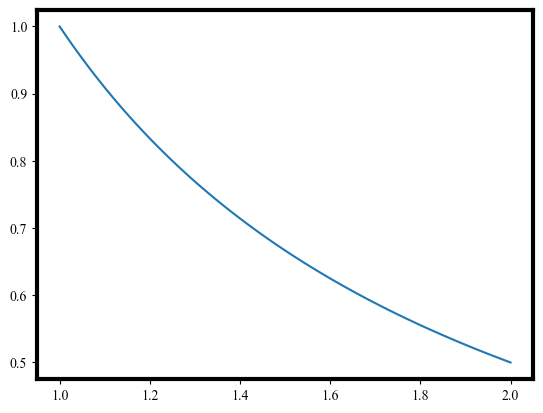

In [109]:
x = np.linspace(1,2,num=101)
y = np.power(x,-1)
plt.plot(x,y)

In [45]:
x = np.linspace(1,4)
y1 = np.power(0.5*(x-2),2)+4
y2 = np.power(x,-1)
y3 = y1*y2

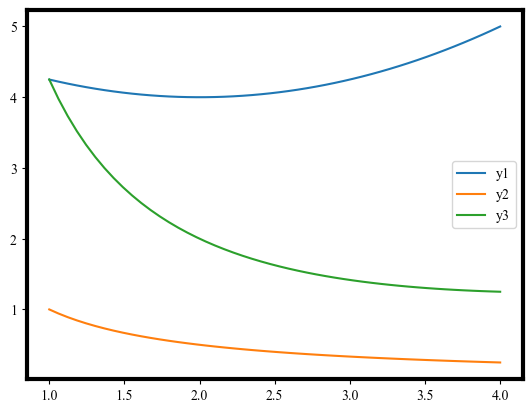

In [46]:
plt.plot(x,y1,label = 'y1')
plt.plot(x,y2,label = 'y2')
plt.plot(x,y3,label = 'y3')
plt.legend(loc = 'best')

In [ ]:
plt.plot